In [1]:
import pandas as pd
import numpy as np

In [2]:

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'  
# No need to include %matplotlib inline magic command. These things come built-in now.

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Load saved data

In [4]:
symptoms = pd.read_csv('symptoms_survey_dump.csv')
diagnosis = pd.read_csv('diagnosis_survey_dump.csv')

In [5]:
symptoms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256438 entries, 0 to 256437
Data columns (total 93 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Unnamed: 0                                                   256438 non-null  int64  
 1   pid                                                          256438 non-null  object 
 2   version                                                      256438 non-null  int64  
 3   name                                                         256438 non-null  object 
 4   time_scheduled                                               0 non-null       float64
 5   time_received                                                256438 non-null  object 
 6   time                                                         256438 non-null  object 
 7   time_start                                                   2564

In [6]:
diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285 entries, 0 to 3284
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      3285 non-null   int64  
 1   pid                             3285 non-null   object 
 2   version                         3285 non-null   int64  
 3   name                            3285 non-null   object 
 4   time_scheduled                  0 non-null      float64
 5   time_received                   3285 non-null   object 
 6   time                            3285 non-null   object 
 7   time_start                      3285 non-null   object 
 8   id                              3285 non-null   object 
 9   task_who_time_start             2 non-null      object 
 10  task_who_time_end               915 non-null    object 
 11  task_who_value                  2978 non-null   float64
 12  task_how_time_start             91

In [7]:
symptoms['task_symptoms_value_Fever'].tail()

256433    0.0
256434    0.0
256435    0.0
256436    0.0
256437    0.0
Name: task_symptoms_value_Fever, dtype: float64

# Process data

In [8]:
diagnosis = diagnosis.set_index(pd.to_datetime(diagnosis['time'], infer_datetime_format=True))

In [9]:
len(diagnosis['id'].unique())

2000

In [10]:
# Invalid data points
len(diagnosis[(pd.isnull(diagnosis['task_who_value'])) | (pd.isnull(diagnosis['task_how_value']))]['id'].unique())

215

In [11]:
# Filter for only self and PCR test.
diagnosis_filtered = diagnosis[(diagnosis['task_who_value'] == 0.0) & (diagnosis['task_how_value'] == 0.0)]

In [12]:
len(diagnosis_filtered['id'].unique())

1051

In [13]:
diagnosis_filtered['time'].describe()

count                                 1604
unique                                1604
top       2021-03-30 14:09:03.443000+00:00
freq                                     1
Name: time, dtype: object

In [14]:
diagnosis_filtered = diagnosis_filtered.set_index(pd.to_datetime(diagnosis_filtered['time'], infer_datetime_format=True))

In [15]:
diagnosis_filtered[pd.notnull(diagnosis_filtered['task_date_illness_value'])]

,Unnamed: 0,pid,version,name,time_scheduled,time_received,time,time_start,id,task_who_time_start,...,task_who_value,task_how_time_start,task_how_time_end,task_how_value,task_date_diagnosed_time_start,task_date_diagnosed_time_end,task_date_diagnosed_value,task_date_illness_time_start,task_date_illness_time_end,task_date_illness_value
time,,,,,,,,,,,,,,,,,,,,,
2021-07-16 08:56:34.097000+00:00,0,diagnosis,2,Covid Diagnosis,NaN,2021-07-16 08:56:33.781000+00:00,2021-07-16 08:56:34.097000+00:00,2021-07-16 08:55:41.784000+00:00,00a9SPtBFkYF8KmWTvPPU0y69Xo1,NaN,...,0.0,2021-07-16 08:55:46.457000+00:00,2021-07-16 08:55:55.832000+00:00,0.0,2021-07-16 08:55:55.832000+00:00,2021-07-16 08:56:14.856000+00:00,2021-06-22 22:00:00+00:00,2021-07-16 08:56:14.856000+00:00,2021-07-16 08:56:34.097000+00:00,2021-06-18 22:00:00+00:00
2021-07-24 00:28:36.278000+00:00,13,diagnosis,2,Covid Diagnosis,NaN,2021-07-24 00:28:36.226000+00:00,2021-07-24 00:28:36.278000+00:00,2021-07-24 00:27:58.238000+00:00,0Eswk2gdkrd2u3ljOydE8EmGkkO2,NaN,...,0.0,2021-07-24 00:28:02.463000+00:00,2021-07-24 00:28:08.104000+00:00,0.0,2021-07-24 00:28:08.104000+00:00,2021-07-24 00:28:23.093000+00:00,2021-07-17 23:00:00+00:00,2021-07-24 00:28:23.093000+00:00,2021-07-24 00:28:36.278000+00:00,2021-07-16 23:00:00+00:00
2021-07-20 09:50:05.889000+00:00,14,diagnosis,2,Covid Diagnosis,NaN,2021-07-20 09:50:05.685000+00:00,2021-07-20 09:50:05.889000+00:00,2021-07-20 09:49:31.948000+00:00,0Eswk2gdkrd2u3ljOydE8EmGkkO2,NaN,...,0.0,2021-07-20 09:49:35.565000+00:00,2021-07-20 09:49:43.825000+00:00,0.0,2021-07-20 09:49:43.825000+00:00,2021-07-20 09:49:53.694000+00:00,2021-07-18 23:00:00+00:00,2021-07-20 09:49:53.694000+00:00,2021-07-20 09:50:05.889000+00:00,2021-07-16 23:00:00+00:00
2021-01-26 11:24:13.039000+00:00,41,diagnosis,2,Covid Diagnosis,NaN,2021-01-26 11:24:12.241000+00:00,2021-01-26 11:24:13.039000+00:00,2021-01-26 11:23:49.983000+00:00,0YXuBKrbltQO5FZGv5GHsoF4Ssk2,NaN,...,0.0,2021-01-26 11:23:54.225000+00:00,2021-01-26 11:23:59.540000+00:00,0.0,2021-01-26 11:23:59.540000+00:00,2021-01-26 11:24:05.530000+00:00,2021-01-22 00:00:00+00:00,2021-01-26 11:24:05.530000+00:00,2021-01-26 11:24:13.038000+00:00,2021-01-17 00:00:00+00:00
2021-07-02 09:01:22.941000+00:00,51,diagnosis,2,Covid Diagnosis,NaN,2021-07-02 09:01:19.969000+00:00,2021-07-02 09:01:22.941000+00:00,2021-07-02 09:00:54.225000+00:00,0tWor6rXbnOHnudvPDwULWamPVr2,NaN,...,0.0,2021-07-02 09:00:56.083000+00:00,2021-07-02 09:00:58.527000+00:00,0.0,2021-07-02 09:00:58.527000+00:00,2021-07-02 09:01:15.357000+00:00,2021-06-27 23:00:00+00:00,2021-07-02 09:01:15.357000+00:00,2021-07-02 09:01:22.941000+00:00,2021-06-25 23:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-23 10:53:43.318000+00:00,3200,diagnosis,2,Covid Diagnosis,NaN,2021-07-23 10:53:41.731000+00:00,2021-07-23 10:53:43.318000+00:00,2021-07-23 10:53:22.436000+00:00,yD5QOGx7b4Y6o4O9u1NqedOFD8y2,NaN,...,0.0,2021-07-23 10:53:24.430000+00:00,2021-07-23 10:53:26.079000+00:00,0.0,2021-07-23 10:53:26.079000+00:00,2021-07-23 10:53:34.602000+00:00,2021-01-14 00:00:00+00:00,2021-07-23 10:53:34.602000+00:00,2021-07-23 10:53:43.318000+00:00,2021-01-11 00:00:00+00:00
2021-04-01 16:11:04.174000+00:00,3201,diagnosis,2,Covid Diagnosis,NaN,2021-04-01 16:11:05.219000+00:00,2021-04-01 16:11:04.174000+00:00,2021-04-01 16:10:39.826000+00:00,yD5QOGx7b4Y6o4O9u1NqedOFD8y2,NaN,...,0.0,2021-04-01 16:10:41.828000+00:00,2021-04-01 16:10:58.922000+00:00,0.0,2021-04-01 16:10:58.922000+00:00,2021-04-01 16:11:01.498000+00:00,2021-04-13 23:00:00+00:00,2021-04-01 16:11:01.498000+00:00,2021-04-01 16:11:04.174000+00:00,2021-01-11 00:00:00+00:00
2021-02-15 17:39:05.045000+00:00,3243,diagnosis,2,Covid Diagnosis,NaN,2021-02-15 17:39:03.642000+00:00,2021-02-15 17:39:05.045000+00:00,2021-02-15 17:38:08.323000+00:00,z220LGMuCdZL4F9IxkNi277F5Kt2,NaN,...,0.0,2021-02-15 17:38:17.114000+00:00,2021-02-15 17:38:28.128000+00:00,0.0,2021-02-15 17:38:28.128000+00:00,2

In [16]:
# Fill the NA values in symptoms with 0 (meaning no symptom)
symptoms_fill = symptoms.fillna(0)

In [17]:
main_symptom_cols = ['task_symptoms_value_Cough','task_symptoms_value_Difficulties breathing','task_symptoms_value_Fever', 'task_symptoms_value_Loss of sense of smell (anosmia)']
secondary_symptom_cols = ['task_symptoms_value_Fatigue', 'task_symptoms_value_Muscle or joint pain', 'task_symptoms_value_Headache', 'task_symptoms_value_Nausea', 'task_symptoms_value_Congestion', 'task_symptoms_value_Chills', 'task_symptoms_value_Confusion']
lcovid_symptom_cols = ['task_lcovid_symptoms_value_Difficulty thinking (brain fog)', 'task_lcovid_symptoms_value_Difficulty sleeping (insomnia)', 'task_lcovid_symptoms_value_Fatigue']
mood_symptom_cols = ['task_mood_value_arousal', 'task_mood_value_valence']

In [18]:
all_symptom_cols = main_symptom_cols + secondary_symptom_cols + lcovid_symptom_cols

In [19]:
symptoms_fill['secondary_symptom_score'] = symptoms_fill.loc[:, secondary_symptom_cols].sum(axis=1)

In [20]:
symptoms_fill['main_symptom_score'] = symptoms_fill.loc[:, main_symptom_cols].sum(axis=1)

In [21]:
symptoms_fill['lcovid_symptom_score'] = symptoms_fill.loc[:, lcovid_symptom_cols].sum(axis=1)

In [22]:
symptoms_fill['total_symptom_score'] = symptoms_fill.loc[:, all_symptom_cols].sum(axis=1)

In [23]:
symptoms_fill = symptoms_fill.set_index(pd.to_datetime(symptoms_fill['time'], infer_datetime_format=True))

## Create cohort 1: participant reporting long symptoms, without covid test (PCR)

In [24]:
symptoms_no_diag = symptoms_fill[~symptoms_fill['id'].isin(diagnosis_filtered['id'].unique())]

In [25]:
symptoms_no_diag.reset_index(drop=True)
symptoms_no_diag = symptoms_no_diag.set_index(pd.to_datetime(symptoms_no_diag['time'], infer_datetime_format=True))

,Unnamed: 0,pid,version,name,time_scheduled,time_received,time,time_start,id,task_mood_time_start,...,task_lcovid_symptoms_value_balance disorder,task_lcovid_symptoms_value_confusion,task_symptoms_value_Running nose,task_symptoms_value_Runny nose,task_symptoms_value_hayfever,task_symptoms_value_hay fever,secondary_symptom_score,main_symptom_score,lcovid_symptom_score,total_symptom_score
0,0,symptoms,1,CoViD symptoms,0.0,2020-12-29 10:06:23.841000+00:00,2020-12-29 10:06:23.353000+00:00,2020-12-29 10:06:07.347000+00:00,00AuZPNV0AdXvAzMf1ZkYy4nzrG3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
1,1,symptoms,1,CoViD symptoms,0.0,2021-01-12 10:17:05.336000+00:00,2021-01-12 10:17:04.342000+00:00,2021-01-12 10:16:49.717000+00:00,00AuZPNV0AdXvAzMf1ZkYy4nzrG3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0
2,2,symptoms,1,CoViD symptoms,0.0,2021-01-19 10:00:19.928000+00:00,2021-01-19 10:00:18.701000+00:00,2021-01-19 10:00:07.522000+00:00,00AuZPNV0AdXvAzMf1ZkYy4nzrG3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0
3,3,symptoms,1,CoViD symptoms,0.0,2020-12-22 18:57:06.507000+00:00,2020-12-22 18:57:04.246000+00:00,2020-12-22 18:56:43.983000+00:00,00AuZPNV0AdXvAzMf1ZkYy4nzrG3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
4,4,symptoms,1,CoViD symptoms,0.0,2021-01-05 10:04:12.162000+00:00,2021-01-05 10:04:11.156000+00:00,2021-01-05 10:03:50.081000+00:00,00AuZPNV0AdXvAzMf1ZkYy4nzrG3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240706,256429,symptoms,1,CoViD symptoms,0.0,2021-02-16 10:13:54.244000+00:00,2021-02-16 10:13:54.174999+00:00,2021-02-16 10:12:39.502000+00:00,zzsMkcPNuPgJjRdSGrnNS8q369J3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240707,256430,symptoms,1,CoViD symptoms,0.0,2021-01-08 10:16:17.082000+00:00,2021-01-08 10:16:16.352999+00:00,2021-01-08 10:14:52.391999+00:00,zzsMkcPNuPgJjRdSGrnNS8q369J3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,3.0
240708,256431,symptoms,1,CoViD symptoms,0.0,2021-01-01 13:11:37.872000+00:00,2021-01-01 13:11:37.290999+00:00,2021-01-01 13:10:12.792999+00:00,zzsMkcPNuPgJjRdSGrnNS8q369J3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
240709,256432,symptoms,1,CoViD symptoms,0.0,2020-12-26 12:11:43.776000+00:00,2020-12-26 12:11:43.706000+00:00,2020-12-26 12:10:28.540999+00:00,zzsMkcPNuPgJjRdSGrnNS8q369J3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Filter where atleast one symptom severity is greate than 0
symptoms_no_diag = symptoms_no_diag.loc[(symptoms_no_diag[main_symptom_cols + secondary_symptom_cols + lcovid_symptom_cols] > 0.0).any(1)]

In [27]:
symptoms_no_diag['secondary_symptom_score'] = symptoms_no_diag.loc[:, secondary_symptom_cols].sum(axis=1)

In [28]:
symptoms_no_diag['main_symptom_score'] = symptoms_no_diag.loc[:, main_symptom_cols].sum(axis=1)

In [105]:
symptoms_no_diag['lcovid_symptom_score'] = symptoms_no_diag.loc[:, lcovid_symptom_cols].sum(axis=1)

In [29]:
symptoms_no_diag['total_symptom_score'] = symptoms_no_diag.loc[:, all_symptom_cols].sum(axis=1)

<AxesSubplot:xlabel='time'>

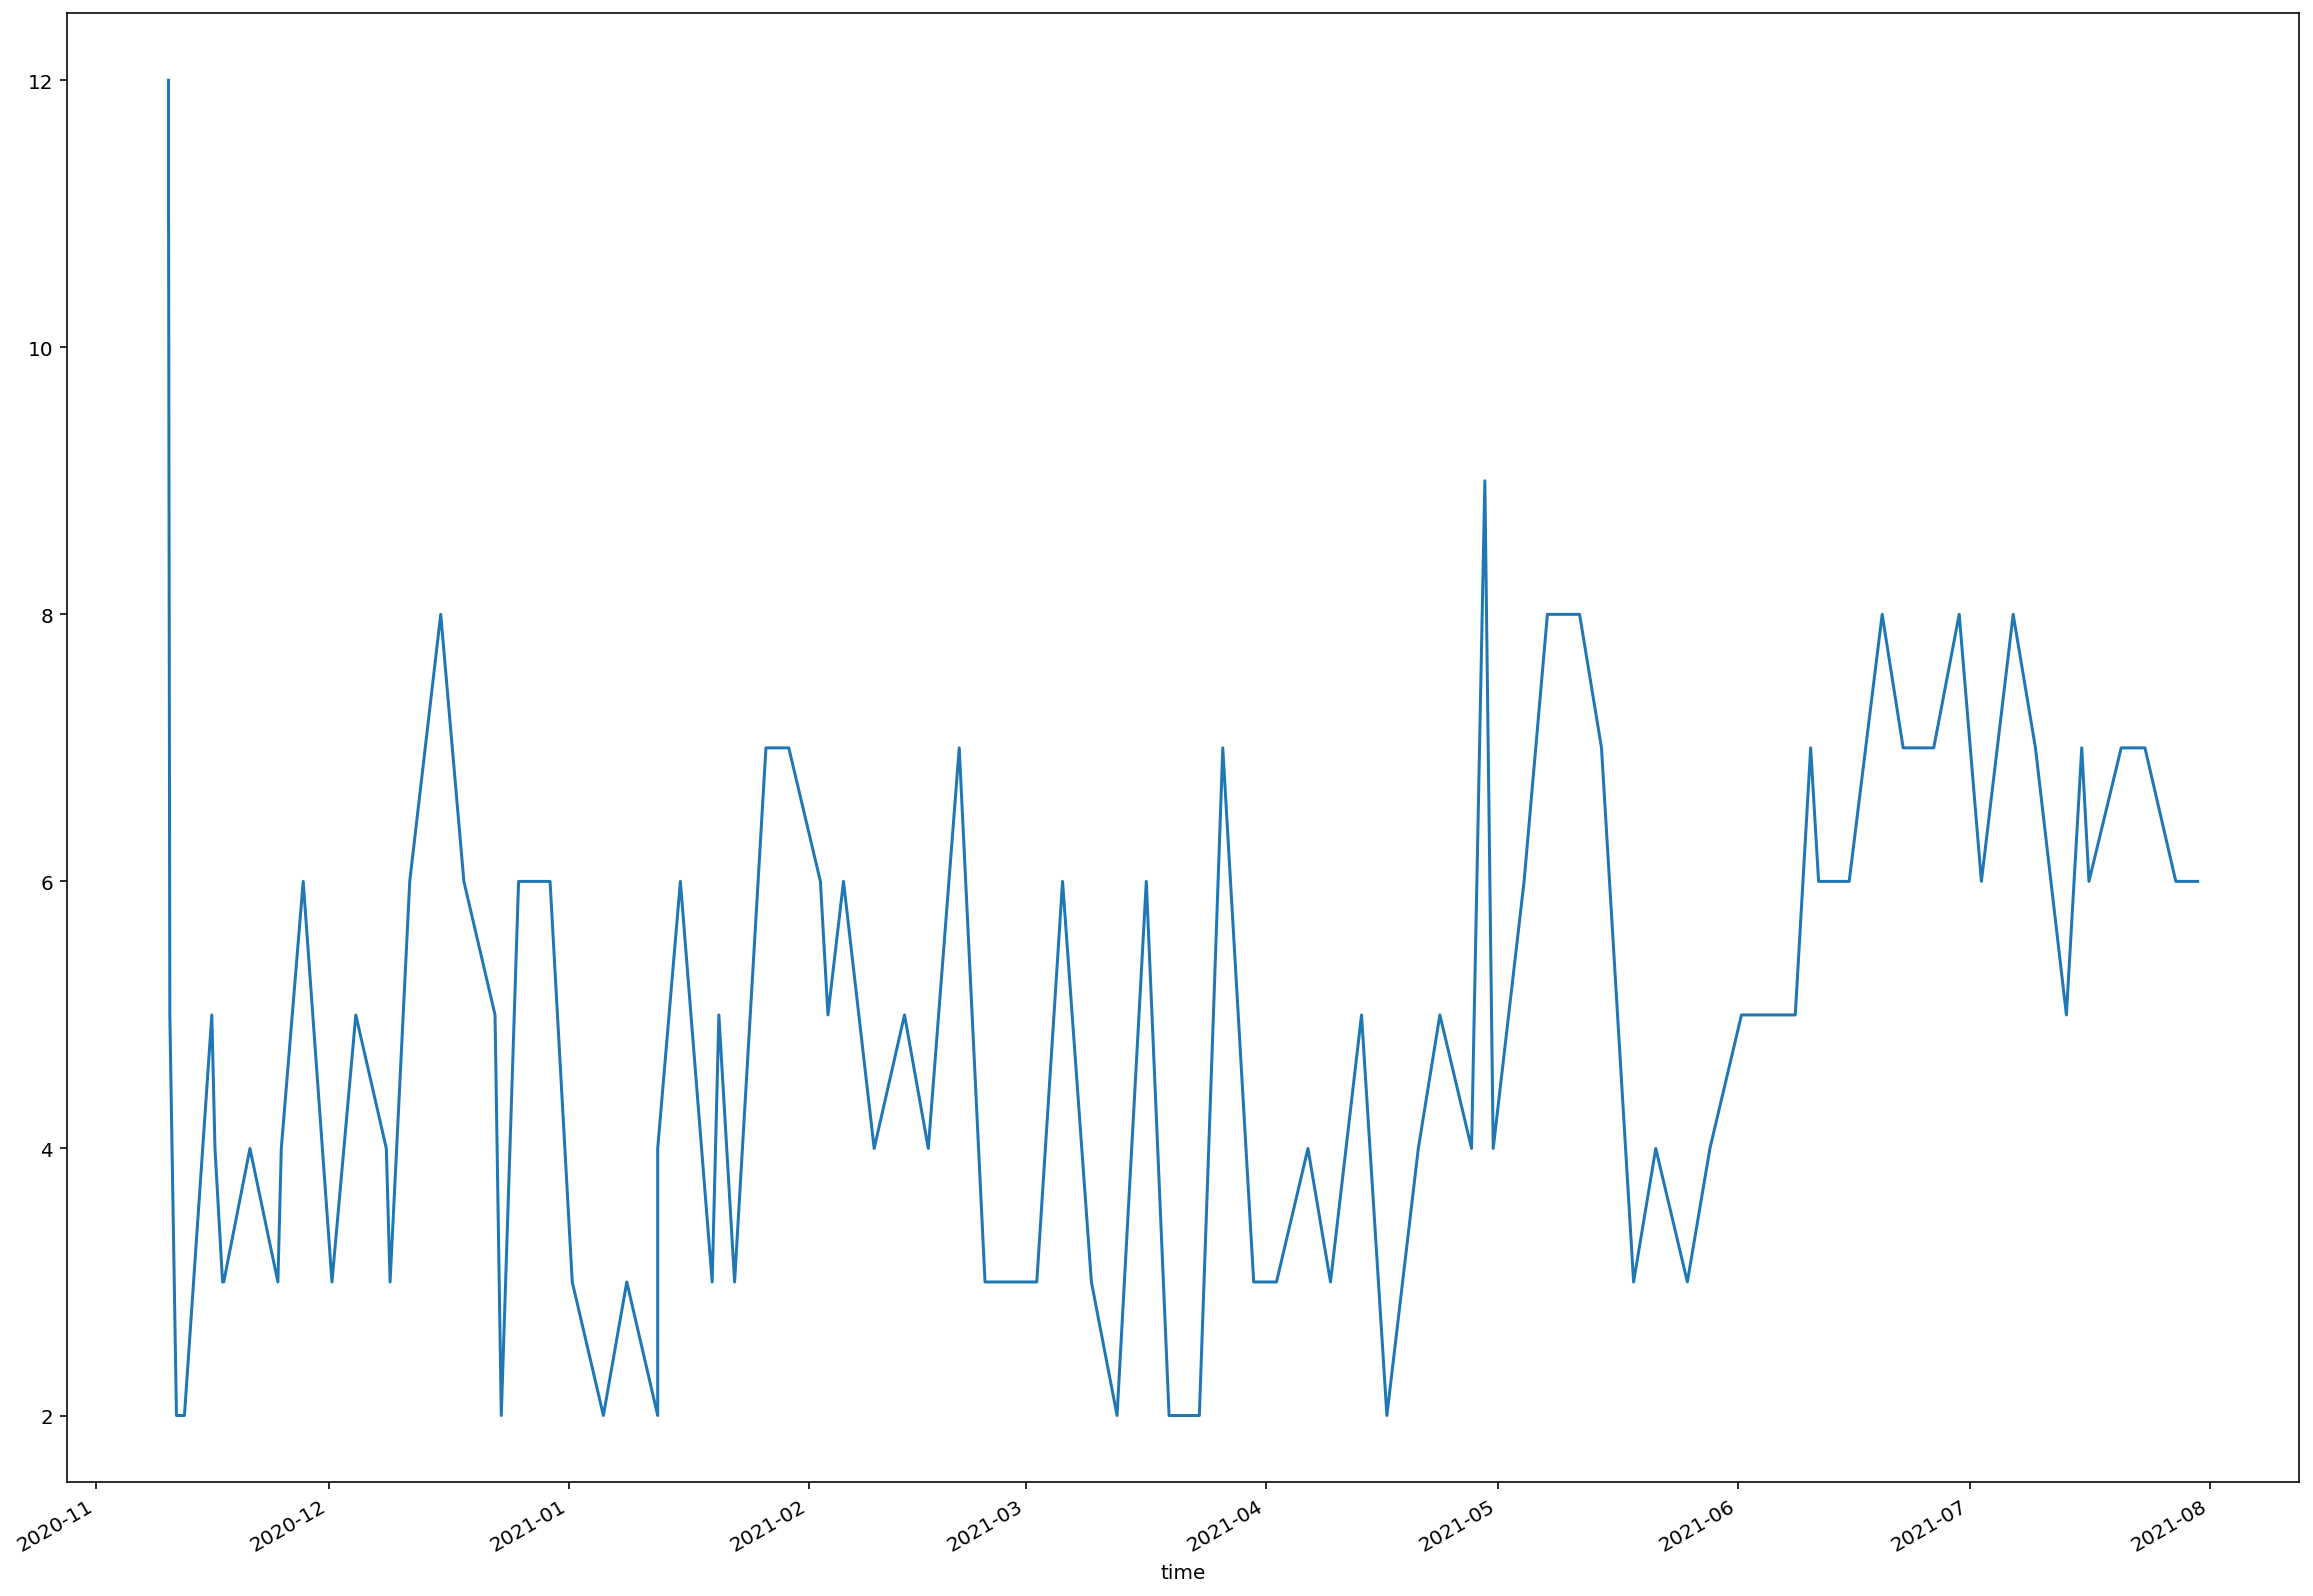

In [30]:
symptoms_no_diag[symptoms_no_diag['id'] == '0NO8l0hUq1R5ptc0FBUIKDqdAco1'].loc[:, 'total_symptom_score'].plot(figsize=(20, 15))

In [31]:
len(symptoms_no_diag['id'].unique())

5599

In [32]:
symptoms_no_diag = symptoms_no_diag.drop(['Unnamed: 0', 'time_scheduled', 'pid'], axis=1)

In [33]:
# function to get uniform distribution conformity (d-statistic and pvalue using KS test)
from scipy.stats import ks_2samp
def ks_test(data, uniform_dist=None, seed=12345):
    n = len(data)
    start = min(data)
    end = max(data)
    #print(f'Creating uniform distribution of len: {n} and time range: {start}, {end}')

    if uniform_dist == None:
        np.random.seed(seed)
        uniform_dist = np.random.default_rng().uniform(start.timestamp(),end.timestamp(),n)
    #print(s)

    x_t = [i.timestamp() for i in data]
    #print(x_t)

    ks_res = ks_2samp(uniform_dist, x_t)
    return ks_res


In [34]:
def ks_pvalue(x, seed):
    ks_val = ks_test(x.sort_index().index.remove_unused_levels().levels[1], seed=seed)
    #print(ks_val)
    return ks_val.pvalue
    
def ks_dstatistic(x, seed):
    ks_val = ks_test(x.sort_index().index.remove_unused_levels().levels[1], seed=seed)
    return ks_val.statistic
        

In [111]:
# Group by user Ids and rolling windows of 12 weeks (soft definition of Long covid from Literature)
# We also resample to 1D and add take mean of all the values in a single day, to make sure the data is daily
# and hence the count will be of daily symptoms reports (will eradicate more than 1 in a day).
symptoms_no_diag_grouped = symptoms_no_diag.groupby(['id', pd.Grouper(freq='1D', level='time')]).mean()

list_of_dfs = []
count = 0
for grp, grp_df in symptoms_no_diag_grouped.groupby(level='id'):
    #display(grp)
    #display(grp_df.reset_index('id'))
    #break
    seed = np.random.randint(10000)
    grp_df.index = grp_df.index.remove_unused_levels()
    res_df = grp_df.rolling(window='84D', on=grp_df.index.levels[1], min_periods=1).agg(['sum', 'mean', 'count', 'max', 'min', 'std'])
    grp_df['ks_stats'] = 0
    res_df = pd.concat([res_df, grp_df['ks_stats'].rolling(window='84D',on=grp_df.index.levels[1], min_periods=1).agg({'ks_pvalue': lambda x: ks_pvalue(x, seed), 'ks_dstatistic': lambda x: ks_dstatistic(x, seed)})], axis=1)
    #display(res_df.head())
    list_of_dfs.append(res_df)
    count+=1
    if count % 100 == 0:
        print(f'progress: {count}', end='\x1b[1K\r')
print(f'Total added: {count}')

Total added: 5599K


In [112]:
# save intermediate processed data so can be loaded later
import pickle
with open('list_of_dfs', 'wb+') as f:
    pickle.dump(list_of_dfs, f)

In [35]:
# Load intermediate processed data
import pickle
with open('list_of_dfs', 'rb') as f:
    list_of_dfs = pickle.load(f)

In [36]:
symptoms_no_diag_window = pd.concat(list_of_dfs)

symptoms_no_diag_window
#symptoms_no_diag_window = symptoms_no_diag_grouped.rolling(window='84D', on=symptoms_no_diag_grouped.index.levels[1]).agg(['sum', 'mean', 'count'])

(version, sum)  \
id                           time                                        
00AuZPNV0AdXvAzMf1ZkYy4nzrG3 2020-12-22 00:00:00+00:00             1.0   
                             2020-12-29 00:00:00+00:00             2.0   
                             2021-01-05 00:00:00+00:00             3.0   
                             2021-01-12 00:00:00+00:00             4.0   
                             2021-01-19 00:00:00+00:00             5.0   
...                                                                ...   
zzsMkcPNuPgJjRdSGrnNS8q369J3 2021-01-08 00:00:00+00:00             2.0   
                             2021-01-18 00:00:00+00:00             3.0   
                             2021-01-19 00:00:00+00:00             4.0   
                             2021-01-20 00:00:00+00:00             5.0   
                             2021-02-26 00:00:00+00:00             6.0   

                                                        (version, mean)  \
id                           time                                         
00AuZPNV0AdXvAzMf1ZkYy4nzrG3 2020-12-22 00:00:00+00:00              1.0   
                             2020-12-29 00:00:00+00:00              1.0   
                             2021-01-05 00:00:00+00:00              1.0   
                             2021-01-12 00:00:00+00:00              1.0   
                             2021-01-19 00:00:00+00:00              1.0   
...                                                                 ...   
zzsMkcPNuPgJjRdSGrnNS8q369J3 2021-01-08 00:00:00+00:00              1.0   
                             2021-01-18 00:00:00+00:00              1.0   
                             2021-01-19 00:00:00+00:00              1.0   
                             2021-01-20 00:00:00+00:00              1.0   
                             2021-02-26 00:00:00+00:00              1.0   

                                                        (version, count)  \
id                           time                                          
00AuZPNV0AdXvAzMf1ZkYy4nzrG3 2020-12-22 00:00:00+00:00               1.0   
                             2020-12-29 00:00:00+00:00               2.0   
                             2021-01-05 00:00:00+00:00               3.0   
                             2021-01-12 00:00:00+00:00               4.0   
                             2021-01-19 00:00:00+00:00               5.0   
...                                                                  ...   
zzsMkcPNuPgJjRdSGrnNS8q369J3 2021-01-08 00:00:00+00:00               2.0   
                             2021-01-18 00:00:00+00:00               3.0   
                             2021-01-19 00:00:00+00:00               4.0   
                             2021-01-20 00:00:00+00:00               5.0   
                             2021-02-26 00:00:00+00:00               6.0   

                                                        (version, max)  \
id                           time                                        
00AuZPNV0AdXvAzMf1ZkYy4nzrG3 2020-12-22 00:00:00+00:00             1.0   
                             2020-12-29 00:00:00+00:00             1.0   
                             2021-01-05 00:00:00+00:00             1.0   
                             2021-01-12 00:00:00+00:00             1.0   
                             2021-01-19 00:00:00+00:00             1.0   
...                                                                ...   
zzsMkcPNuPgJjRdSGrnNS8q369J3 2021-01-08 00:00:00+00:00             1.0   
                             2021-01-18 00:00:00+00:00             1.0   
                             2021-01-19 00:00:00+00:00             1.0   
                             2021-01-20 00:00:00+00:00             1.0   
                             2021-02-26 00:00:00+00:00             1.0   

                                                        (version, min)  \
id                           time                                        
00AuZPNV0AdXvAzMf

In [38]:
symptoms_no_diag_window[symptoms_no_diag_window[('version','count')] > 80.0]

(version, sum)  \
id                           time                                        
J4pyjcigMXRkGi2yvEwuHiBNecN2 2021-05-16 00:00:00+00:00           243.0   
                             2021-05-17 00:00:00+00:00           243.0   
                             2021-05-18 00:00:00+00:00           243.0   
                             2021-05-29 00:00:00+00:00           243.0   
                             2021-05-30 00:00:00+00:00           243.0   
...                                                                ...   
o5gaFVX1bDh9I5ZtOkMxaiSvnlc2 2021-03-16 00:00:00+00:00            83.0   
                             2021-03-17 00:00:00+00:00            83.0   
                             2021-03-18 00:00:00+00:00            84.0   
                             2021-03-19 00:00:00+00:00            84.0   
                             2021-03-20 00:00:00+00:00            84.0   

                                                        (version, mean)  \
id                           time                                         
J4pyjcigMXRkGi2yvEwuHiBNecN2 2021-05-16 00:00:00+00:00              3.0   
                             2021-05-17 00:00:00+00:00              3.0   
                             2021-05-18 00:00:00+00:00              3.0   
                             2021-05-29 00:00:00+00:00              3.0   
                             2021-05-30 00:00:00+00:00              3.0   
...                                                                 ...   
o5gaFVX1bDh9I5ZtOkMxaiSvnlc2 2021-03-16 00:00:00+00:00              1.0   
                             2021-03-17 00:00:00+00:00              1.0   
                             2021-03-18 00:00:00+00:00              1.0   
                             2021-03-19 00:00:00+00:00              1.0   
                             2021-03-20 00:00:00+00:00              1.0   

                                                        (version, count)  \
id                           time                                          
J4pyjcigMXRkGi2yvEwuHiBNecN2 2021-05-16 00:00:00+00:00              81.0   
                             2021-05-17 00:00:00+00:00              81.0   
                             2021-05-18 00:00:00+00:00              81.0   
                             2021-05-29 00:00:00+00:00              81.0   
                             2021-05-30 00:00:00+00:00              81.0   
...                                                                  ...   
o5gaFVX1bDh9I5ZtOkMxaiSvnlc2 2021-03-16 00:00:00+00:00              83.0   
                             2021-03-17 00:00:00+00:00              83.0   
                             2021-03-18 00:00:00+00:00              84.0   
                             2021-03-19 00:00:00+00:00              84.0   
                             2021-03-20 00:00:00+00:00              84.0   

                                                        (version, max)  \
id                           time                                        
J4pyjcigMXRkGi2yvEwuHiBNecN2 2021-05-16 00:00:00+00:00             3.0   
                             2021-05-17 00:00:00+00:00             3.0   
                             2021-05-18 00:00:00+00:00             3.0   
                             2021-05-29 00:00:00+00:00             3.0   
                             2021-05-30 00:00:00+00:00             3.0   
...                                                                ...   
o5gaFVX1bDh9I5ZtOkMxaiSvnlc2 2021-03-16 00:00:00+00:00             1.0   
                             2021-03-17 00:00:00+00:00             1.0   
                             2021-03-18 00:00:00+00:00             1.0   
                             2021-03-19 00:00:00+00:00             1.0   
                             2021-03-20 00:00:00+00:00             1.0   

                                                        (version, min)  \
id                           time                                        
J4pyjcigMXRkGi2yv

array([<AxesSubplot:label='c4a44dc6-529b-4ae9-919b-65492d7e6509', title={'center':'(secondary_symptom_score, count)'}, xlabel='time'>,
       <AxesSubplot:label='e318db4a-dc58-4688-b4fe-2f418312ec81', title={'center':'(main_symptom_score, count)'}, xlabel='time'>,
       <AxesSubplot:label='213d66ba-750f-4e9b-9c28-f001798bb077', title={'center':'(task_mood_value_arousal, count)'}, xlabel='time'>],
      dtype=object)

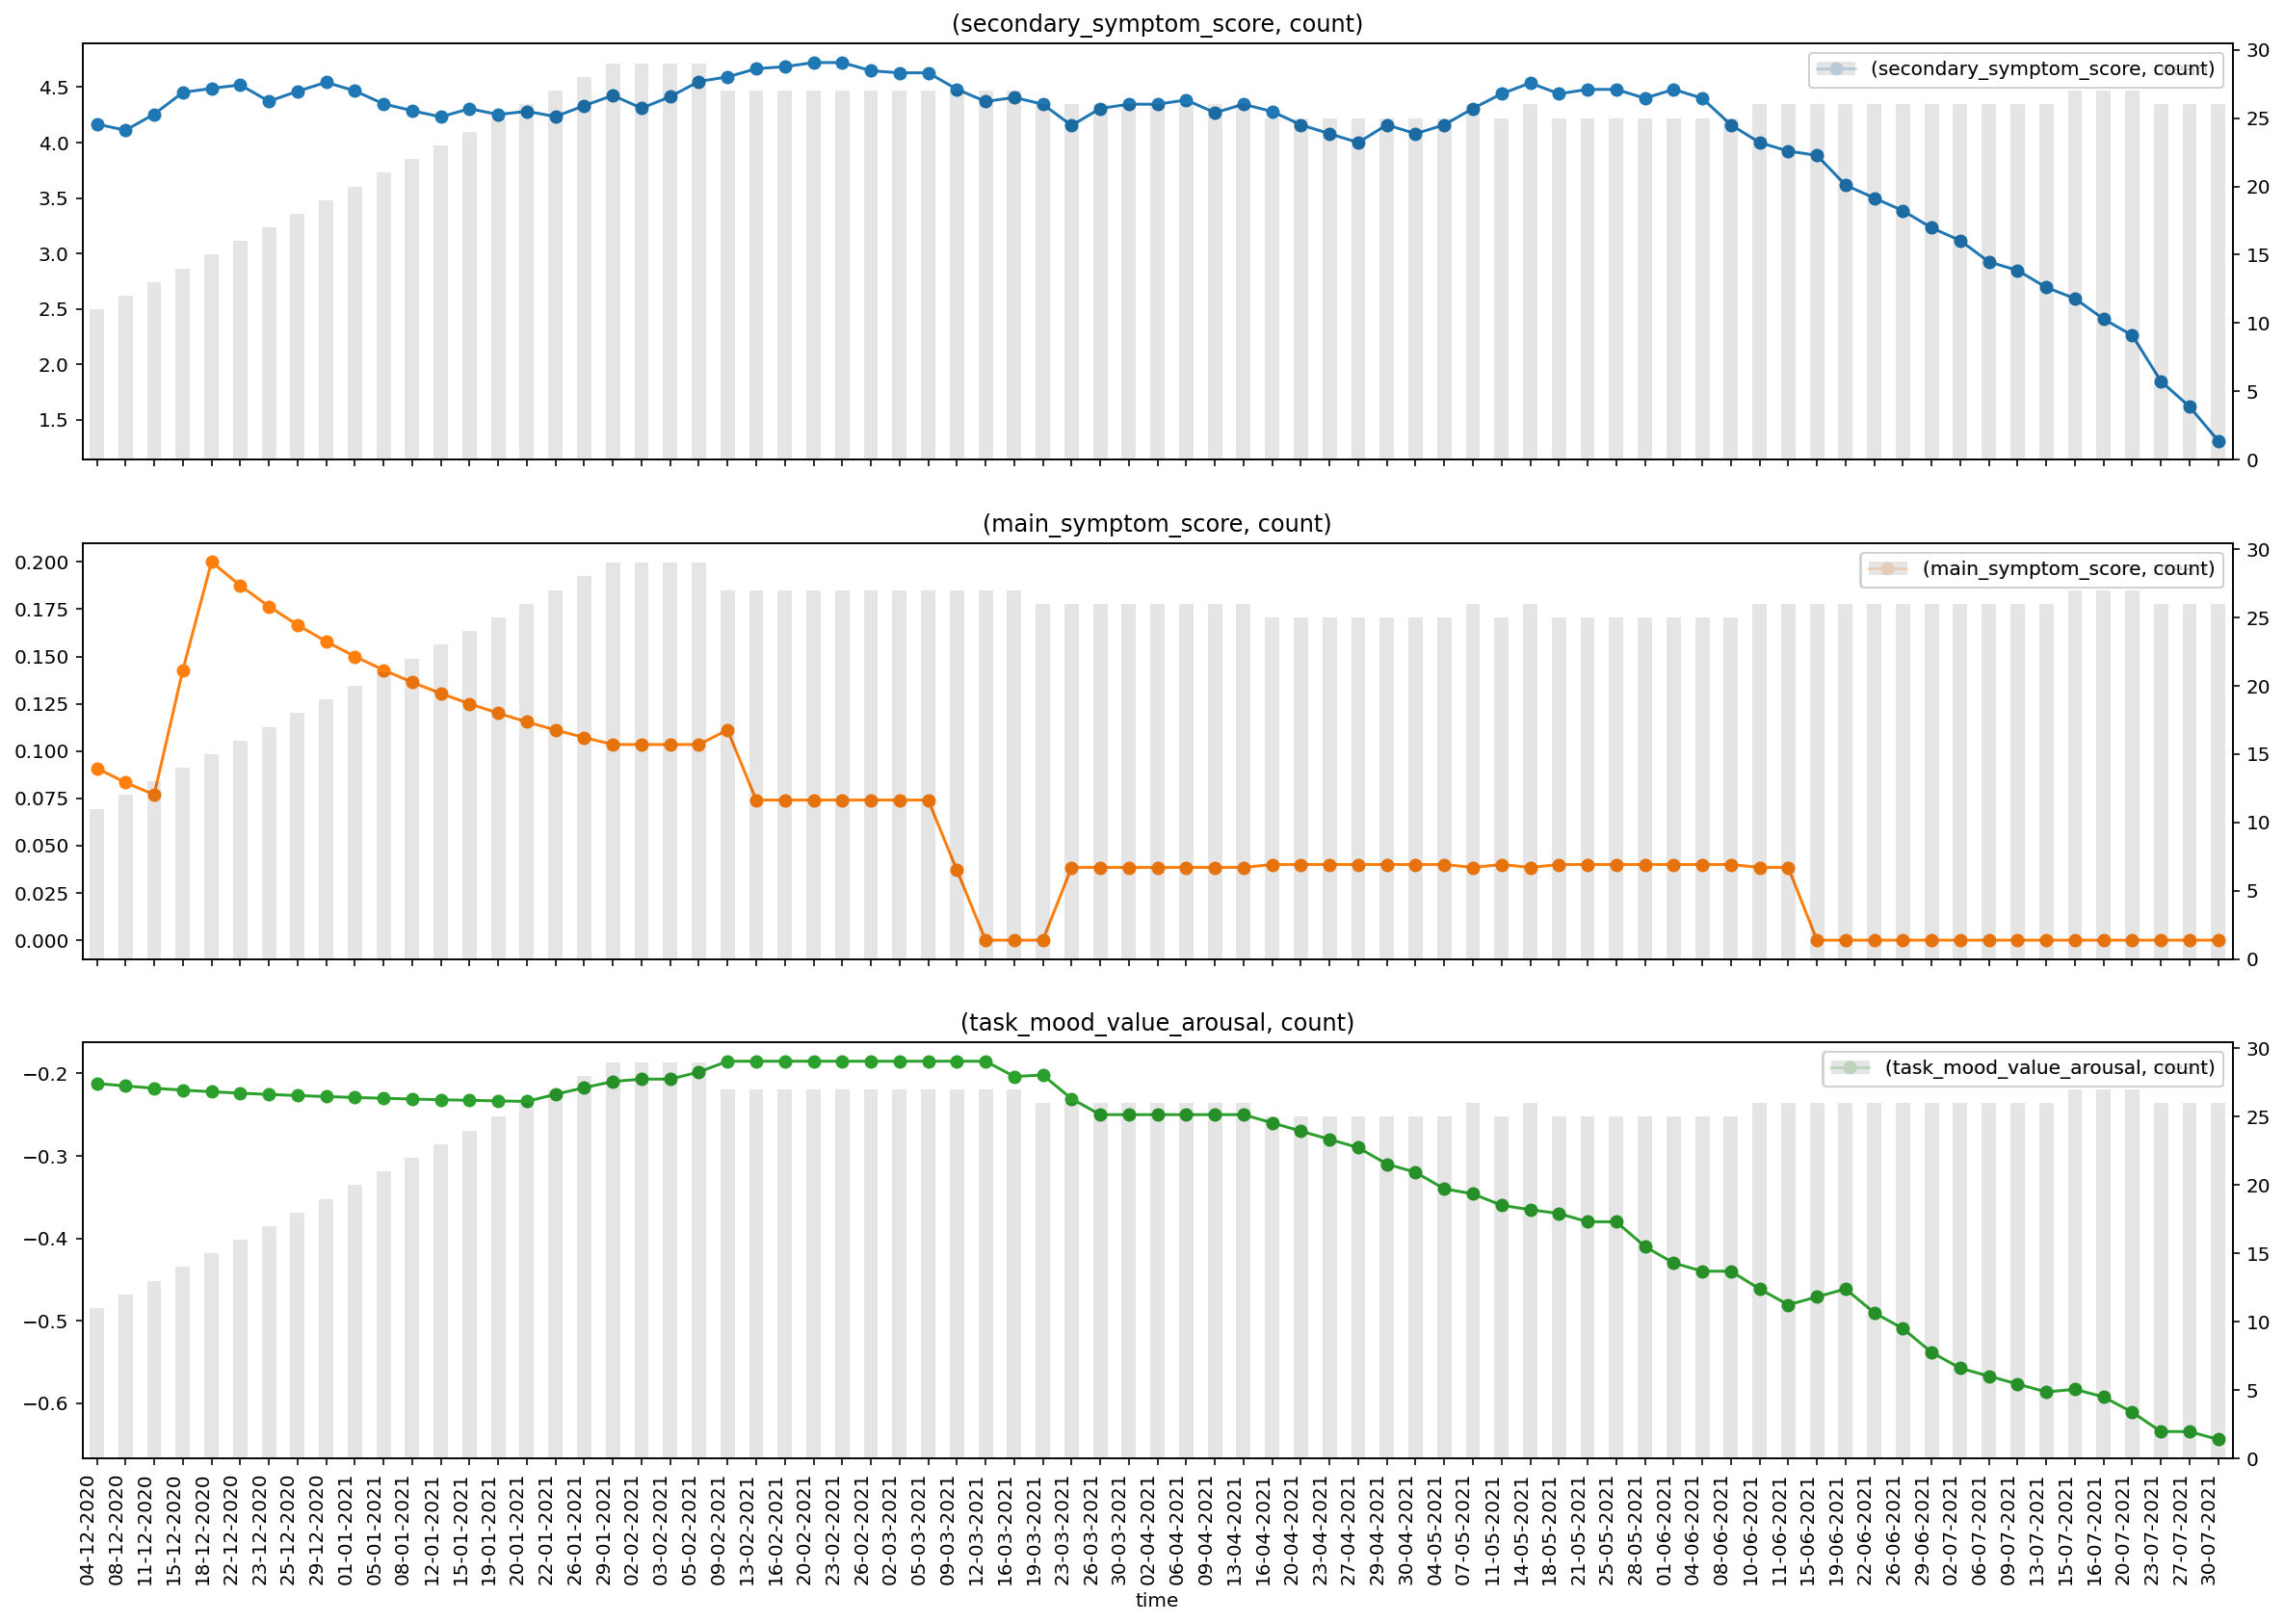

In [39]:
import matplotlib.pyplot as plt
metric_to_plot = 'mean'
df1 = symptoms_no_diag_window[symptoms_no_diag_window[('version','count')] > 10.0].loc['0NO8l0hUq1R5ptc0FBUIKDqdAco1', [('secondary_symptom_score', metric_to_plot), ('main_symptom_score', metric_to_plot), ('task_mood_value_arousal', metric_to_plot)]].sort_index()
df1['time'] = df1.index
df1['time'] = df1['time'].dt.strftime('%d-%m-%Y')
ax = df1.plot(x='time', subplots=True, figsize=(20,15), x_compat=True, style='-o', rot=90)

metric_to_plot_2 = 'count'
df2 = symptoms_no_diag_window[symptoms_no_diag_window[('version','count')] > 10.0].loc['0NO8l0hUq1R5ptc0FBUIKDqdAco1', [('secondary_symptom_score', metric_to_plot_2), ('main_symptom_score', metric_to_plot_2), ('task_mood_value_arousal', metric_to_plot_2)]].sort_index()
df2['time'] = df1.index
df2['time'] = df2['time'].dt.strftime('%d-%m-%Y')
df2.plot.bar(x='time', subplots=True, ax=ax, secondary_y=True, mark_right=False, color="k", alpha=0.1)


# std_col = 'std'
# std_df = symptoms_no_diag_window[symptoms_no_diag_window[('version','count')] > 10.0].loc['0NO8l0hUq1R5ptc0FBUIKDqdAco1', [('secondary_symptom_score', std_col), ('main_symptom_score', std_col), ('task_mood_value_arousal', std_col)]].sort_index()

# std_df_lower = df1

# std_df_lower['secondary_symptom_score_lower'] = df1[('secondary_symptom_score', metric_to_plot)] - std_df[('secondary_symptom_score', std_col)]
# std_df_lower['main_symptom_score_lower'] = df1[('main_symptom_score', metric_to_plot)] - std_df[('main_symptom_score', std_col)]
# std_df_lower['task_mood_value_arousal_lower'] = df1[('task_mood_value_arousal', metric_to_plot)] - std_df[('task_mood_value_arousal', std_col)]

# std_df_upper = df1


# std_df_upper['secondary_symptom_score_upper'] = std_df_upper[('secondary_symptom_score', metric_to_plot)] + std_df[('secondary_symptom_score', std_col)]
# std_df_upper['main_symptom_score_upper'] = std_df_upper[('main_symptom_score', metric_to_plot)] + std_df[('main_symptom_score', std_col)]
# std_df_upper['task_mood_value_arousal_upper'] = std_df_upper[('task_mood_value_arousal', metric_to_plot)] + std_df[('task_mood_value_arousal', std_col)]

# print(type(ax[0]))
# ax[0].fill_between(df1['time'], std_df_lower['secondary_symptom_score_lower'], std_df_upper['secondary_symptom_score_upper'], alpha=0.15)
# ax[1].fill_between(df1['time'], std_df_lower['main_symptom_score_lower'], std_df_upper['main_symptom_score_upper'], alpha=0.15)
# ax[2].fill_between(df1['time'], std_df_lower['task_mood_value_arousal_lower'], std_df_upper['task_mood_value_arousal_upper'], alpha=0.15)
# plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

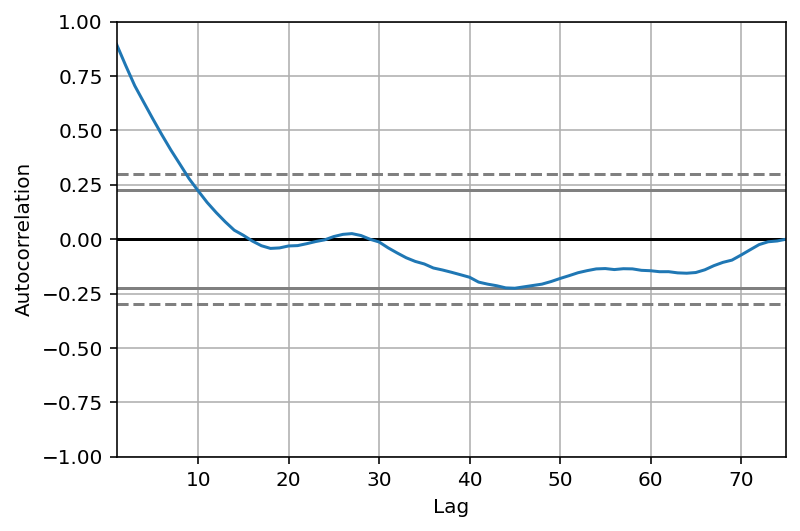

In [40]:
pd.plotting.autocorrelation_plot(df1[('secondary_symptom_score', metric_to_plot)])

In [41]:
display(symptoms_no_diag_window[symptoms_no_diag_window[('version','count')] > 10.0].loc['0NO8l0hUq1R5ptc0FBUIKDqdAco1', :])

,"(version, sum)","(version, mean)","(version, count)","(version, max)","(version, min)","(version, std)","(task_mood_value_arousal, sum)","(task_mood_value_arousal, mean)","(task_mood_value_arousal, count)","(task_mood_value_arousal, max)",...,"(lcovid_symptom_score, min)","(lcovid_symptom_score, std)","(total_symptom_score, sum)","(total_symptom_score, mean)","(total_symptom_score, count)","(total_symptom_score, max)","(total_symptom_score, min)","(total_symptom_score, std)",ks_pvalue,ks_dstatistic
time,,,,,,,,,,,,,,,,,,,,,
2020-12-04 00:00:00+00:00,11.0,1.000000,11.0,1.0,1.0,0.000000,-2.333333,-0.212121,11.0,0.00,...,0.0,0.000000,46.833333,4.257576,11.0,9.333333,2.0,2.096775,0.997097,0.181818
2020-12-08 00:00:00+00:00,12.0,1.000000,12.0,1.0,1.0,0.000000,-2.583333,-0.215278,12.0,0.00,...,0.0,0.000000,50.333333,4.194444,12.0,9.333333,2.0,2.011122,0.868982,0.333333
2020-12-11 00:00:00+00:00,13.0,1.000000,13.0,1.0,1.0,0.000000,-2.833333,-0.217949,13.0,0.00,...,0.0,0.000000,56.333333,4.333333,13.0,9.333333,2.0,1.989556,0.999212,0.307692
2020-12-15 00:00:00+00:00,14.0,1.000000,14.0,1.0,1.0,0.000000,-3.083333,-0.220238,14.0,0.00,...,0.0,0.000000,64.333333,4.595238,14.0,9.333333,2.0,2.148060,0.343320,0.285714
2020-12-18 00:00:00+00:00,15.0,1.000000,15.0,1.0,1.0,0.000000,-3.333333,-0.222222,15.0,0.00,...,0.0,0.000000,70.333333,4.688889,15.0,9.333333,2.0,2.101461,0.938331,0.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-16 00:00:00+00:00,96.0,3.555556,27.0,4.0,3.0,0.506370,-16.000000,-0.592593,27.0,-0.25,...,0.0,3.398508,163.000000,6.037037,27.0,9.000000,3.0,1.675192,0.935662,0.222222
2021-07-20 00:00:00+00:00,97.0,3.592593,27.0,4.0,3.0,0.500712,-16.500000,-0.611111,27.0,-0.25,...,0.0,3.377907,166.000000,6.148148,27.0,9.000000,3.0,1.633865,0.935662,0.148148
2021-07-23 00:00:00+00:00,95.0,3.653846,26.0,4.0,3.0,0.485165,-16.500000,-0.634615,26.0,-0.25,...,0.0,3.295685,160.000000,6.153846,26.0,8.000000,3.0,1.515053,0.926019,0.192308


In [42]:
# Unique users with symptoms for more than 12 days in a 84 day window (based on anwsering once every week) and uniformly distributed over time
id_symp_no_diag = symptoms_no_diag_window[(symptoms_no_diag_window[('version','count')] >= 12.0) & (symptoms_no_diag_window['ks_pvalue'] > 0.1) ].index.remove_unused_levels().levels[0].unique()
display(id_symp_no_diag)
len(id_symp_no_diag)

Index(['09LN775wr1XSHwdFDiGLyaIl2w02', '0NO8l0hUq1R5ptc0FBUIKDqdAco1',
       '0WULHrBwfTS6dEvXYFYarRh0RxB2', '0WZlA4HB3NUC2VBbi0EVTGdM5BA2',
       '0cTEoKpIhOfwgAAaZJKbsYFtSsW2', '0fYkwSQ9ZIMvzCSFv8AX3GF85nm1',
       '1EDK902lN8dvyySIO1WVfCjxm5F3', '1FJ6L7sIZCNIn8JLyavhvj4hMYH2',
       '1G80vO9saHZxqa66VvEqU4hZ2dn2', '1Ic0VWLeO3YScgvptQmrRYqTM0D2',
       ...
       'z4lFeEgoCTNQ806oj3bxinG3ONS2', 'zAku2piyvDShOSAKPUOnCA6L6oD3',
       'zAlOjf6a3KMI8dciCVX6WCz5bZe2', 'zDS0m05iawP1mTMctDX7q4q2yvZ2',
       'zGwGudkfHUUhYkhrk5aq7WUmfhJ3', 'zJqfTyhsCIWX3OGiF0FSz8qkcvQ2',
       'zNX4GtEbscTK80MdVVXnMCxHvsS2', 'zQCqiR1USqU3Djd9ATpVojmWoIR2',
       'zSNi7h9gu3NFGBeoN8kTwIaLM0a2', 'zhhSSItYoXXNWBk2cI2hH8MX6E63'],
      dtype='object', name='id', length=498)

498

In [120]:
# Find the largest sequence of indices with condition of greater than threshold
# returns duration, min, max and avg severity of total symptom score
# This is useful when the threshold is greater than the filter used, so that there maybe breaks in the data with a lower count.
def find_indices(df, threshold):
    largest_duration = pd.Timedelta(0)
    largest_min = None
    largest_max = None
    largest_avg_severity = 0
    sum_severity = 0
    n_rows=0
    range_max = df.index[0]
    range_min = df.index[0]
    display(df.head())
    for index, row in df.iterrows():
        c = row['total_symptom_score_count']
        if c < threshold:
            if largest_duration == None or largest_duration < range_max-range_min:
                largest_duration=range_max-range_min
                largest_min=range_min
                largest_max=range_max
                if n_rows > 0:
                    largest_avg_severity = sum_severity/n_rows
            # reset as threshold reached
            range_min = index
            range_max = index
            sum_serverity = 0
            n_rows = 0
        else:
            range_max = index
            sum_severity += row['total_symptom_score_mean']
            n_rows += 1
        print(largest_duration, largest_min, largest_max)
        
    if largest_duration == None or largest_duration < range_max-range_min:
        largest_duration=range_max-range_min
        largest_min=range_min
        largest_max=range_max
        if n_rows > 0:
            largest_avg_severity = sum_severity/n_rows


    return largest_duration, largest_min, largest_max, largest_avg_severity
        
    

In [43]:
# Get average duration of symptoms of the above ids - 
#    1. Take the maximum duration of the symptoms where symptoms were reported atleast once every week for 12 weeks (can also check the distribution is uniform using the pvalue calculated above).
#    2. Sort by time index and find the largest sequence of indices where the symptom count is greater than threshold. The minimum index and maximum index of this range will be the duration of sympmtoms for long covid.

symp_no_diag_duration_df = pd.DataFrame(index=['id'], 
                                        columns=['duration', 'range_min', 'range_max', 'avg_severity',
                                                 'avg_main_symptom_severity', 'avg_secondary_symptom_severity',
                                                 'avg_pvalue'])

threshold = 12.0

processed_df = symptoms_no_diag_window[symptoms_no_diag_window['ks_pvalue'] > 0.1]
processed_df = processed_df[processed_df[('version','count')] >= threshold]

# Since threshold is same as the filter used above we don't need to consider breaks in ranges where count can be lower than threshold.
# hence we can just chose the max and min values for the indices as range.
for i in id_symp_no_diag:
    tmp_df = processed_df.loc[i, [('total_symptom_score', 'mean'), ('total_symptom_score', 'count'), ('main_symptom_score', 'mean'), ('secondary_symptom_score', 'mean'), 'ks_pvalue']].sort_index()
    tmp_df.columns = ['total_symptom_score_mean', 'total_symptom_score_count', 'main_symptom_score_mean', 'secondary_symptom_score_mean', 'ks_pvalue']
    range_min = max(min(tmp_df.index) - pd.Timedelta(days=84), min(symptoms_no_diag_window.loc[i, :].index))
    symp_no_diag_duration_df.loc[i, ['duration', 'range_min', 'range_max', 'avg_severity', 'avg_main_symptom_severity', 'avg_secondary_symptom_severity', 'avg_pvalue']] =  [max(tmp_df.index)-range_min, range_min, max(tmp_df.index), tmp_df['total_symptom_score_mean'].mean(), tmp_df['main_symptom_score_mean'].mean(), tmp_df['secondary_symptom_score_mean'].mean(), tmp_df['ks_pvalue'].mean()]  #list(find_indices(tmp_df, threshold))

symp_no_diag_duration_df.drop('id', axis=0, inplace=True)
symp_no_diag_duration_df.head()

,duration,range_min,range_max,avg_severity,avg_main_symptom_severity,avg_secondary_symptom_severity,avg_pvalue
09LN775wr1XSHwdFDiGLyaIl2w02,84 days 00:00:00,2021-05-07 00:00:00+00:00,2021-07-30 00:00:00+00:00,1.58333,0,0,0.255775
0NO8l0hUq1R5ptc0FBUIKDqdAco1,262 days 00:00:00,2020-11-10 00:00:00+00:00,2021-07-30 00:00:00+00:00,4.71515,0.0607326,4.05553,0.778868
0WULHrBwfTS6dEvXYFYarRh0RxB2,183 days 00:00:00,2020-10-19 00:00:00+00:00,2021-04-20 00:00:00+00:00,1.18107,1.09714,0.083935,0.652556
0WZlA4HB3NUC2VBbi0EVTGdM5BA2,84 days 00:00:00,2021-05-11 00:00:00+00:00,2021-08-03 00:00:00+00:00,1.41667,0,0,0.868982
0cTEoKpIhOfwgAAaZJKbsYFtSsW2,60 days 00:00:00,2021-06-04 00:00:00+00:00,2021-08-03 00:00:00+00:00,1.46291,0.532858,0,0.513039


In [44]:
symp_no_diag_duration_df['duration_d'] = symp_no_diag_duration_df['duration'] / np.timedelta64(1, 's') / 86400

In [46]:
symp_no_diag_duration_df.loc['0NO8l0hUq1R5ptc0FBUIKDqdAco1', ['duration', 'avg_severity']]

duration        262 days 00:00:00
avg_severity              4.71515
Name: 0NO8l0hUq1R5ptc0FBUIKDqdAco1, dtype: object

array([<AxesSubplot:title={'center':'duration_d'}>,
       <AxesSubplot:title={'center':'avg_severity'}>], dtype=object)

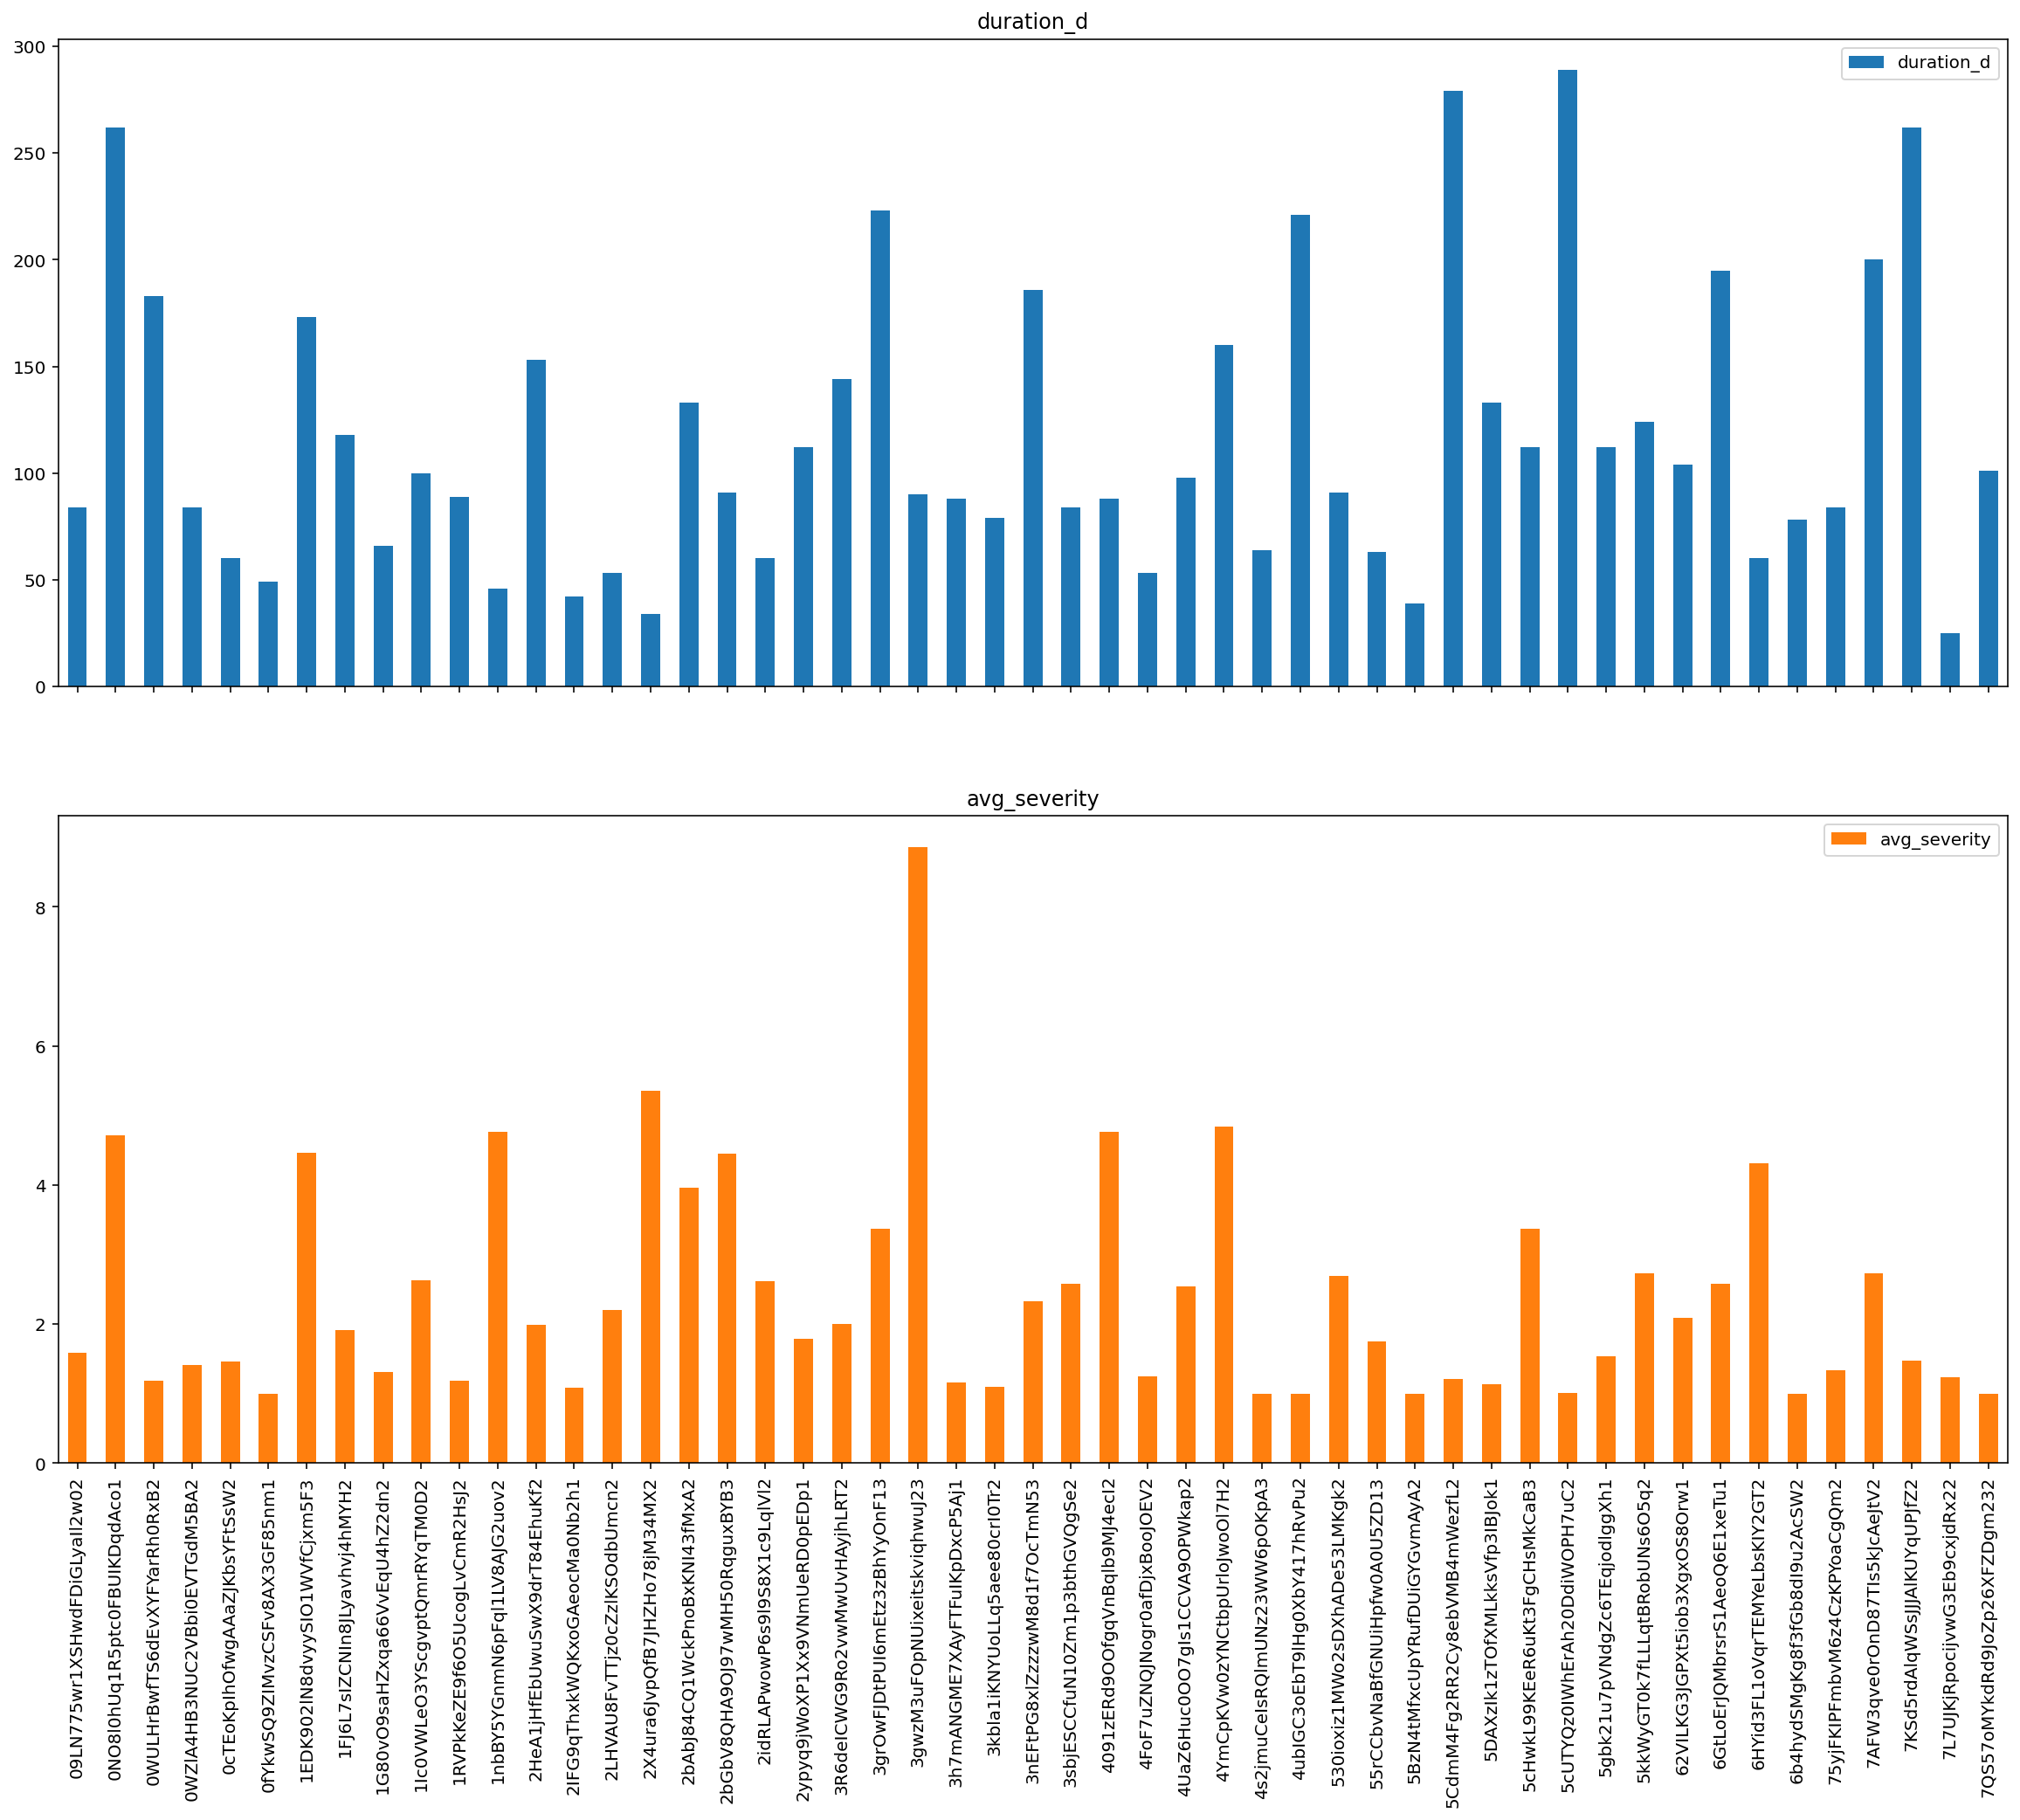

In [47]:
symp_no_diag_duration_df.loc[symp_no_diag_duration_df.index[0]:symp_no_diag_duration_df.index[50], ['duration_d', 'avg_severity']].plot.bar(subplots=True, figsize=(20,15))

duration_d         AxesSubplot(0.125,0.125;0.352273x0.755)
avg_severity    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

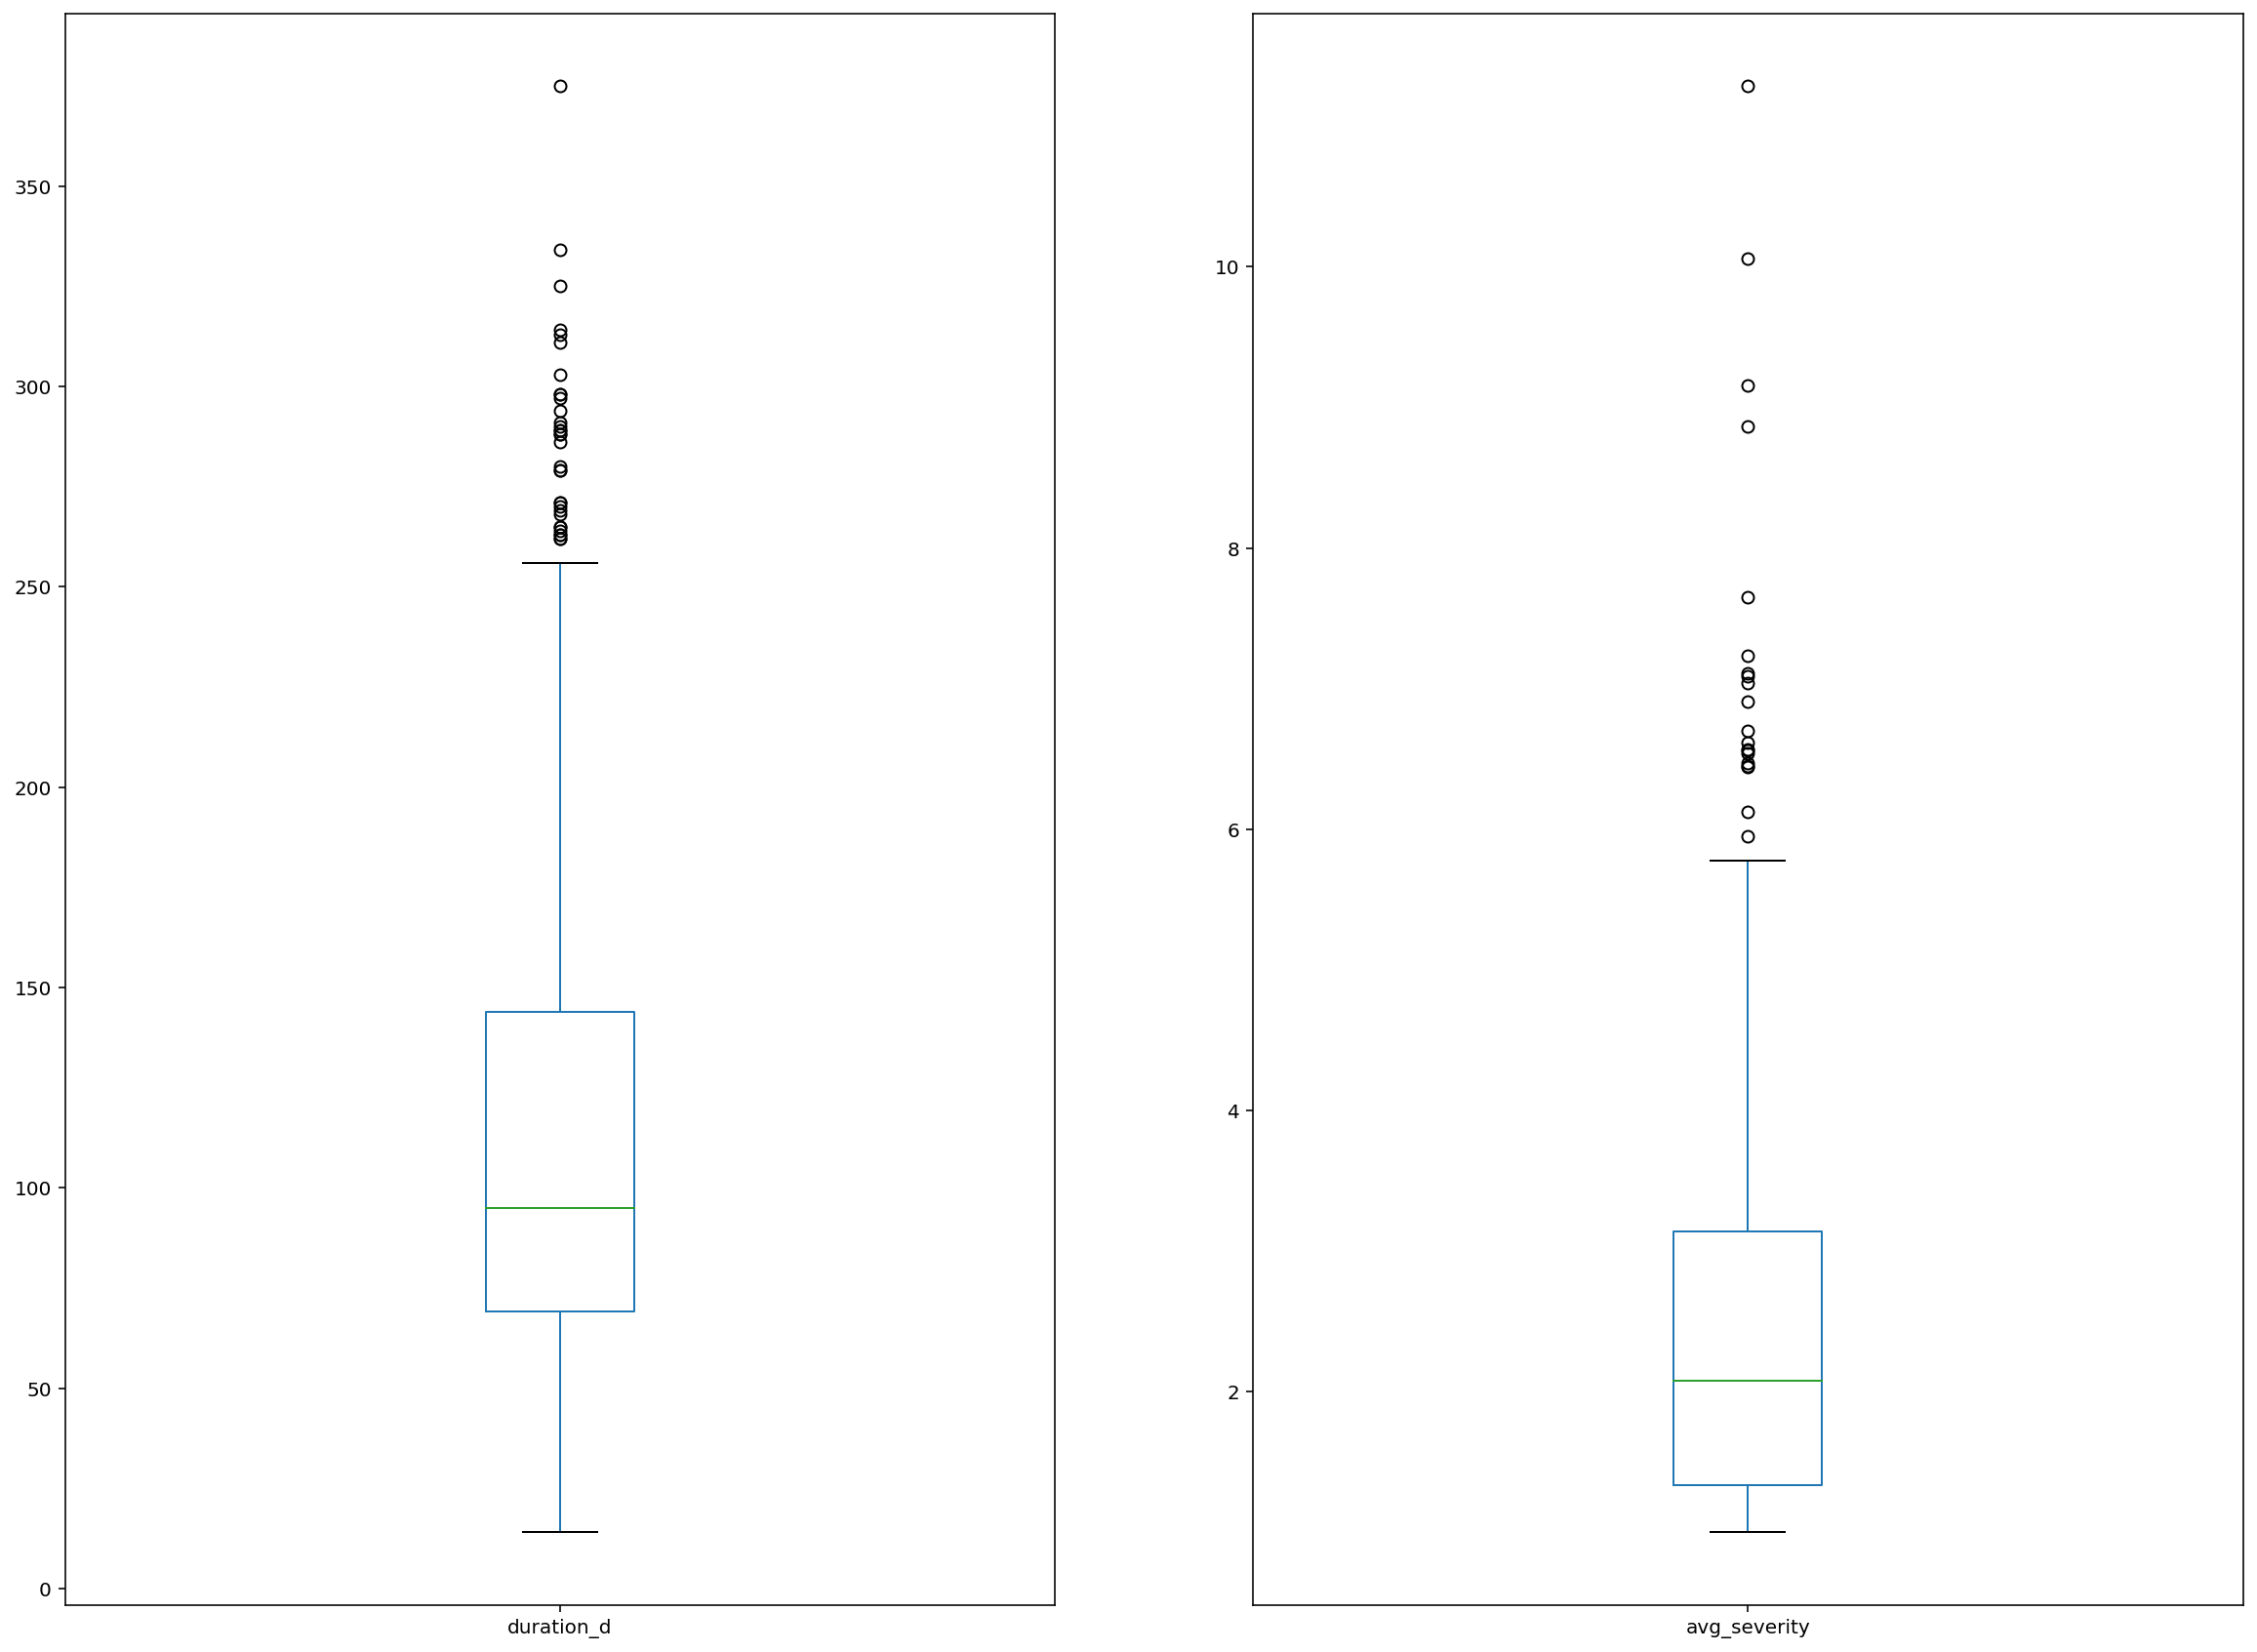

In [48]:
symp_no_diag_duration_df.loc[:, ['duration_d', 'avg_severity']].plot.box(subplots=True, figsize=(20,15))

In [ ]:
# create box plots for main, secondary, etc 

<AxesSubplot:>

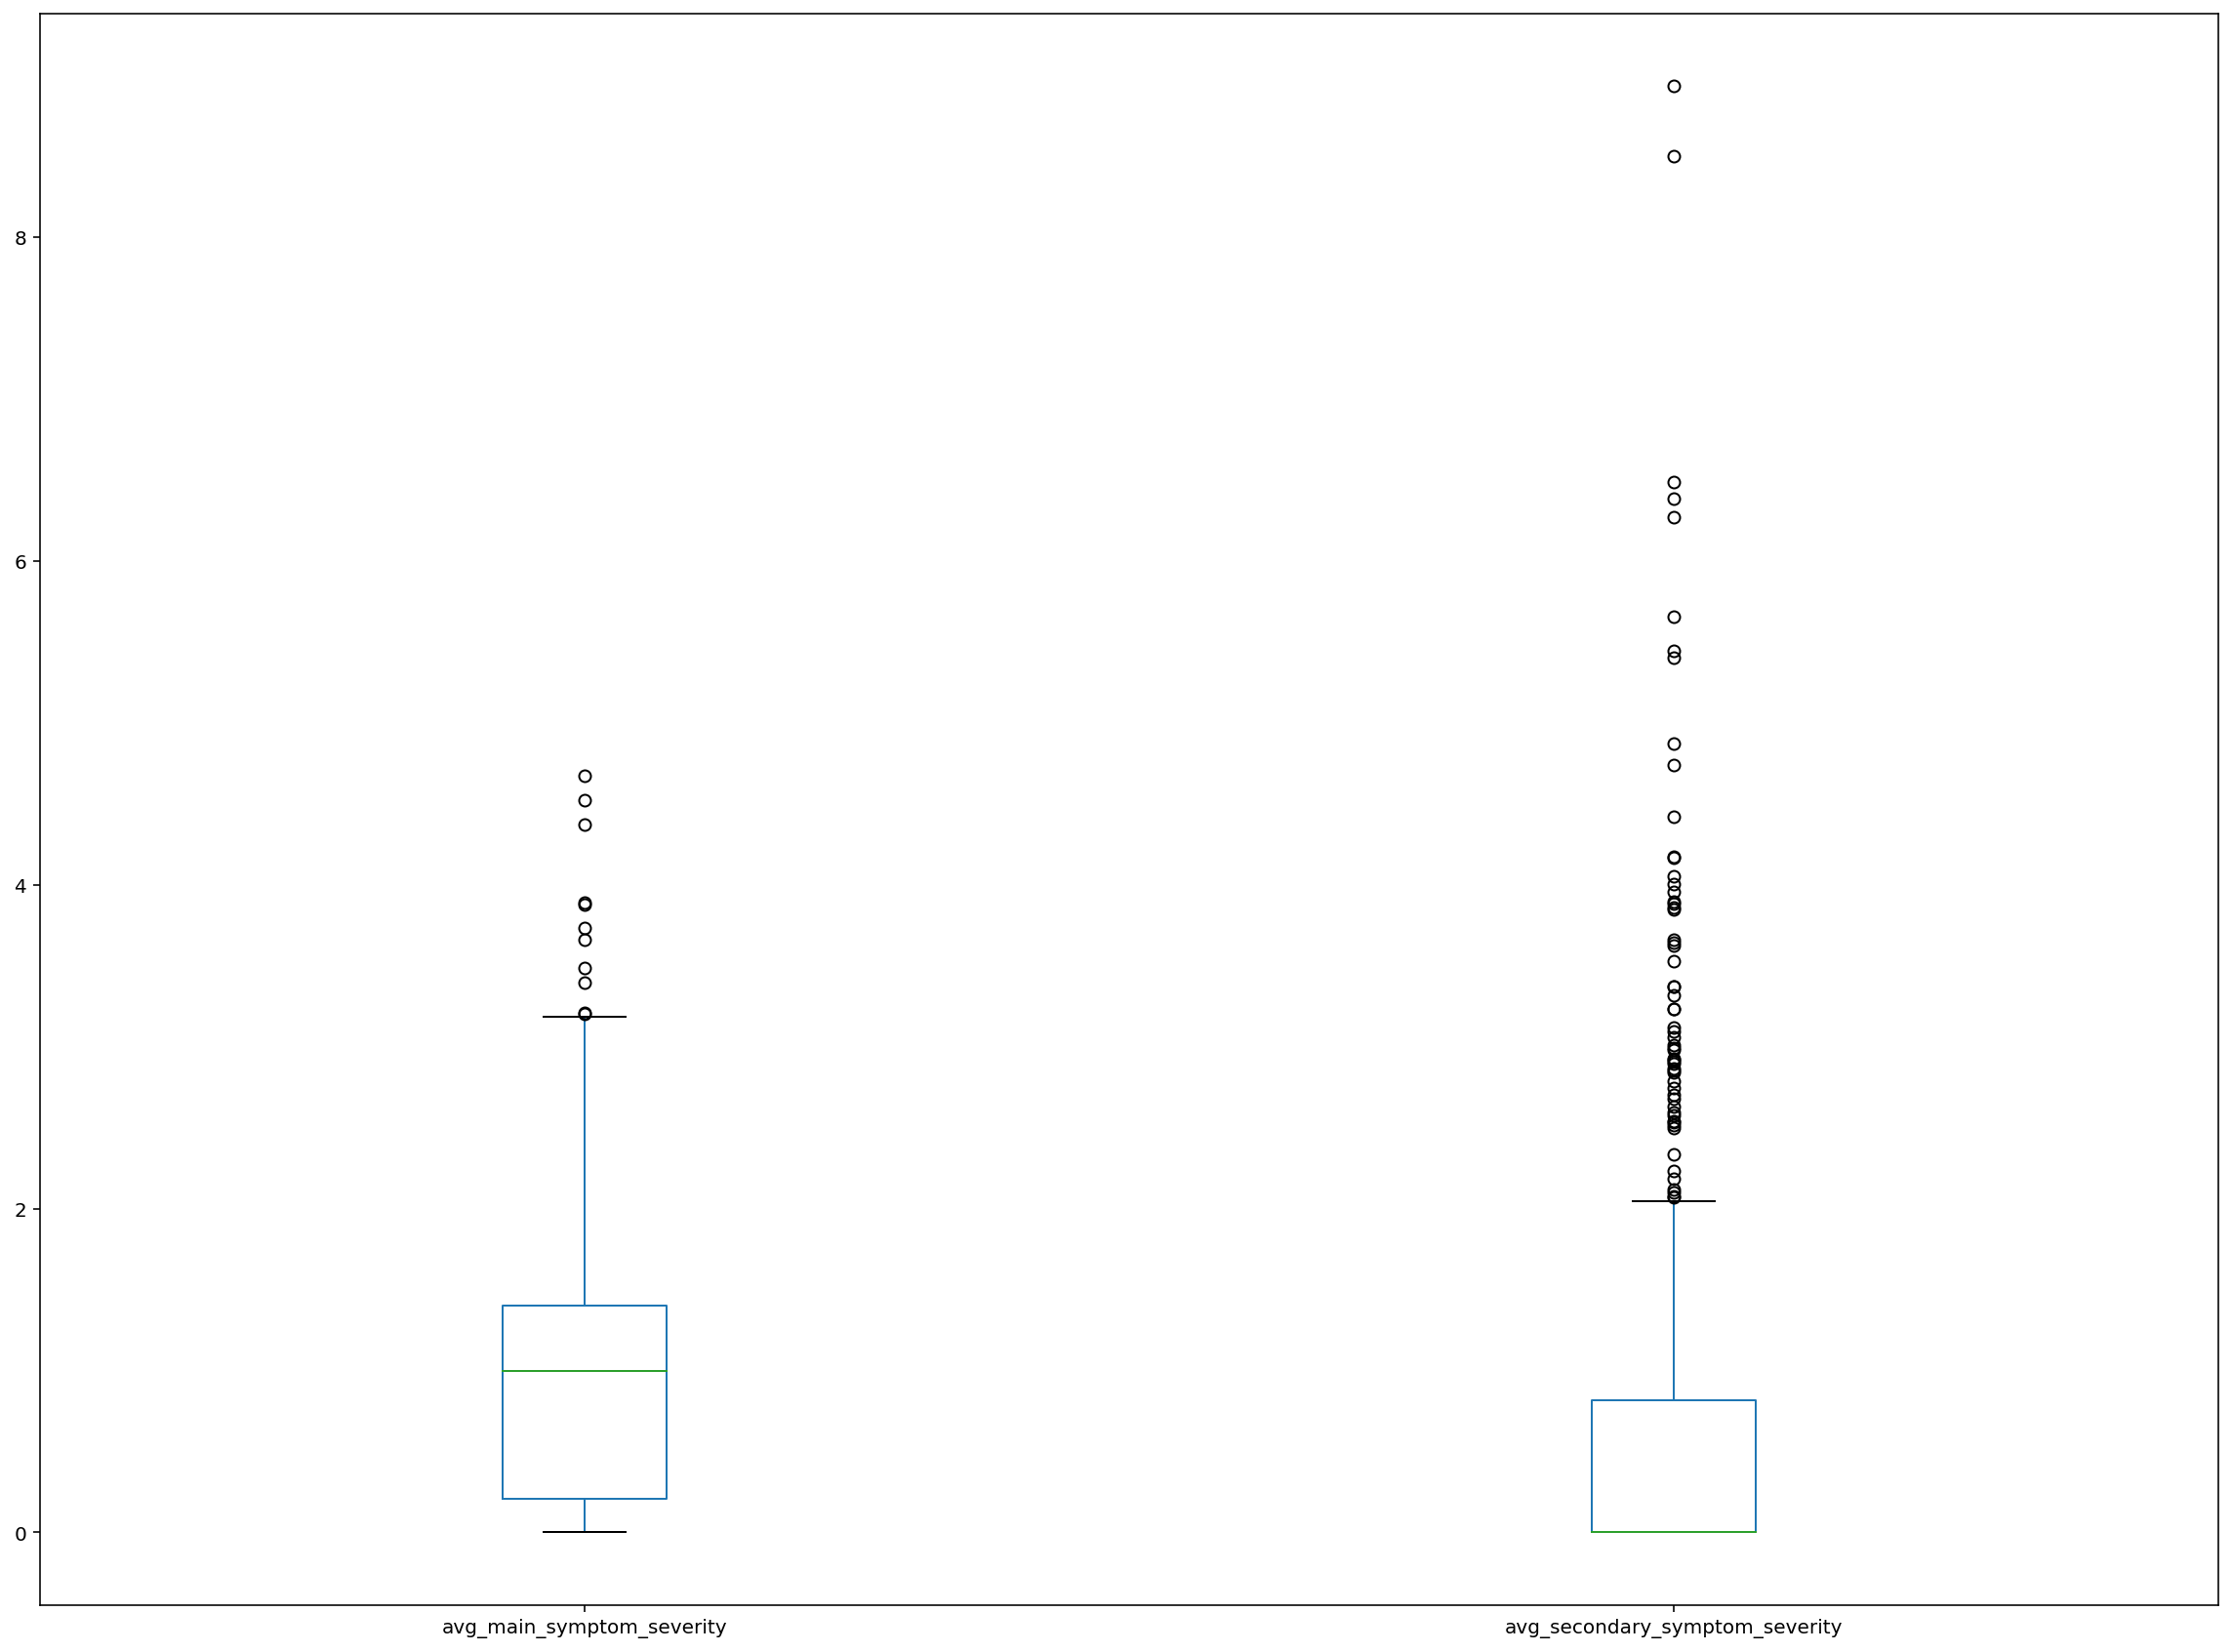

In [49]:
symp_no_diag_duration_df.loc[:, ['avg_main_symptom_severity', 'avg_secondary_symptom_severity']].plot.box(figsize=(20,15))

In [50]:
# box plots for all types of symptoms

li = []

for index, row in symp_no_diag_duration_df.iterrows():
    symptoms_no_diag_1d = symptoms_no_diag[symptoms_no_diag['id'] == index].groupby(['id', pd.Grouper(freq='1D')]).mean()
    symptoms_no_diag_1d = symptoms_no_diag_1d.loc[index, :].loc[row['range_min']:row['range_max'],
                                     main_symptom_cols + secondary_symptom_cols]
    symptoms_no_diag_1d['id'] = index
    
    symptoms_no_diag_1d = symptoms_no_diag_1d.groupby('id').mean()
    li.append(symptoms_no_diag_1d.copy())

    
df_temp = pd.concat(li)
df_temp.head()

,task_symptoms_value_Cough,task_symptoms_value_Difficulties breathing,task_symptoms_value_Fever,task_symptoms_value_Loss of sense of smell (anosmia),task_symptoms_value_Fatigue,task_symptoms_value_Muscle or joint pain,task_symptoms_value_Headache,task_symptoms_value_Nausea,task_symptoms_value_Congestion,task_symptoms_value_Chills,task_symptoms_value_Confusion
id,,,,,,,,,,,
09LN775wr1XSHwdFDiGLyaIl2w02,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
0NO8l0hUq1R5ptc0FBUIKDqdAco1,0.023529,0.011765,0.011765,0.000000,0.909804,0.14902,0.609804,0.12549,0.543137,0.007843,1.129412
0WULHrBwfTS6dEvXYFYarRh0RxB2,1.096774,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.129032,0.000000,0.000000
0WZlA4HB3NUC2VBbi0EVTGdM5BA2,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
0cTEoKpIhOfwgAAaZJKbsYFtSsW2,0.000000,0.294118,0.000000,0.176471,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000


In [51]:
df_temp.columns = [ c.replace('task_symptoms_value_', '') for c in df_temp.columns ]

In [162]:
df_temp.columns

Index(['Cough', 'Difficulties breathing', 'Fever',
       'Loss of sense of smell (anosmia)', 'Fatigue', 'Muscle or joint pain',
       'Headache', 'Nausea', 'Congestion', 'Chills', 'Confusion'],
      dtype='object')

Text(0.5, 1.0, 'Avg Severity of Symptoms')

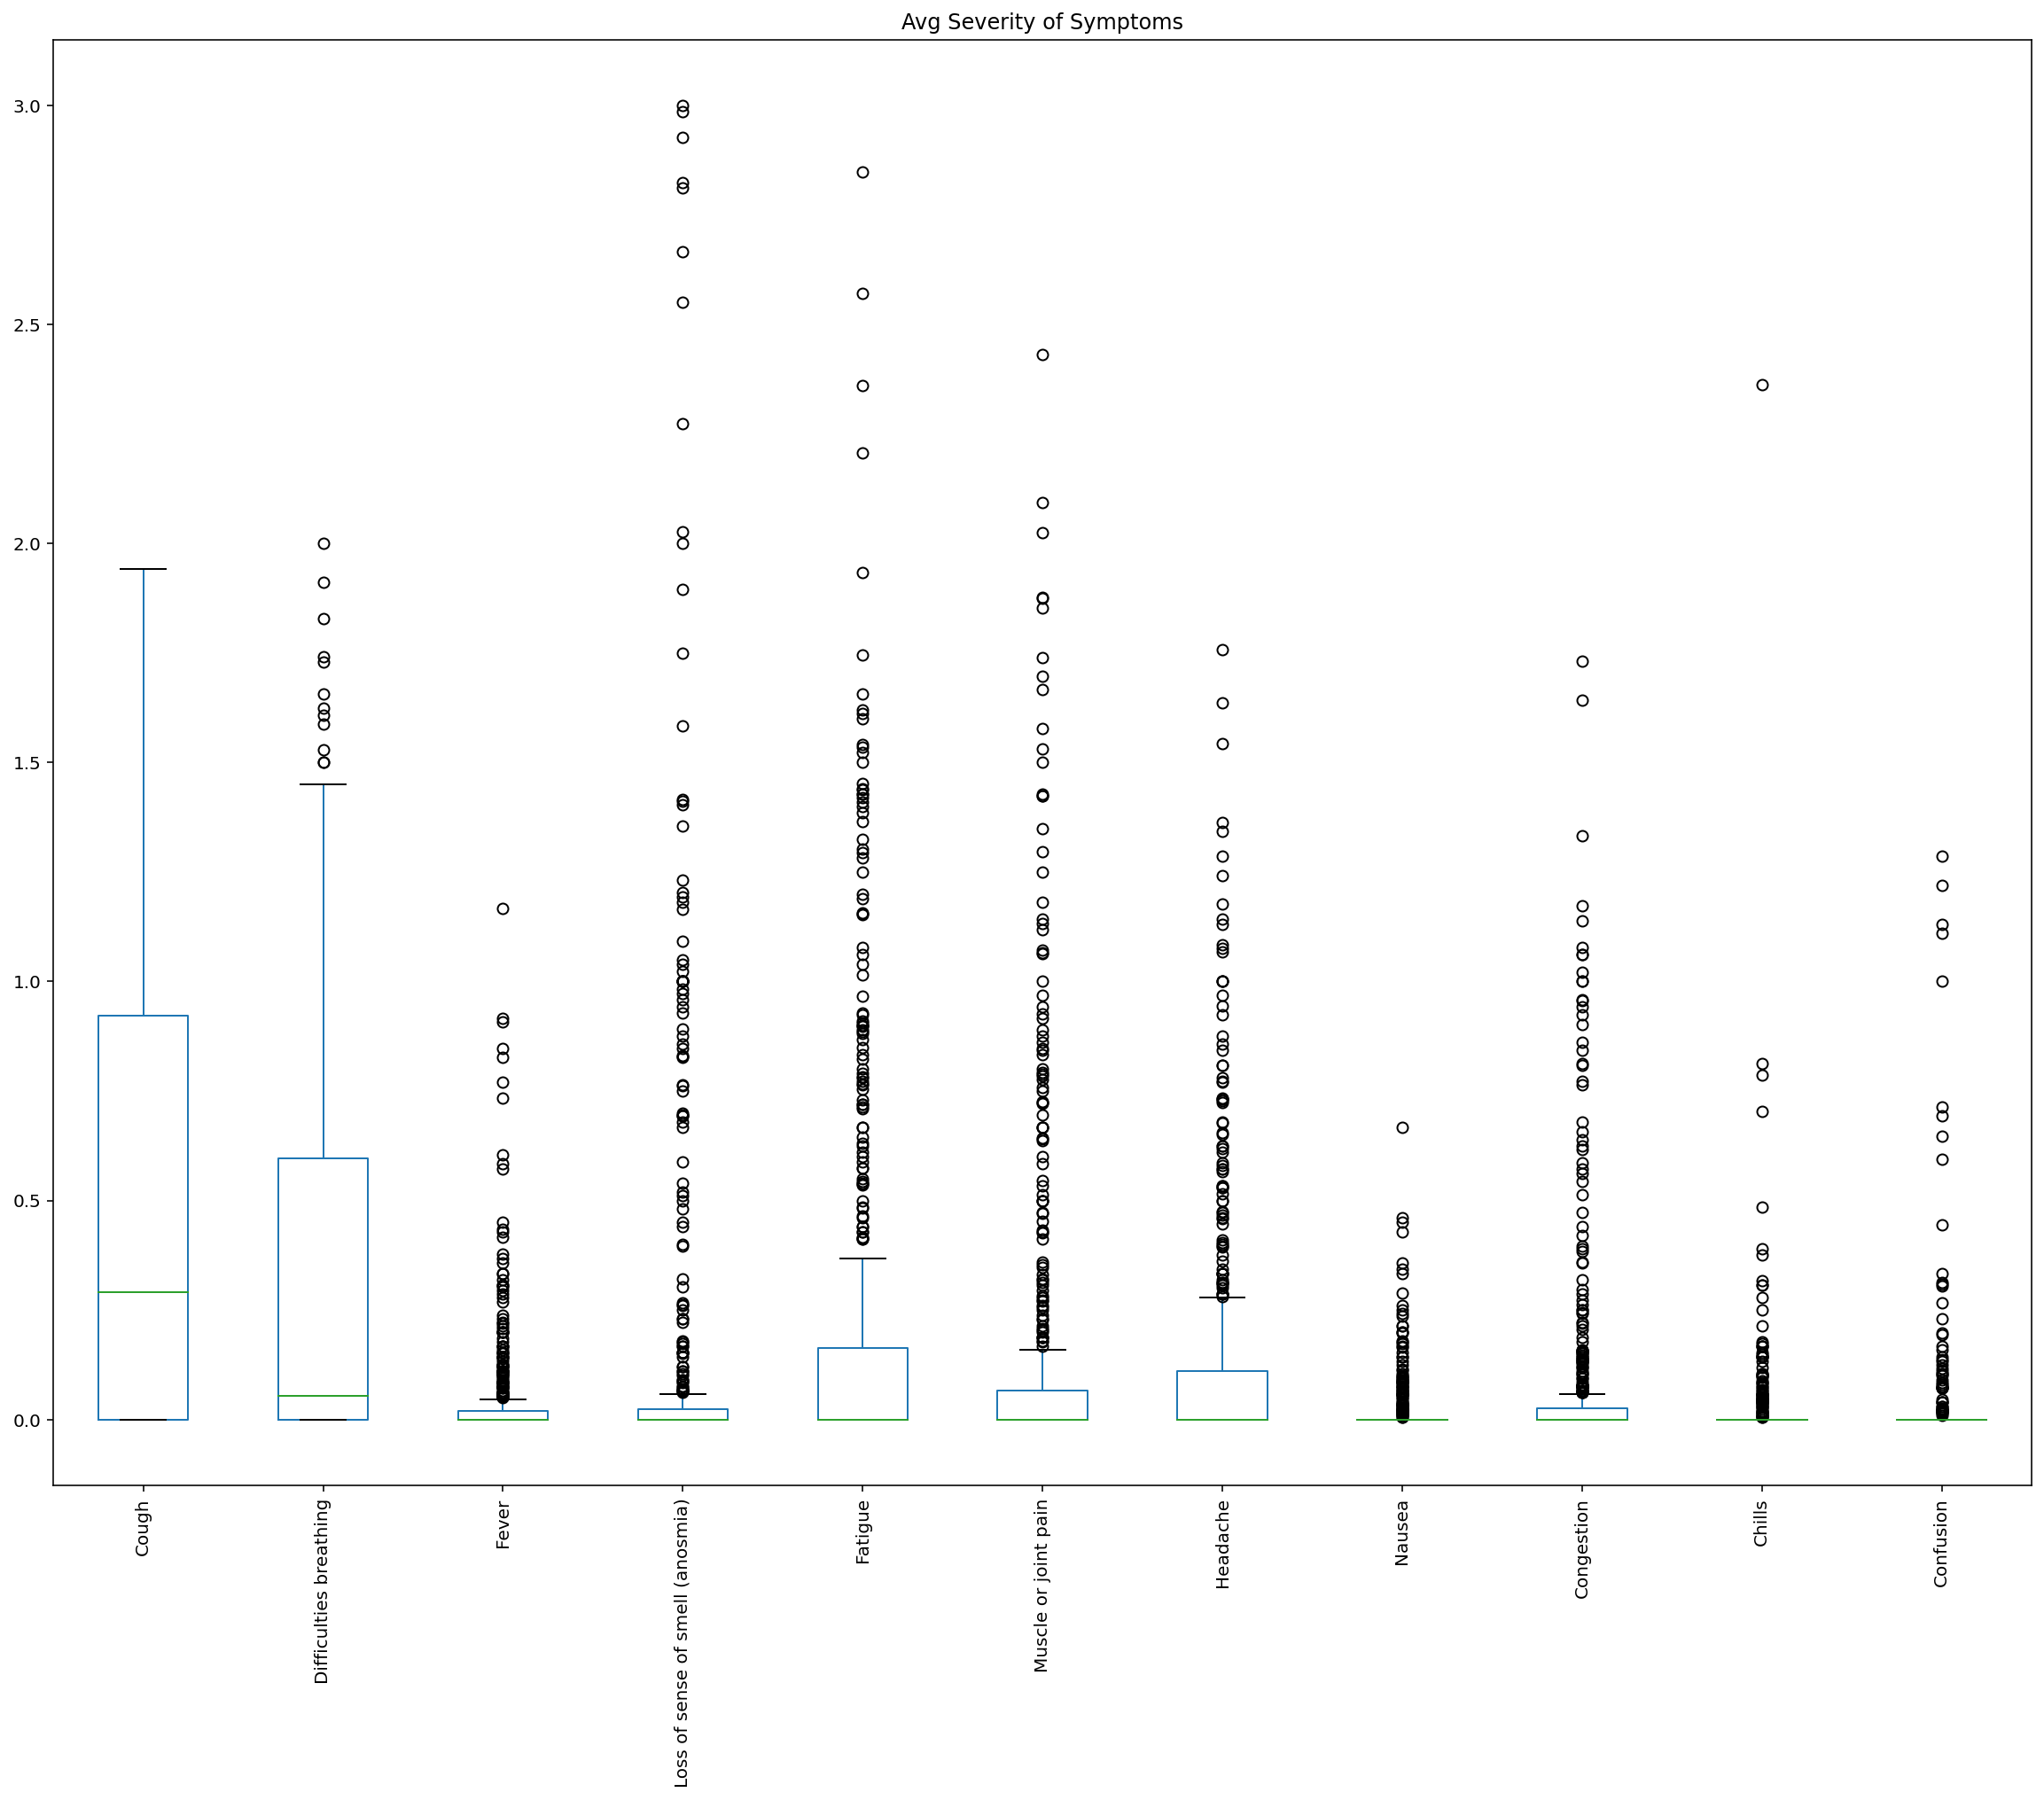

In [85]:
ax = df_temp.plot.box(figsize=(20,15), rot=90)
ax.set_title('Avg Severity of Symptoms')

In [ ]:
# also check lcovid symptoms

## Create cohort 2: participant reporting symptoms, with positive covid diagnosis (PCR)

In [53]:
symptoms_with_diag = symptoms_fill[symptoms_fill['id'].isin(diagnosis_filtered['id'].unique())]

In [54]:
symptoms_with_diag = symptoms_with_diag.set_index(pd.to_datetime(symptoms_with_diag['time'], infer_datetime_format=True))

In [55]:
# Filter where atleast one symptom severity is greate than 0
symptoms_with_diag = symptoms_with_diag.loc[(symptoms_with_diag[main_symptom_cols + secondary_symptom_cols + lcovid_symptom_cols] > 0.0).any(1)]

In [56]:
symptoms_with_diag['secondary_symptom_score'] = symptoms_with_diag.loc[:, secondary_symptom_cols].sum(axis=1)

In [57]:
symptoms_with_diag['main_symptom_score'] = symptoms_with_diag.loc[:, main_symptom_cols].sum(axis=1)

In [58]:
symptoms_with_diag['lcovid_symptom_score'] = symptoms_with_diag.loc[:, lcovid_symptom_cols].sum(axis=1)

In [59]:
symptoms_with_diag['total_symptom_score'] = symptoms_with_diag.loc[:, all_symptom_cols].sum(axis=1)

In [60]:
len(symptoms_with_diag['id'].unique())

854

In [61]:
symptoms_with_diag = symptoms_with_diag.drop(['Unnamed: 0', 'time_scheduled', 'pid'], axis=1)

In [78]:
# Group by user Ids and rolling windows of 12 weeks (soft definition of Long covid from Literature)
# We also resample to 1D and add take mean of all the values in a single day, to make sure the data is daily
# and hence the count will be of daily symptoms reports (will eradicate more than 1 in a day).
symptoms_with_diag_grouped = symptoms_with_diag.groupby(['id', pd.Grouper(freq='1D', level='time')]).mean()

list_of_dfs_2 = []
count = 0
for grp, grp_df in symptoms_with_diag_grouped.groupby(level='id'):
    if len(grp_df) == 0:
        continue
    grp_df_cp = grp_df.copy()
    
    diag_dates = diagnosis_filtered[diagnosis_filtered['id'] == grp]
    i = 0
    for index, row in diag_dates.iterrows():
        if pd.notnull(row['task_date_illness_value']):
            index = pd.to_datetime(row['task_date_illness_value'], infer_datetime_format=True)
        i+=1
        # If more than 1 diagnosis, we create a unique id for the same user
        if i > 1:
            try:
                grp = f'{grp}_repeat_{i}'
                grp_df = grp_df_cp.reindex(level='id', index=[grp])
            except ValueError as ve:
                print(ve)
                display(grp_df)
                display(grp)
                raise ve
                
#         display(len(diag_dates))
#         display(grp)
#         display(diag_dates)
        
        #display(grp_df.reset_index('id'))
        seed = np.random.randint(10000)
        
        # Take only time window from 15 days before diagnosis (since symptoms can appear before diagnosis)
        idx = pd.IndexSlice
        grp_df = grp_df.loc[idx[:, index-pd.Timedelta(10, unit='days'):], :]
        
        grp_df.index = grp_df.index.remove_unused_levels()
#         display(grp_df)
        res_df = grp_df.rolling(window='84D', on=grp_df.index.levels[1], min_periods=1).agg(['sum', 'mean', 'count', 'max', 'min', 'std'])
        grp_df['ks_stats'] = 0
        res_df = pd.concat([res_df, grp_df['ks_stats'].rolling(window='84D',on=grp_df.index.levels[1], min_periods=1).agg({'ks_pvalue': lambda x: ks_pvalue(x, seed), 'ks_dstatistic': lambda x: ks_dstatistic(x, seed)})], axis=1)
        #display(res_df.head())
        list_of_dfs_2.append(res_df)
    count+=1
    if count % 100 == 0:
        print(f'progress: {count}', end='\x1b[1K\r')
print(f'Total added: {count}')

Total added: 854K


In [79]:
# save intermediate processed data so can be loaded earlier
import pickle
with open('list_of_dfs_2', 'wb+') as f:
    pickle.dump(list_of_dfs_2, f)

In [28]:
# Load intermediate processed data so can be loaded earlier
import pickle
with open('list_of_dfs_2', 'rb') as f:
    list_of_dfs_2 = pickle.load(f)

In [80]:
symptoms_with_diag_window = pd.concat(list_of_dfs_2)

symptoms_with_diag_window
#symptoms_no_diag_window = symptoms_no_diag_grouped.rolling(window='84D', on=symptoms_no_diag_grouped.index.levels[1]).agg(['sum', 'mean', 'count'])

(version, sum)  \
id                           time                                        
00a9SPtBFkYF8KmWTvPPU0y69Xo1 2021-06-29 00:00:00+00:00             4.0   
                             2021-07-16 00:00:00+00:00             8.0   
02KIBYpUG9QJ9yL0w7fU1oHUysu1 2021-01-14 00:00:00+00:00             1.0   
                             2021-01-16 00:00:00+00:00             2.0   
                             2021-01-19 00:00:00+00:00             3.0   
...                                                                ...   
zxSQFV06pzSr3eOw5sZ5ETv2NaD2 2021-06-13 00:00:00+00:00            16.0   
zzvksuOwiSNtBglkEr8z5nctTz53 2021-01-21 00:00:00+00:00             2.0   
                             2021-01-22 00:00:00+00:00             4.0   
                             2021-01-23 00:00:00+00:00             6.0   
                             2021-01-25 00:00:00+00:00             8.0   

                                                        (version, mean)  \
id                           time                                         
00a9SPtBFkYF8KmWTvPPU0y69Xo1 2021-06-29 00:00:00+00:00              4.0   
                             2021-07-16 00:00:00+00:00              4.0   
02KIBYpUG9QJ9yL0w7fU1oHUysu1 2021-01-14 00:00:00+00:00              1.0   
                             2021-01-16 00:00:00+00:00              1.0   
                             2021-01-19 00:00:00+00:00              1.0   
...                                                                 ...   
zxSQFV06pzSr3eOw5sZ5ETv2NaD2 2021-06-13 00:00:00+00:00              1.0   
zzvksuOwiSNtBglkEr8z5nctTz53 2021-01-21 00:00:00+00:00              2.0   
                             2021-01-22 00:00:00+00:00              2.0   
                             2021-01-23 00:00:00+00:00              2.0   
                             2021-01-25 00:00:00+00:00              2.0   

                                                        (version, count)  \
id                           time                                          
00a9SPtBFkYF8KmWTvPPU0y69Xo1 2021-06-29 00:00:00+00:00               1.0   
                             2021-07-16 00:00:00+00:00               2.0   
02KIBYpUG9QJ9yL0w7fU1oHUysu1 2021-01-14 00:00:00+00:00               1.0   
                             2021-01-16 00:00:00+00:00               2.0   
                             2021-01-19 00:00:00+00:00               3.0   
...                                                                  ...   
zxSQFV06pzSr3eOw5sZ5ETv2NaD2 2021-06-13 00:00:00+00:00              16.0   
zzvksuOwiSNtBglkEr8z5nctTz53 2021-01-21 00:00:00+00:00               1.0   
                             2021-01-22 00:00:00+00:00               2.0   
                             2021-01-23 00:00:00+00:00               3.0   
                             2021-01-25 00:00:00+00:00               4.0   

                                                        (version, max)  \
id                           time                                        
00a9SPtBFkYF8KmWTvPPU0y69Xo1 2021-06-29 00:00:00+00:00             4.0   
                             2021-07-16 00:00:00+00:00             4.0   
02KIBYpUG9QJ9yL0w7fU1oHUysu1 2021-01-14 00:00:00+00:00             1.0   
                             2021-01-16 00:00:00+00:00             1.0   
                             2021-01-19 00:00:00+00:00             1.0   
...                                                                ...   
zxSQFV06pzSr3eOw5sZ5ETv2NaD2 2021-06-13 00:00:00+00:00             1.0   
zzvksuOwiSNtBglkEr8z5nctTz53 2021-01-21 00:00:00+00:00             2.0   
                             2021-01-22 00:00:00+00:00             2.0   
                             2021-01-23 00:00:00+00:00             2.0   
                             2021-01-25 00:00:00+00:00             2.0   

                                                        (version, min)  \
id                           time                                        
00a9SPtBFkYF8KmWT

In [81]:
symptoms_with_diag_window[symptoms_with_diag_window[('version','count')] > 50.0]

(version, sum)  \
id                           time                                        
0NYueclxhpVxzXhfAhpAUsR0H1C2 2021-01-23 00:00:00+00:00            51.0   
                             2021-01-24 00:00:00+00:00            52.0   
                             2021-01-25 00:00:00+00:00            53.0   
                             2021-01-26 00:00:00+00:00            54.0   
                             2021-01-27 00:00:00+00:00            55.0   
...                                                                ...   
l1lKiSGKHmdvsPf2ewazBgMIONW2 2021-03-31 00:00:00+00:00            58.0   
                             2021-04-01 00:00:00+00:00            58.0   
                             2021-04-02 00:00:00+00:00            58.0   
                             2021-04-03 00:00:00+00:00            59.0   
                             2021-04-05 00:00:00+00:00            60.0   

                                                        (version, mean)  \
id                           time                                         
0NYueclxhpVxzXhfAhpAUsR0H1C2 2021-01-23 00:00:00+00:00              1.0   
                             2021-01-24 00:00:00+00:00              1.0   
                             2021-01-25 00:00:00+00:00              1.0   
                             2021-01-26 00:00:00+00:00              1.0   
                             2021-01-27 00:00:00+00:00              1.0   
...                                                                 ...   
l1lKiSGKHmdvsPf2ewazBgMIONW2 2021-03-31 00:00:00+00:00              1.0   
                             2021-04-01 00:00:00+00:00              1.0   
                             2021-04-02 00:00:00+00:00              1.0   
                             2021-04-03 00:00:00+00:00              1.0   
                             2021-04-05 00:00:00+00:00              1.0   

                                                        (version, count)  \
id                           time                                          
0NYueclxhpVxzXhfAhpAUsR0H1C2 2021-01-23 00:00:00+00:00              51.0   
                             2021-01-24 00:00:00+00:00              52.0   
                             2021-01-25 00:00:00+00:00              53.0   
                             2021-01-26 00:00:00+00:00              54.0   
                             2021-01-27 00:00:00+00:00              55.0   
...                                                                  ...   
l1lKiSGKHmdvsPf2ewazBgMIONW2 2021-03-31 00:00:00+00:00              58.0   
                             2021-04-01 00:00:00+00:00              58.0   
                             2021-04-02 00:00:00+00:00              58.0   
                             2021-04-03 00:00:00+00:00              59.0   
                             2021-04-05 00:00:00+00:00              60.0   

                                                        (version, max)  \
id                           time                                        
0NYueclxhpVxzXhfAhpAUsR0H1C2 2021-01-23 00:00:00+00:00             1.0   
                             2021-01-24 00:00:00+00:00             1.0   
                             2021-01-25 00:00:00+00:00             1.0   
                             2021-01-26 00:00:00+00:00             1.0   
                             2021-01-27 00:00:00+00:00             1.0   
...                                                                ...   
l1lKiSGKHmdvsPf2ewazBgMIONW2 2021-03-31 00:00:00+00:00             1.0   
                             2021-04-01 00:00:00+00:00             1.0   
                             2021-04-02 00:00:00+00:00             1.0   
                             2021-04-03 00:00:00+00:00             1.0   
                             2021-04-05 00:00:00+00:00             1.0   

                                                        (version, min)  \
id                           time                                        
0NYueclxhpVxzXhfA

array([<AxesSubplot:label='da8a4fa4-ceb5-49bc-8e32-d4158051f76d', title={'center':'(secondary_symptom_score, count)'}, xlabel='time'>,
       <AxesSubplot:label='1f39f7a3-855c-4033-97a0-6aeb49548468', title={'center':'(main_symptom_score, count)'}, xlabel='time'>,
       <AxesSubplot:label='61b3865d-febd-4662-9cc0-9eab6df213d0', title={'center':'(task_mood_value_arousal, count)'}, xlabel='time'>],
      dtype=object)

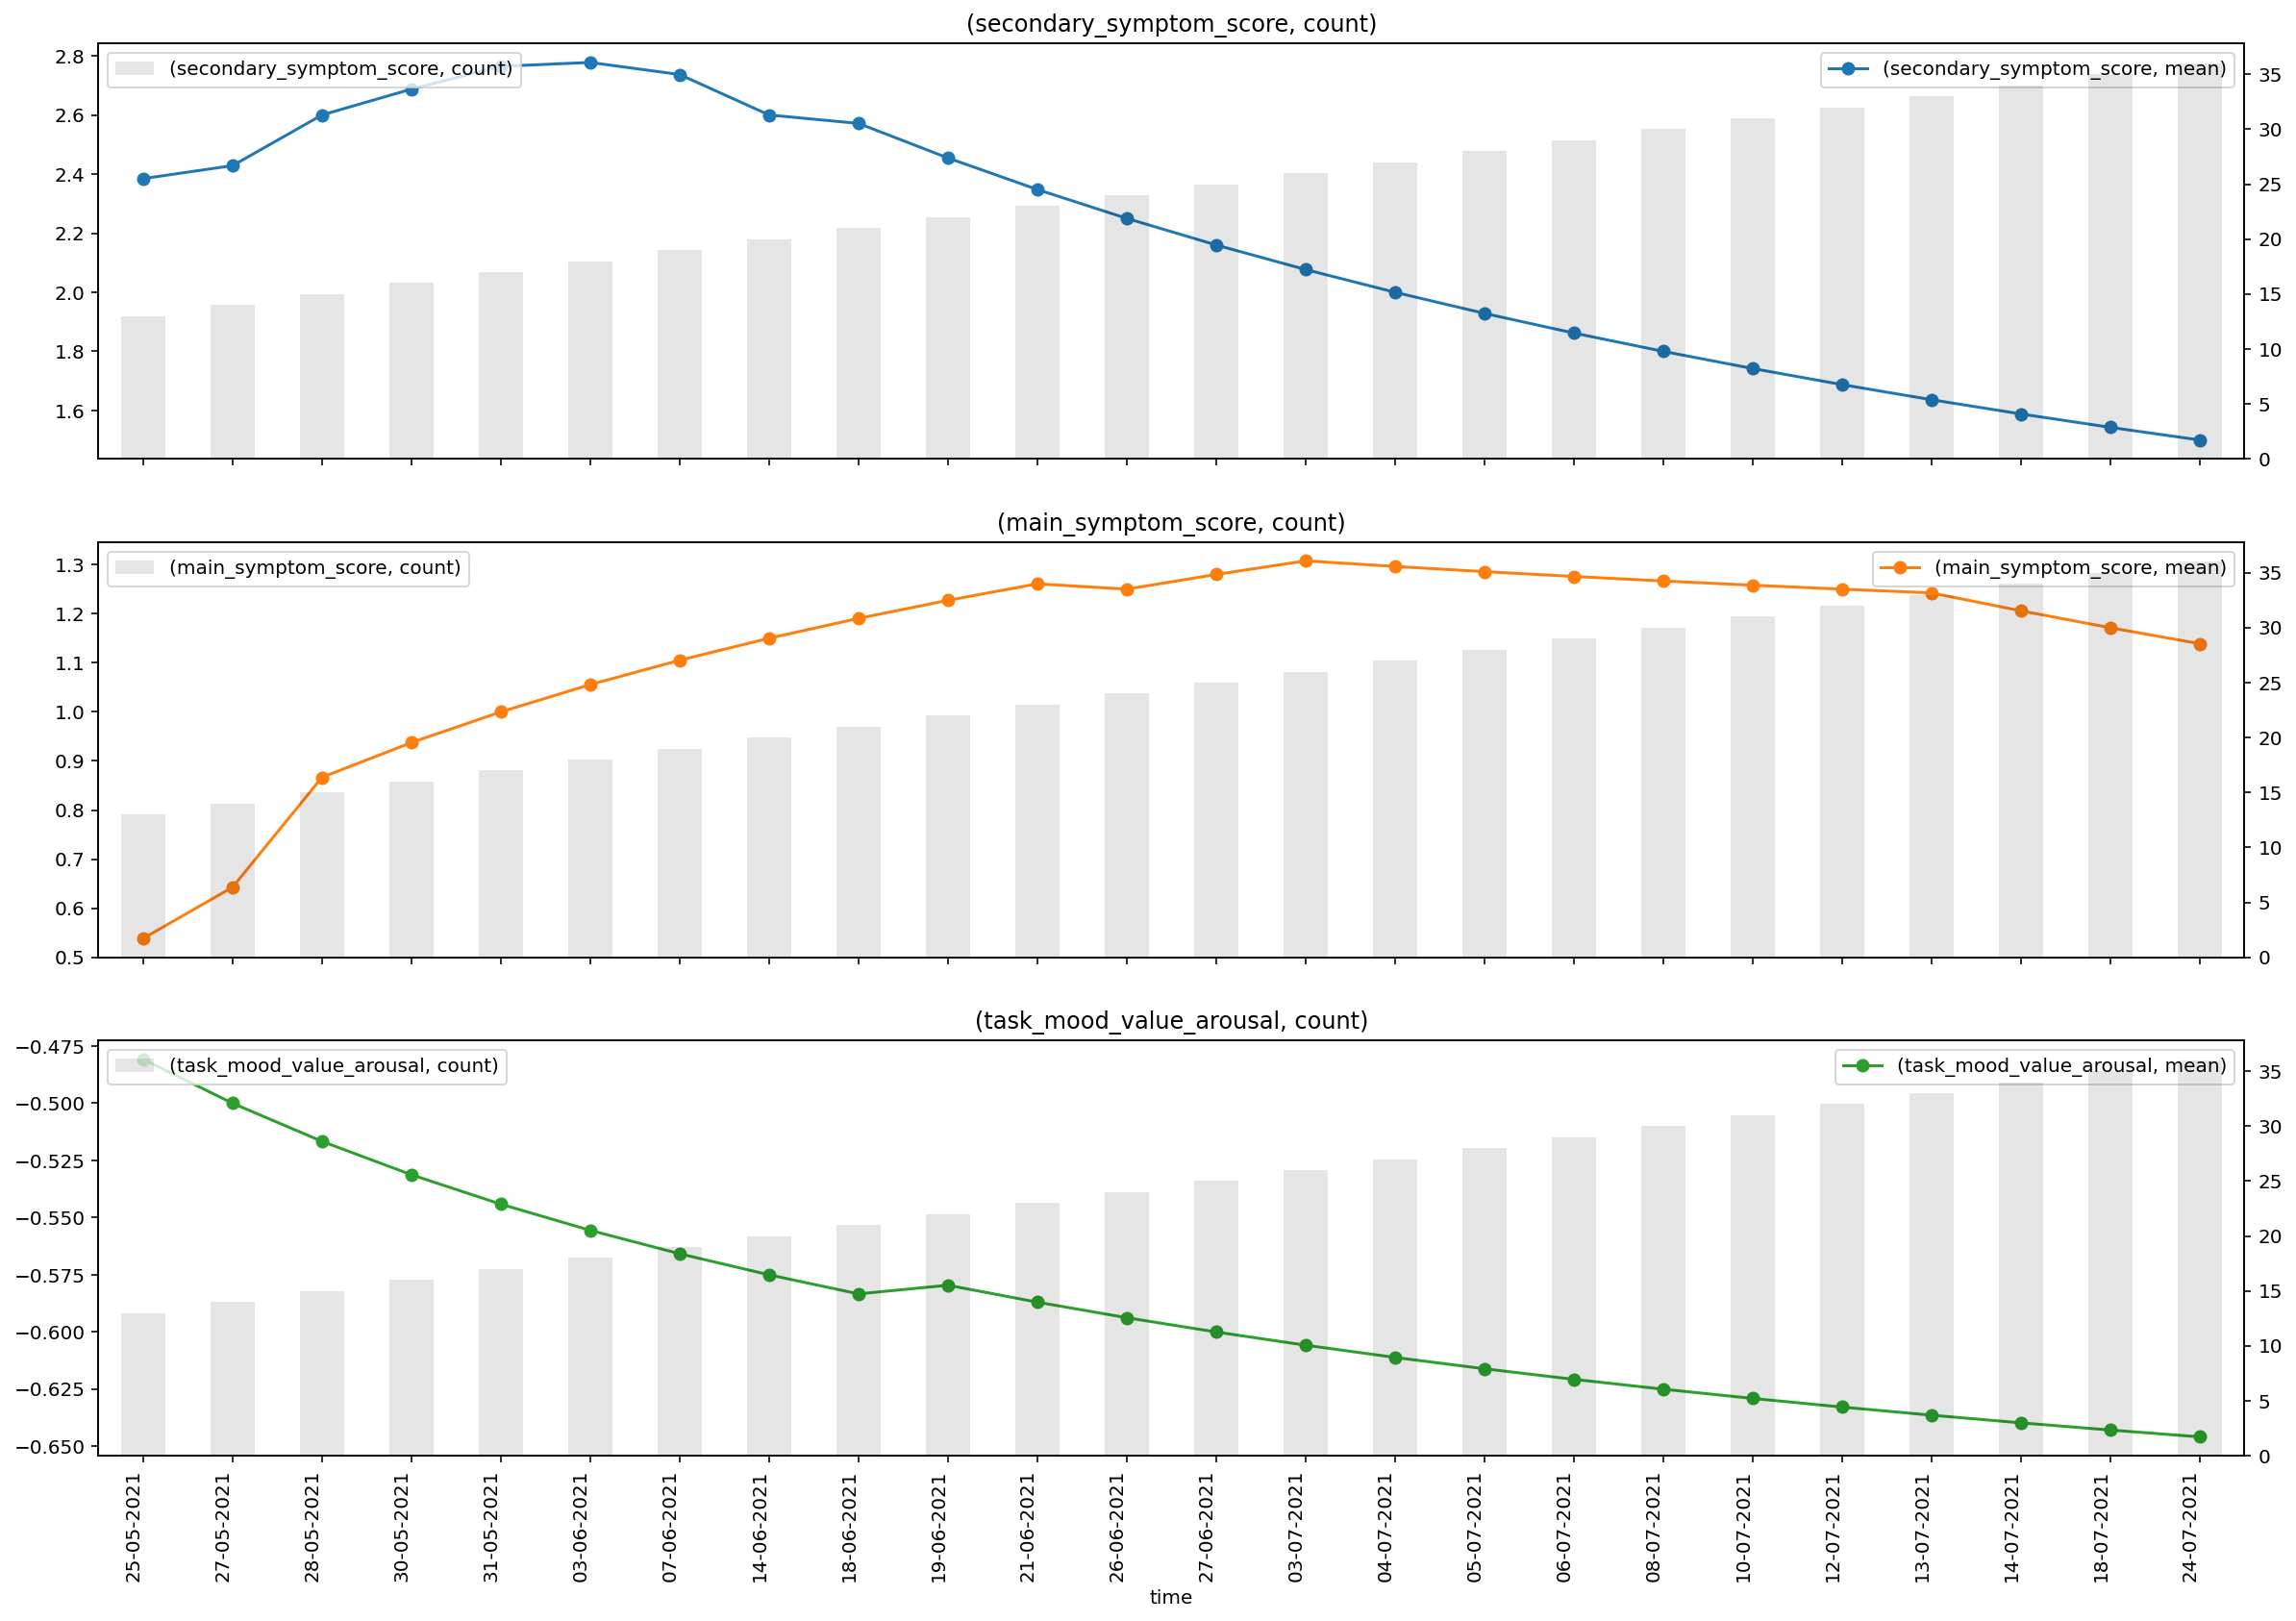

In [82]:
import matplotlib.pyplot as plt
metric_to_plot = 'mean'
df1 = symptoms_with_diag_window[symptoms_with_diag_window[('version','count')] > 12.0].loc['pcEsPFVyM0O22OdBYDEXccpYJ4H3', [('secondary_symptom_score', metric_to_plot), ('main_symptom_score', metric_to_plot), ('task_mood_value_arousal', metric_to_plot)]].sort_index()
df1['time'] = df1.index
df1['time'] = df1['time'].dt.strftime('%d-%m-%Y')
ax = df1.plot(x='time', subplots=True, figsize=(20,15), x_compat=True, style='-o', rot=90)

metric_to_plot_2 = 'count'
df2 = symptoms_with_diag_window[symptoms_with_diag_window[('version','count')] > 12.0].loc['pcEsPFVyM0O22OdBYDEXccpYJ4H3', [('secondary_symptom_score', metric_to_plot_2), ('main_symptom_score', metric_to_plot_2), ('task_mood_value_arousal', metric_to_plot_2)]].sort_index()
df2['time'] = df1.index
df2['time'] = df2['time'].dt.strftime('%d-%m-%Y')
df2.plot.bar(x='time', subplots=True, ax=ax, secondary_y=True, mark_right=False, color="k", alpha=0.1)


# std_col = 'std'
# std_df = symptoms_no_diag_window[symptoms_no_diag_window[('version','count')] > 10.0].loc['0NO8l0hUq1R5ptc0FBUIKDqdAco1', [('secondary_symptom_score', std_col), ('main_symptom_score', std_col), ('task_mood_value_arousal', std_col)]].sort_index()

# std_df_lower = df1

# std_df_lower['secondary_symptom_score_lower'] = df1[('secondary_symptom_score', metric_to_plot)] - std_df[('secondary_symptom_score', std_col)]
# std_df_lower['main_symptom_score_lower'] = df1[('main_symptom_score', metric_to_plot)] - std_df[('main_symptom_score', std_col)]
# std_df_lower['task_mood_value_arousal_lower'] = df1[('task_mood_value_arousal', metric_to_plot)] - std_df[('task_mood_value_arousal', std_col)]

# std_df_upper = df1


# std_df_upper['secondary_symptom_score_upper'] = std_df_upper[('secondary_symptom_score', metric_to_plot)] + std_df[('secondary_symptom_score', std_col)]
# std_df_upper['main_symptom_score_upper'] = std_df_upper[('main_symptom_score', metric_to_plot)] + std_df[('main_symptom_score', std_col)]
# std_df_upper['task_mood_value_arousal_upper'] = std_df_upper[('task_mood_value_arousal', metric_to_plot)] + std_df[('task_mood_value_arousal', std_col)]

# print(type(ax[0]))
# ax[0].fill_between(df1['time'], std_df_lower['secondary_symptom_score_lower'], std_df_upper['secondary_symptom_score_upper'], alpha=0.15)
# ax[1].fill_between(df1['time'], std_df_lower['main_symptom_score_lower'], std_df_upper['main_symptom_score_upper'], alpha=0.15)
# ax[2].fill_between(df1['time'], std_df_lower['task_mood_value_arousal_lower'], std_df_upper['task_mood_value_arousal_upper'], alpha=0.15)
# plt.show()

In [83]:
diagnosis_filtered[diagnosis_filtered['id'] == 'pcEsPFVyM0O22OdBYDEXccpYJ4H3']

,Unnamed: 0,pid,version,name,time_scheduled,time_received,time,time_start,id,task_who_time_start,...,task_who_value,task_how_time_start,task_how_time_end,task_how_value,task_date_diagnosed_time_start,task_date_diagnosed_time_end,task_date_diagnosed_value,task_date_illness_time_start,task_date_illness_time_end,task_date_illness_value
time,,,,,,,,,,,,,,,,,,,,,
2021-05-28 22:40:01.953000+00:00,2642,diagnosis,2,Covid Diagnosis,NaN,2021-05-28 22:40:02.558000+00:00,2021-05-28 22:40:01.953000+00:00,2021-05-28 22:39:32.749000+00:00,pcEsPFVyM0O22OdBYDEXccpYJ4H3,NaN,...,0.0,2021-05-28 22:39:35.973000+00:00,2021-05-28 22:39:39.651000+00:00,0.0,2021-05-28 22:39:39.651000+00:00,2021-05-28 22:39:55.963000+00:00,2021-05-24 23:00:00+00:00,2021-05-28 22:39:55.963000+00:00,2021-05-28 22:40:01.953000+00:00,2021-05-19 23:00:00+00:00
2021-06-03 22:55:27.149000+00:00,2643,diagnosis,2,Covid Diagnosis,NaN,2021-06-03 22:55:27.616000+00:00,2021-06-03 22:55:27.149000+00:00,2021-06-03 22:54:50.906000+00:00,pcEsPFVyM0O22OdBYDEXccpYJ4H3,NaN,...,0.0,2021-06-03 22:55:00.521000+00:00,2021-06-03 22:55:04.514000+00:00,0.0,2021-06-03 22:55:04.514000+00:00,2021-06-03 22:55:19.579000+00:00,2021-05-24 23:00:00+00:00,2021-06-03 22:55:19.579000+00:00,2021-06-03 22:55:27.149000+00:00,2021-05-19 23:00:00+00:00


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

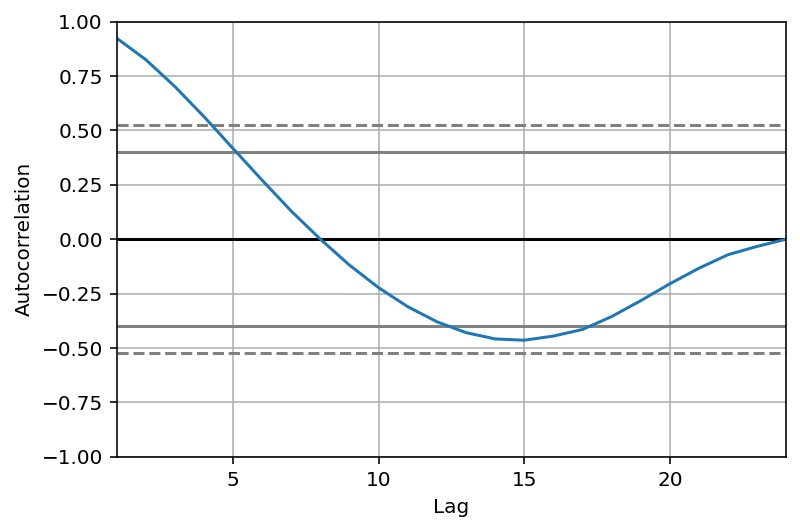

In [84]:
pd.plotting.autocorrelation_plot(df1[('secondary_symptom_score', metric_to_plot)])

In [89]:
# Unique users with symptoms for more than 12 days in a 84 day window (based on anwsering once every week) and uniformly distributed over time
id_symp_diag = symptoms_with_diag_window[(symptoms_with_diag_window[('version','count')] >= 12.0) & (symptoms_with_diag_window['ks_pvalue'] > 0.1) ].index.remove_unused_levels().levels[0].unique()
display(id_symp_diag)
len(id_symp_diag)

Index(['02KIBYpUG9QJ9yL0w7fU1oHUysu1', '02R0diCwLLR9agcvXyBsluR2GoW2',
       '0NYueclxhpVxzXhfAhpAUsR0H1C2', '1ZydIVsPZLODpePQyS2QC1tnhXX2',
       '1zkuBfW7XOTuwWC85dFACkRlcnC3', '24N0DS429CeGFy5p7Dg4JZ0zBGa2',
       '261LeuAIPpcYYlLL8y98wlpaA5m2', '2dlG7NV94CVYxczyyRrTuHsrVto1',
       '36MHKfifDXMF80ZSSelUQNSgaiB3', '3SzvFKZnWaMo6ZU25lr9fVjRrWP2',
       ...
       'uspKiQfNX8MeDcMeWwWTycsZ7jI2', 'vEyVBy3A8dRijWXqplSfdvZNvxz1',
       'wKJxpLVrJXVLe2GsK0jICe3FrPE3', 'wZDSEx7NZ7N2YGWadUMiT8Qu8eq2',
       'y3tpd5Z2ezObZX2FDkIYdEGNiCK2', 'y9qXJWDTJNQ33bq0y2TYHnAYpKw2',
       'yD5QOGx7b4Y6o4O9u1NqedOFD8y2', 'yM19ZnEXPVXgir0V04Jv3bC9X9v1',
       'zv7BUkCSS9eatY96QyEc1wKlqJE3', 'zxSQFV06pzSr3eOw5sZ5ETv2NaD2'],
      dtype='object', name='id', length=114)

114

In [92]:
# Get average duration of symptoms of the above ids - 
#    1. Take the maximum duration of the symptoms where symptoms were reported atleast once every week for 12 weeks (can also check the distribution is uniform using the pvalue calculated above).
#    2. Sort by time index and find the largest sequence of indices where the symptom count is greater than threshold. The minimum index and maximum index of this range will be the duration of sympmtoms for long covid.

symp_with_diag_duration_df = pd.DataFrame(index=['id'], 
                                        columns=['duration', 'range_min', 'range_max', 'avg_severity',
                                                 'avg_main_symptom_severity', 'avg_secondary_symptom_severity',
                                                 'avg_pvalue'])

threshold = 12.0

processed_df = symptoms_with_diag_window[symptoms_with_diag_window['ks_pvalue'] > 0.1]
processed_df = processed_df[processed_df[('version','count')] >= threshold]

# Since threshold is same as the filter used above we don't need to consider breaks in ranges where count can be lower than threshold.
# hence we can just chose the max and min values for the indices as range.
for i in id_symp_diag:
    tmp_df = processed_df.loc[i, [('total_symptom_score', 'mean'), ('total_symptom_score', 'count'), ('main_symptom_score', 'mean'), ('secondary_symptom_score', 'mean'), 'ks_pvalue']].sort_index()
    tmp_df.columns = ['total_symptom_score_mean', 'total_symptom_score_count', 'main_symptom_score_mean', 'secondary_symptom_score_mean', 'ks_pvalue']
    range_min = max(min(tmp_df.index) - pd.Timedelta(days=84), min(symptoms_with_diag_window.loc[i, :].index))
    symp_with_diag_duration_df.loc[i, ['duration', 'range_min', 'range_max', 'avg_severity', 'avg_main_symptom_severity', 'avg_secondary_symptom_severity', 'avg_pvalue']] =  [max(tmp_df.index)-range_min, range_min, max(tmp_df.index), tmp_df['total_symptom_score_mean'].mean(), tmp_df['main_symptom_score_mean'].mean(), tmp_df['secondary_symptom_score_mean'].mean(), tmp_df['ks_pvalue'].mean()]  #list(find_indices(tmp_df, threshold))

symp_with_diag_duration_df.drop('id', axis=0, inplace=True)
symp_with_diag_duration_df.head()

,duration,range_min,range_max,avg_severity,avg_main_symptom_severity,avg_secondary_symptom_severity,avg_pvalue
02KIBYpUG9QJ9yL0w7fU1oHUysu1,68 days 00:00:00,2021-01-14 00:00:00+00:00,2021-03-23 00:00:00+00:00,1.78971,1.78971,0,0.303369
02R0diCwLLR9agcvXyBsluR2GoW2,26 days 00:00:00,2021-07-10 00:00:00+00:00,2021-08-05 00:00:00+00:00,2.51923,2.51923,0,0.716952
0NYueclxhpVxzXhfAhpAUsR0H1C2,254 days 00:00:00,2020-11-23 00:00:00+00:00,2021-08-04 00:00:00+00:00,1.04812,1.04812,0,0.760326
1ZydIVsPZLODpePQyS2QC1tnhXX2,98 days 00:00:00,2020-12-26 00:00:00+00:00,2021-04-03 00:00:00+00:00,2.79244,2.68404,0.108402,0.745891
1zkuBfW7XOTuwWC85dFACkRlcnC3,88 days 00:00:00,2020-10-20 00:00:00+00:00,2021-01-16 00:00:00+00:00,1.66227,1.36172,0.300551,0.706366


In [93]:
symp_with_diag_duration_df['duration_d'] = symp_with_diag_duration_df['duration'] / np.timedelta64(1, 's') / 86400

In [94]:
symp_with_diag_duration_df.loc['0NYueclxhpVxzXhfAhpAUsR0H1C2', ['duration', 'avg_severity']]

duration        254 days 00:00:00
avg_severity              1.04812
Name: 0NYueclxhpVxzXhfAhpAUsR0H1C2, dtype: object

array([<AxesSubplot:title={'center':'duration_d'}>,
       <AxesSubplot:title={'center':'avg_severity'}>], dtype=object)

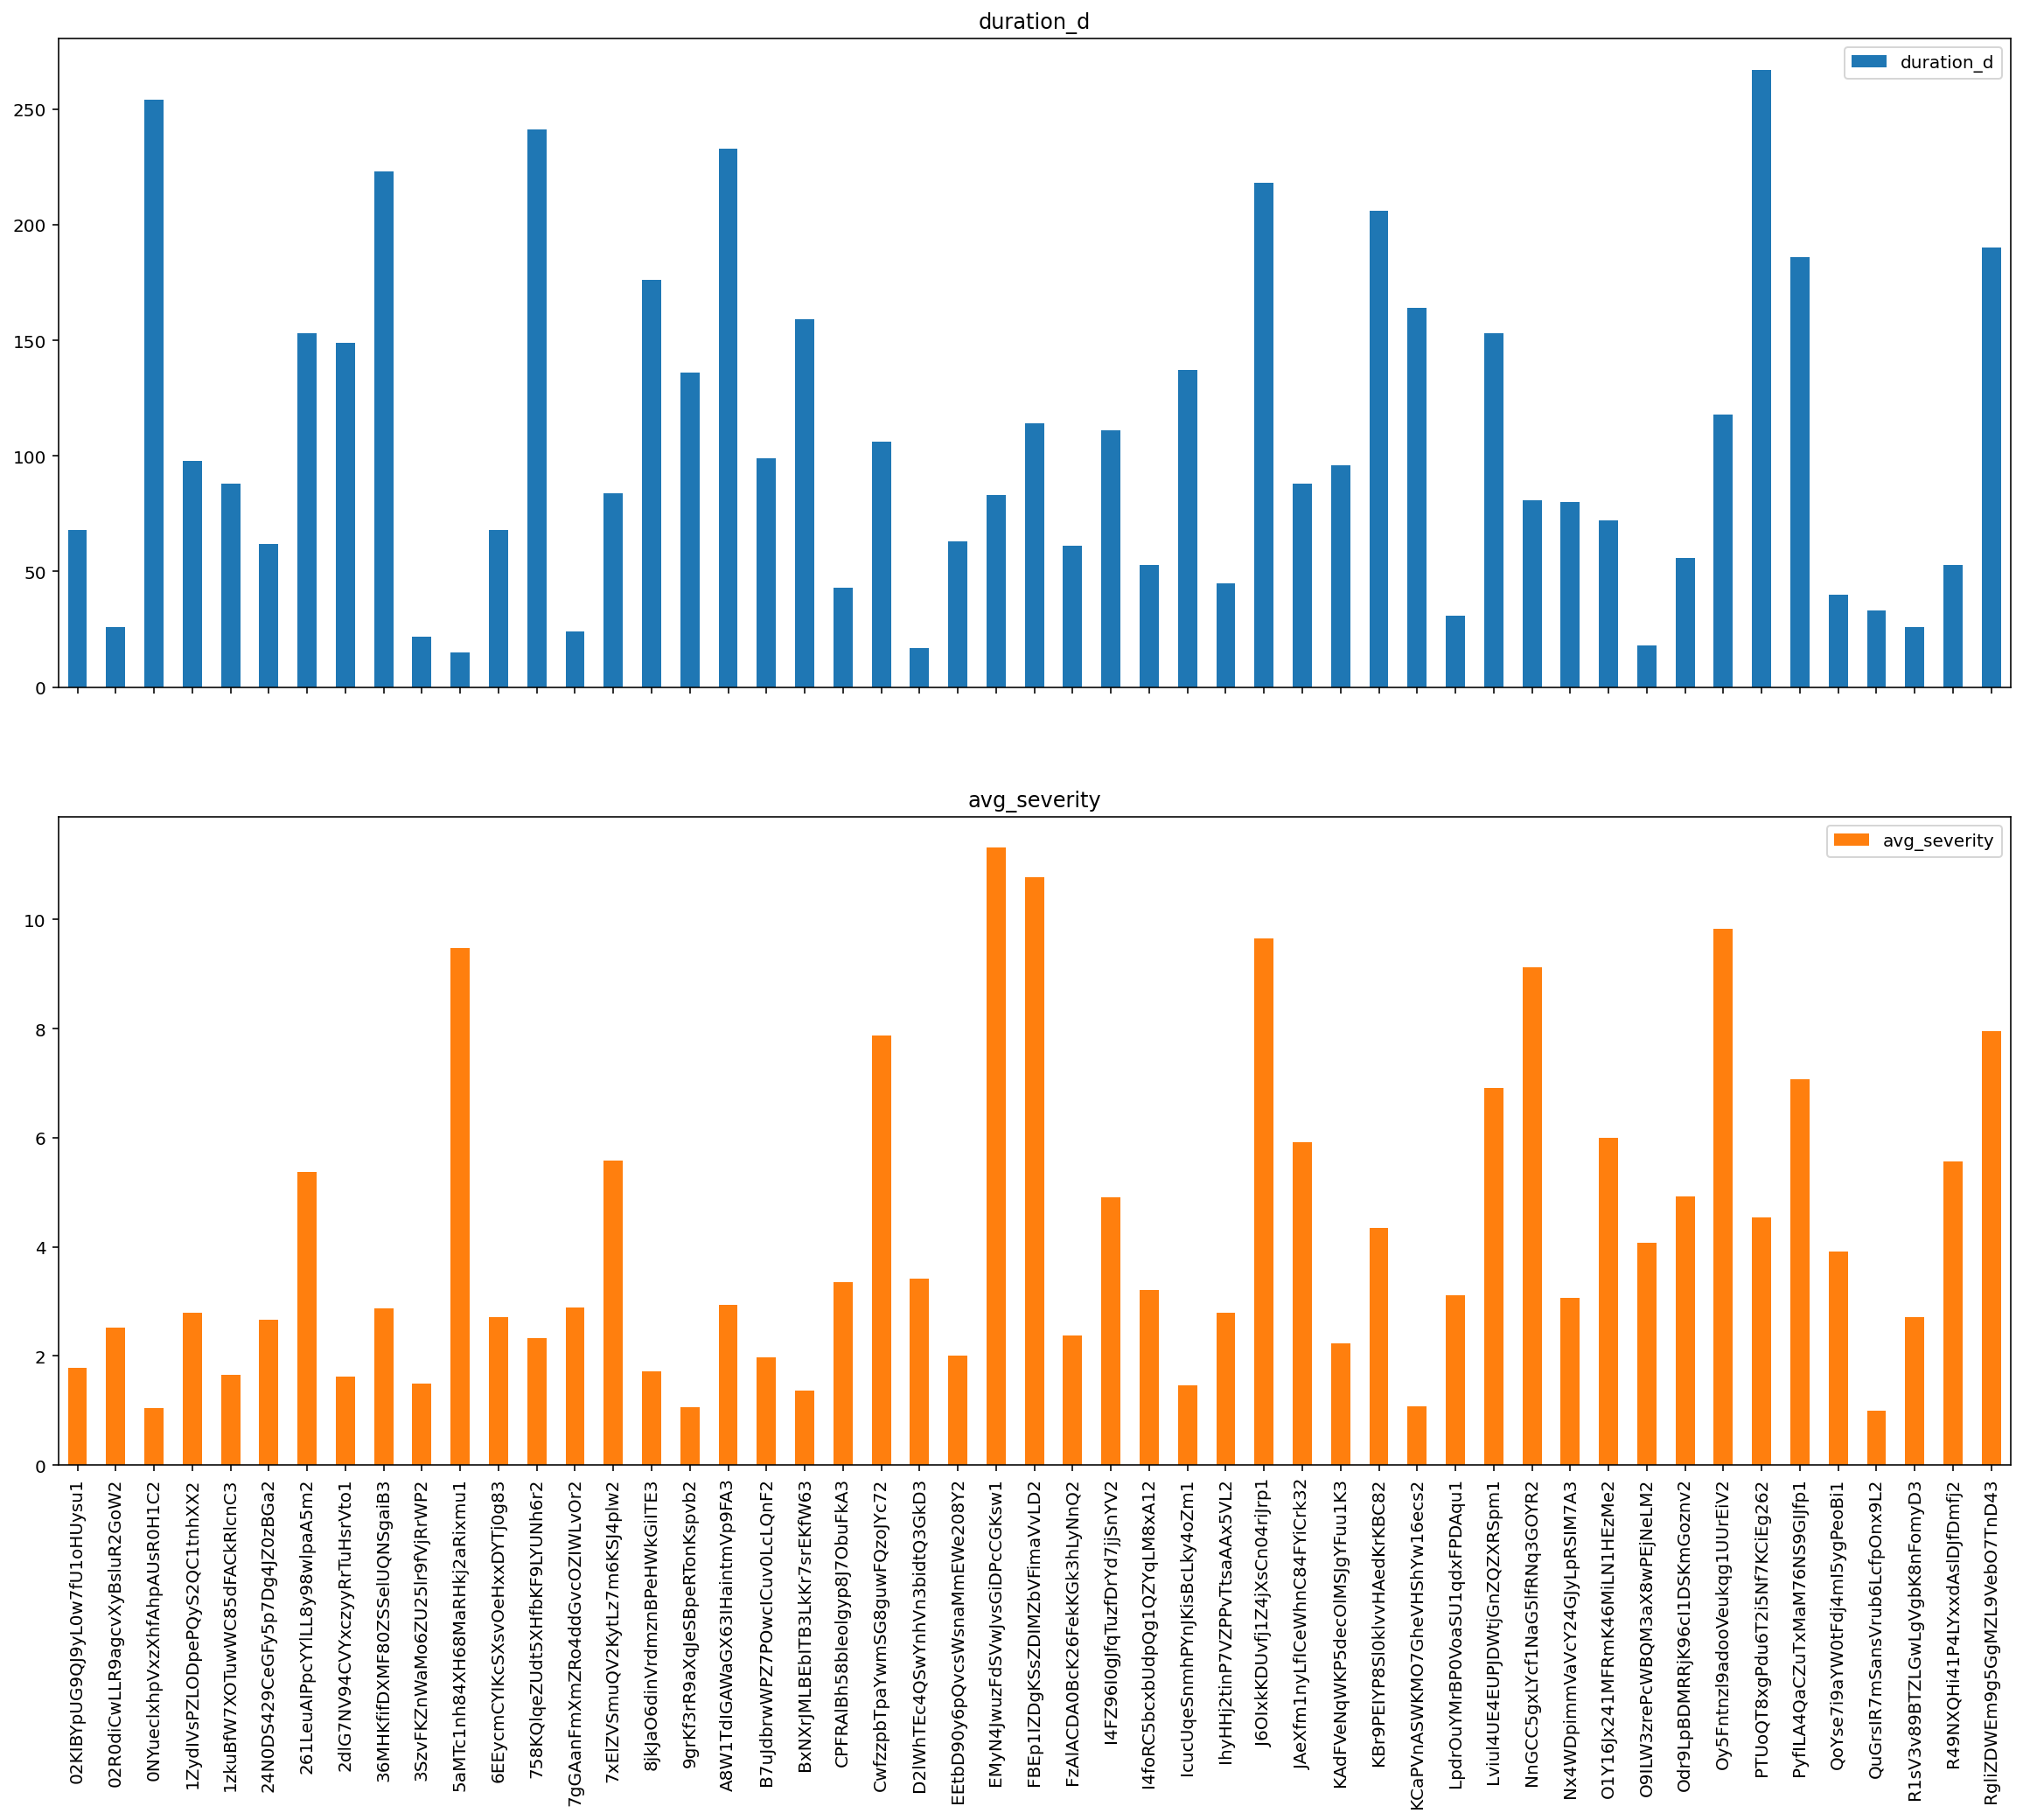

In [95]:
symp_with_diag_duration_df.loc[symp_with_diag_duration_df.index[0]:symp_with_diag_duration_df.index[50], ['duration_d', 'avg_severity']].plot.bar(subplots=True, figsize=(20,15))

duration_d         AxesSubplot(0.125,0.125;0.352273x0.755)
avg_severity    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

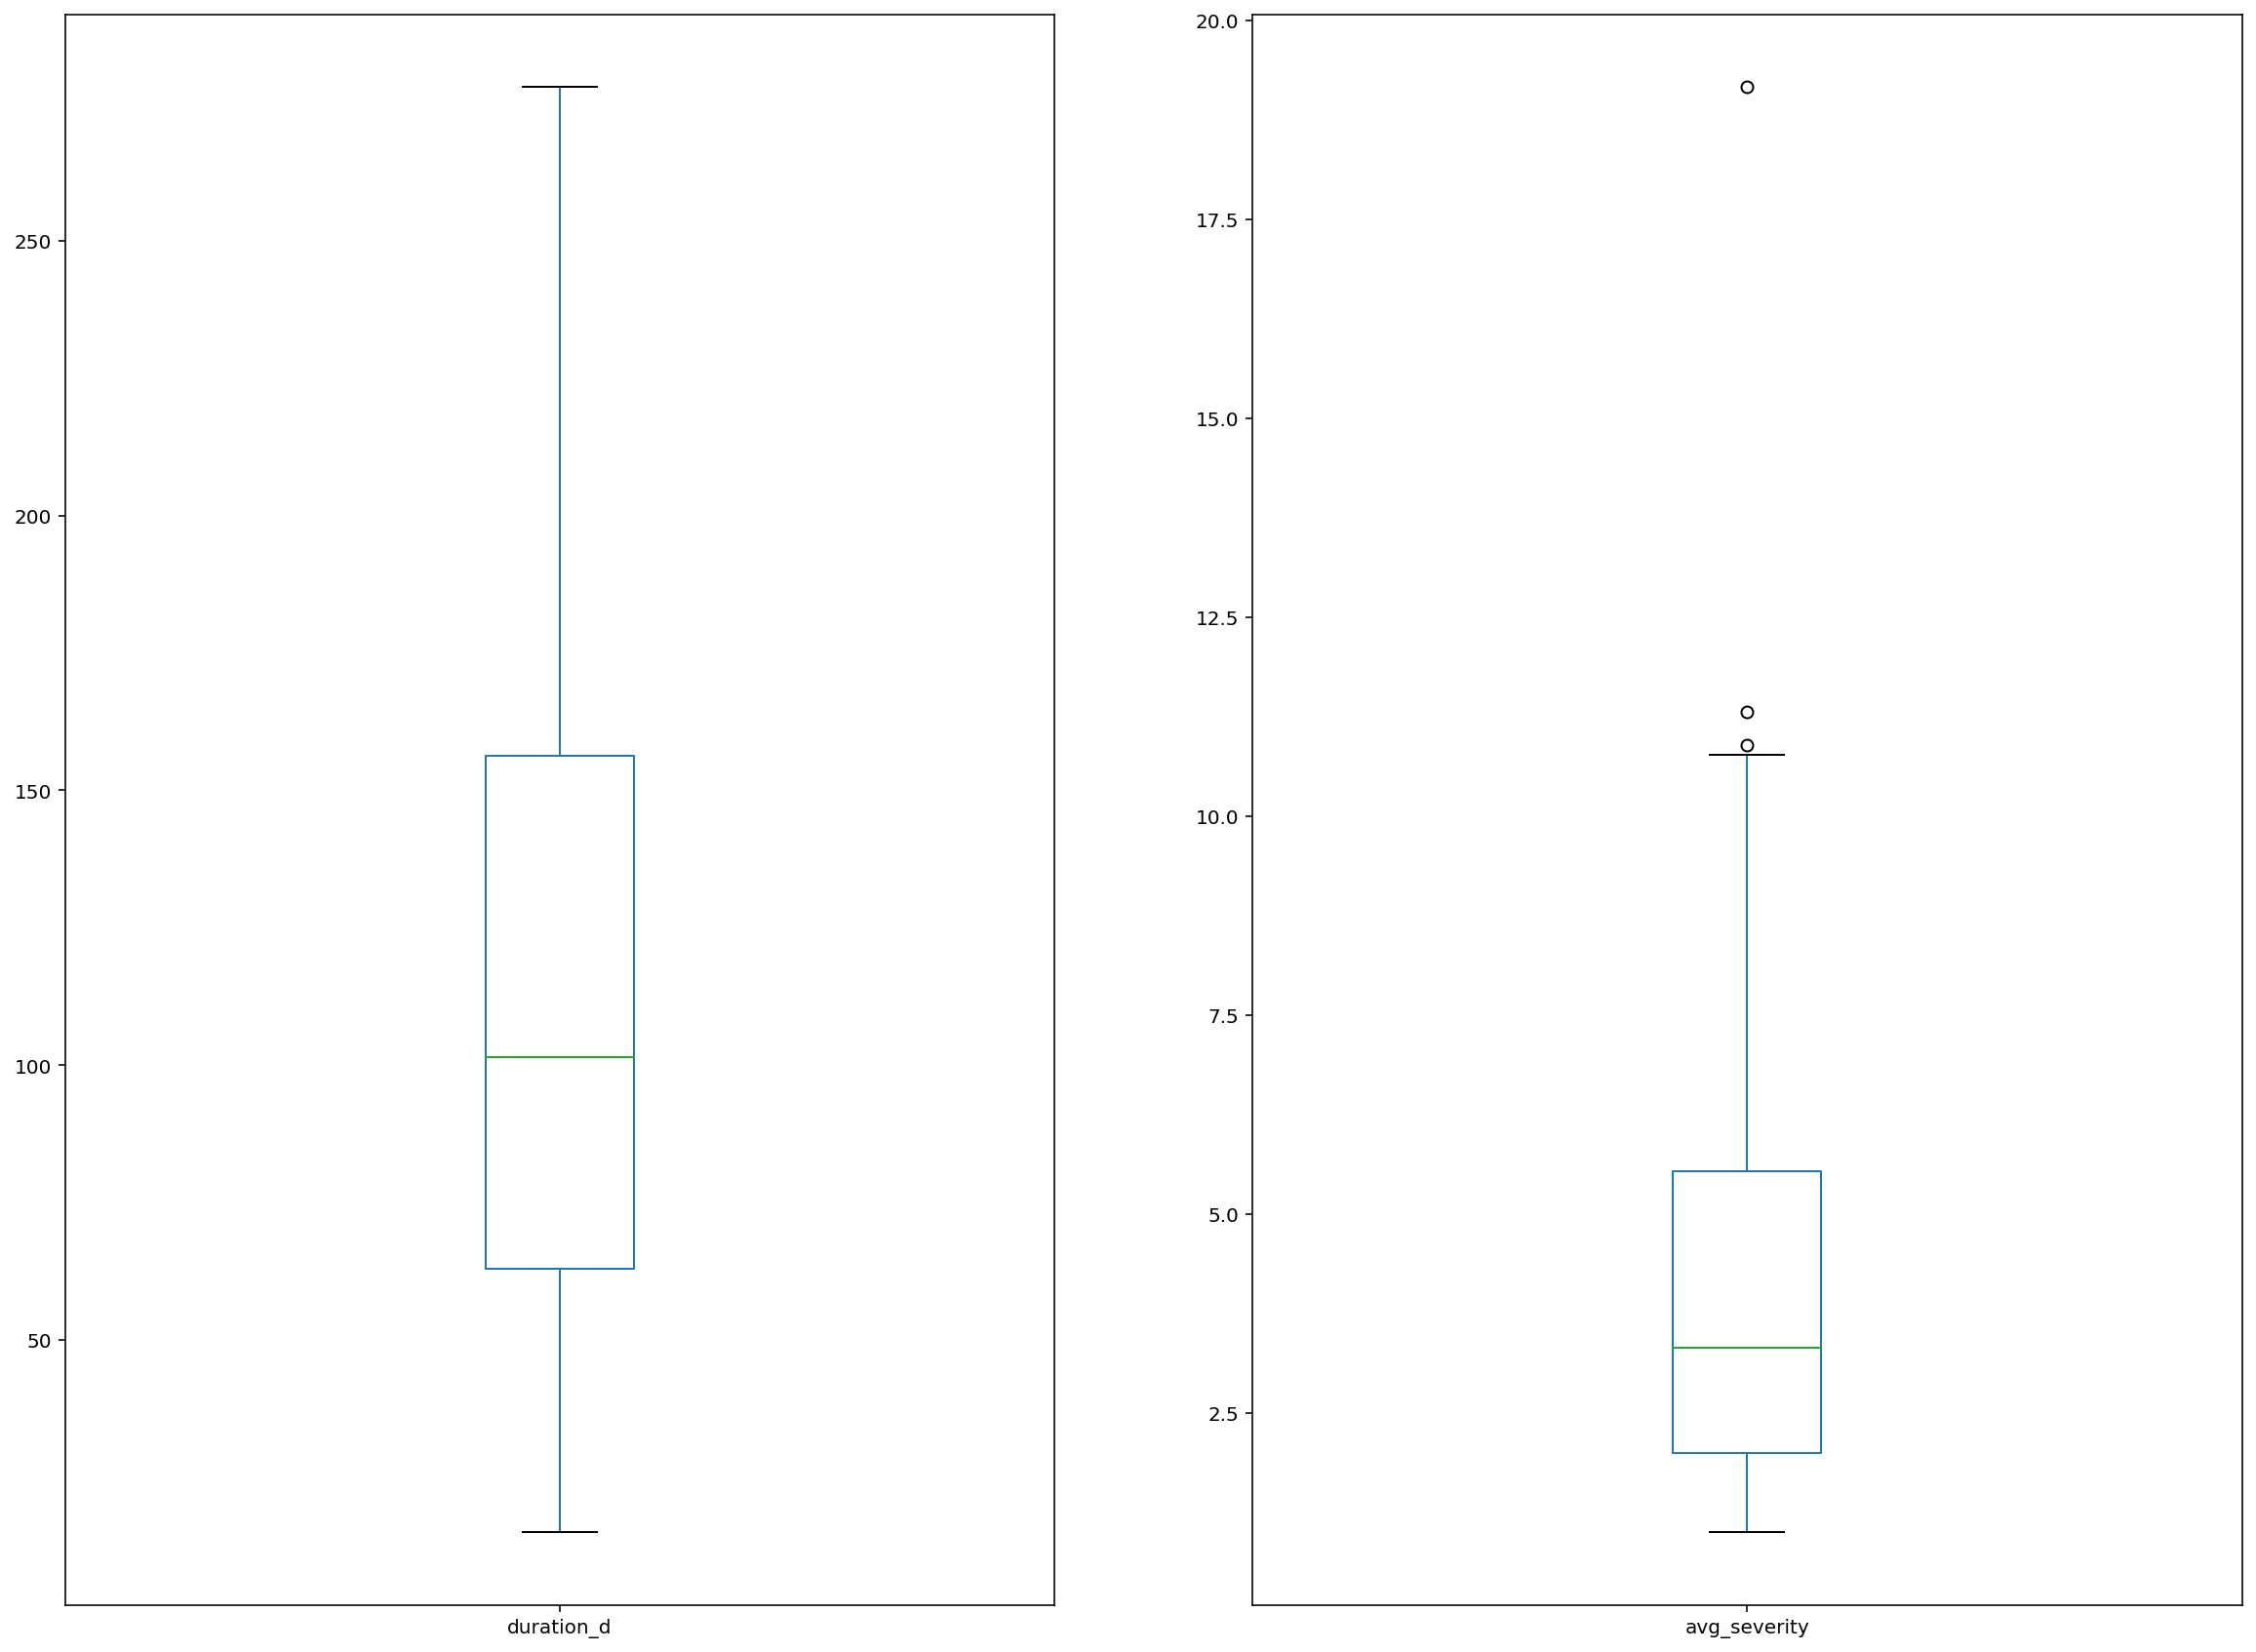

In [96]:
symp_with_diag_duration_df.loc[:, ['duration_d', 'avg_severity']].plot.box(subplots=True, figsize=(20,15))

In [ ]:
# create box plots for main, secondary, etc 

<AxesSubplot:>

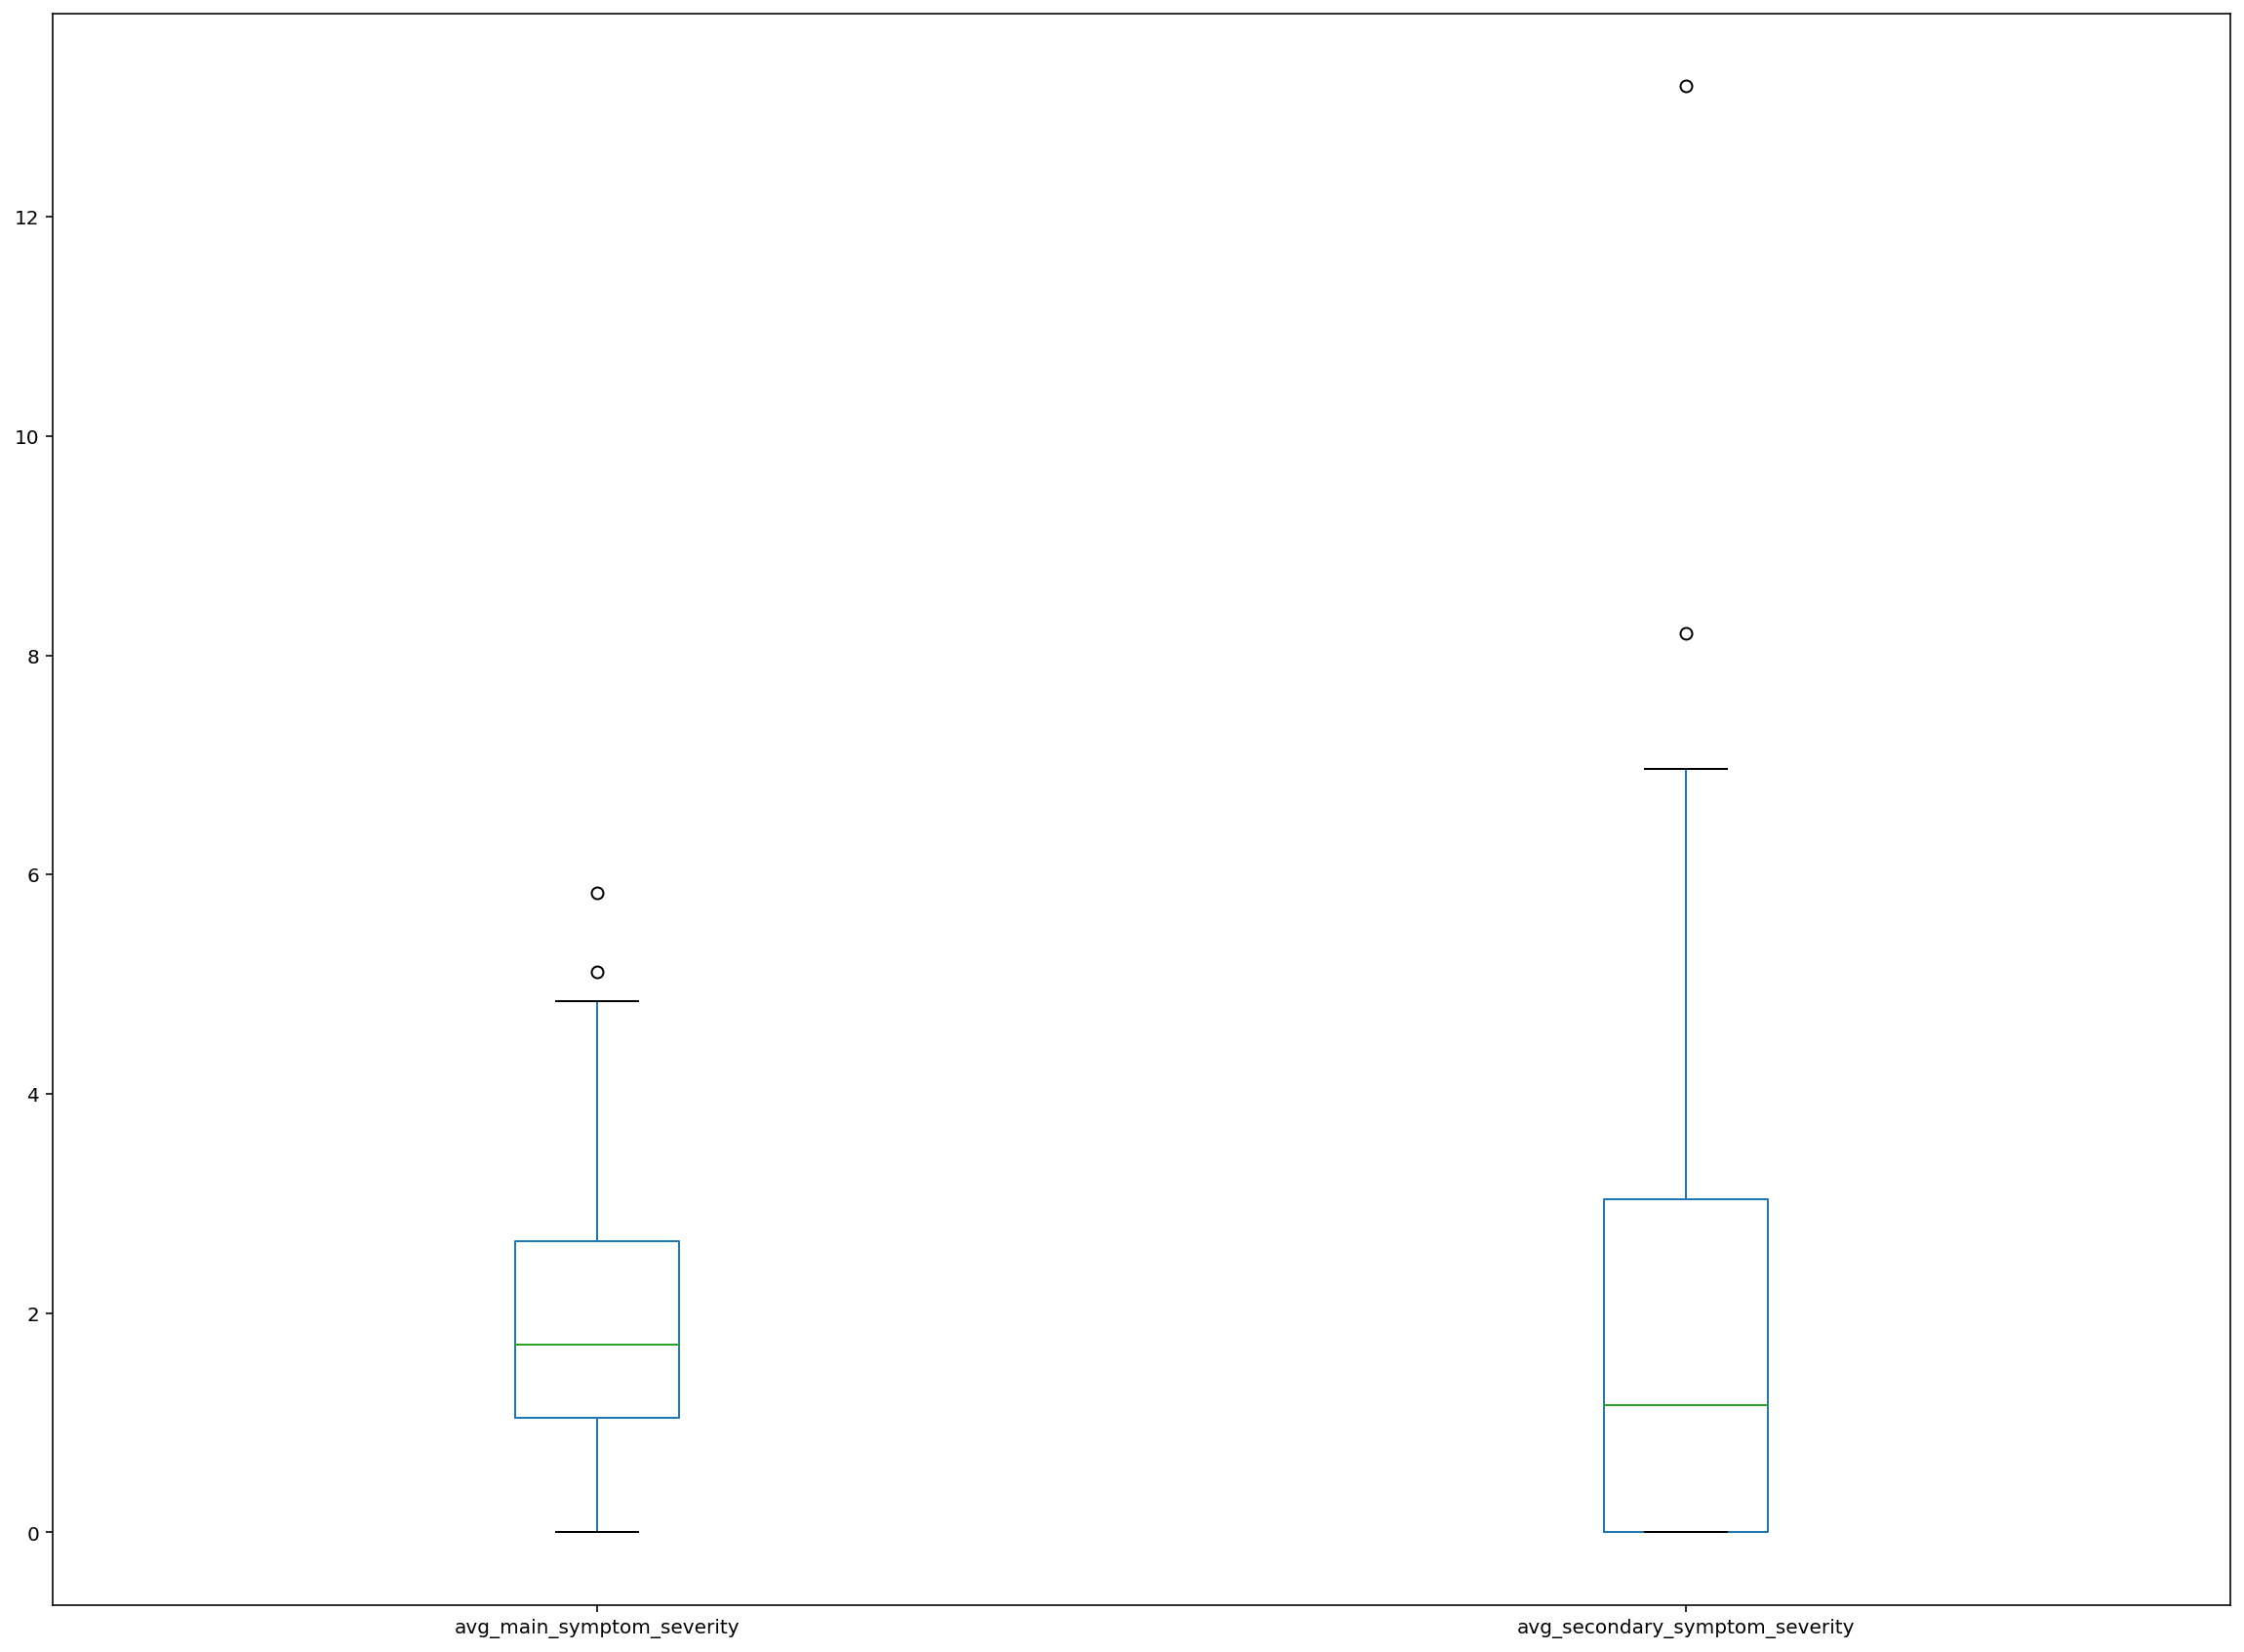

In [97]:
symp_with_diag_duration_df.loc[:, ['avg_main_symptom_severity', 'avg_secondary_symptom_severity']].plot.box(figsize=(20,15))

In [98]:
# box plots for all types of symptoms

li = []

for index, row in symp_with_diag_duration_df.iterrows():
    symptoms_with_diag_1d = symptoms_with_diag[symptoms_with_diag['id'] == index].groupby(['id', pd.Grouper(freq='1D')]).mean()
    symptoms_with_diag_1d = symptoms_with_diag_1d.loc[index, :].loc[row['range_min']:row['range_max'],
                                     main_symptom_cols + secondary_symptom_cols]
    symptoms_with_diag_1d['id'] = index
    
    symptoms_with_diag_1d = symptoms_with_diag_1d.groupby('id').mean()
    li.append(symptoms_with_diag_1d.copy())

    
df_temp = pd.concat(li)
df_temp.head()

,task_symptoms_value_Cough,task_symptoms_value_Difficulties breathing,task_symptoms_value_Fever,task_symptoms_value_Loss of sense of smell (anosmia),task_symptoms_value_Fatigue,task_symptoms_value_Muscle or joint pain,task_symptoms_value_Headache,task_symptoms_value_Nausea,task_symptoms_value_Congestion,task_symptoms_value_Chills,task_symptoms_value_Confusion
id,,,,,,,,,,,
02KIBYpUG9QJ9yL0w7fU1oHUysu1,0.388889,1.222222,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
02R0diCwLLR9agcvXyBsluR2GoW2,1.076923,0.000000,0.153846,1.307692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
0NYueclxhpVxzXhfAhpAUsR0H1C2,0.004902,1.014706,0.000000,0.014706,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1ZydIVsPZLODpePQyS2QC1tnhXX2,1.115942,0.057971,0.086957,0.753623,0.014493,0.000000,0.072464,0.028986,0.000000,0.028986,0.0
1zkuBfW7XOTuwWC85dFACkRlcnC3,0.138889,0.055556,0.027778,1.000000,0.055556,0.055556,0.055556,0.000000,0.027778,0.000000,0.0


In [99]:
df_temp.columns = [ c.replace('task_symptoms_value_', '') for c in df_temp.columns ]

Text(0.5, 1.0, 'Avg Severity of Symptoms')

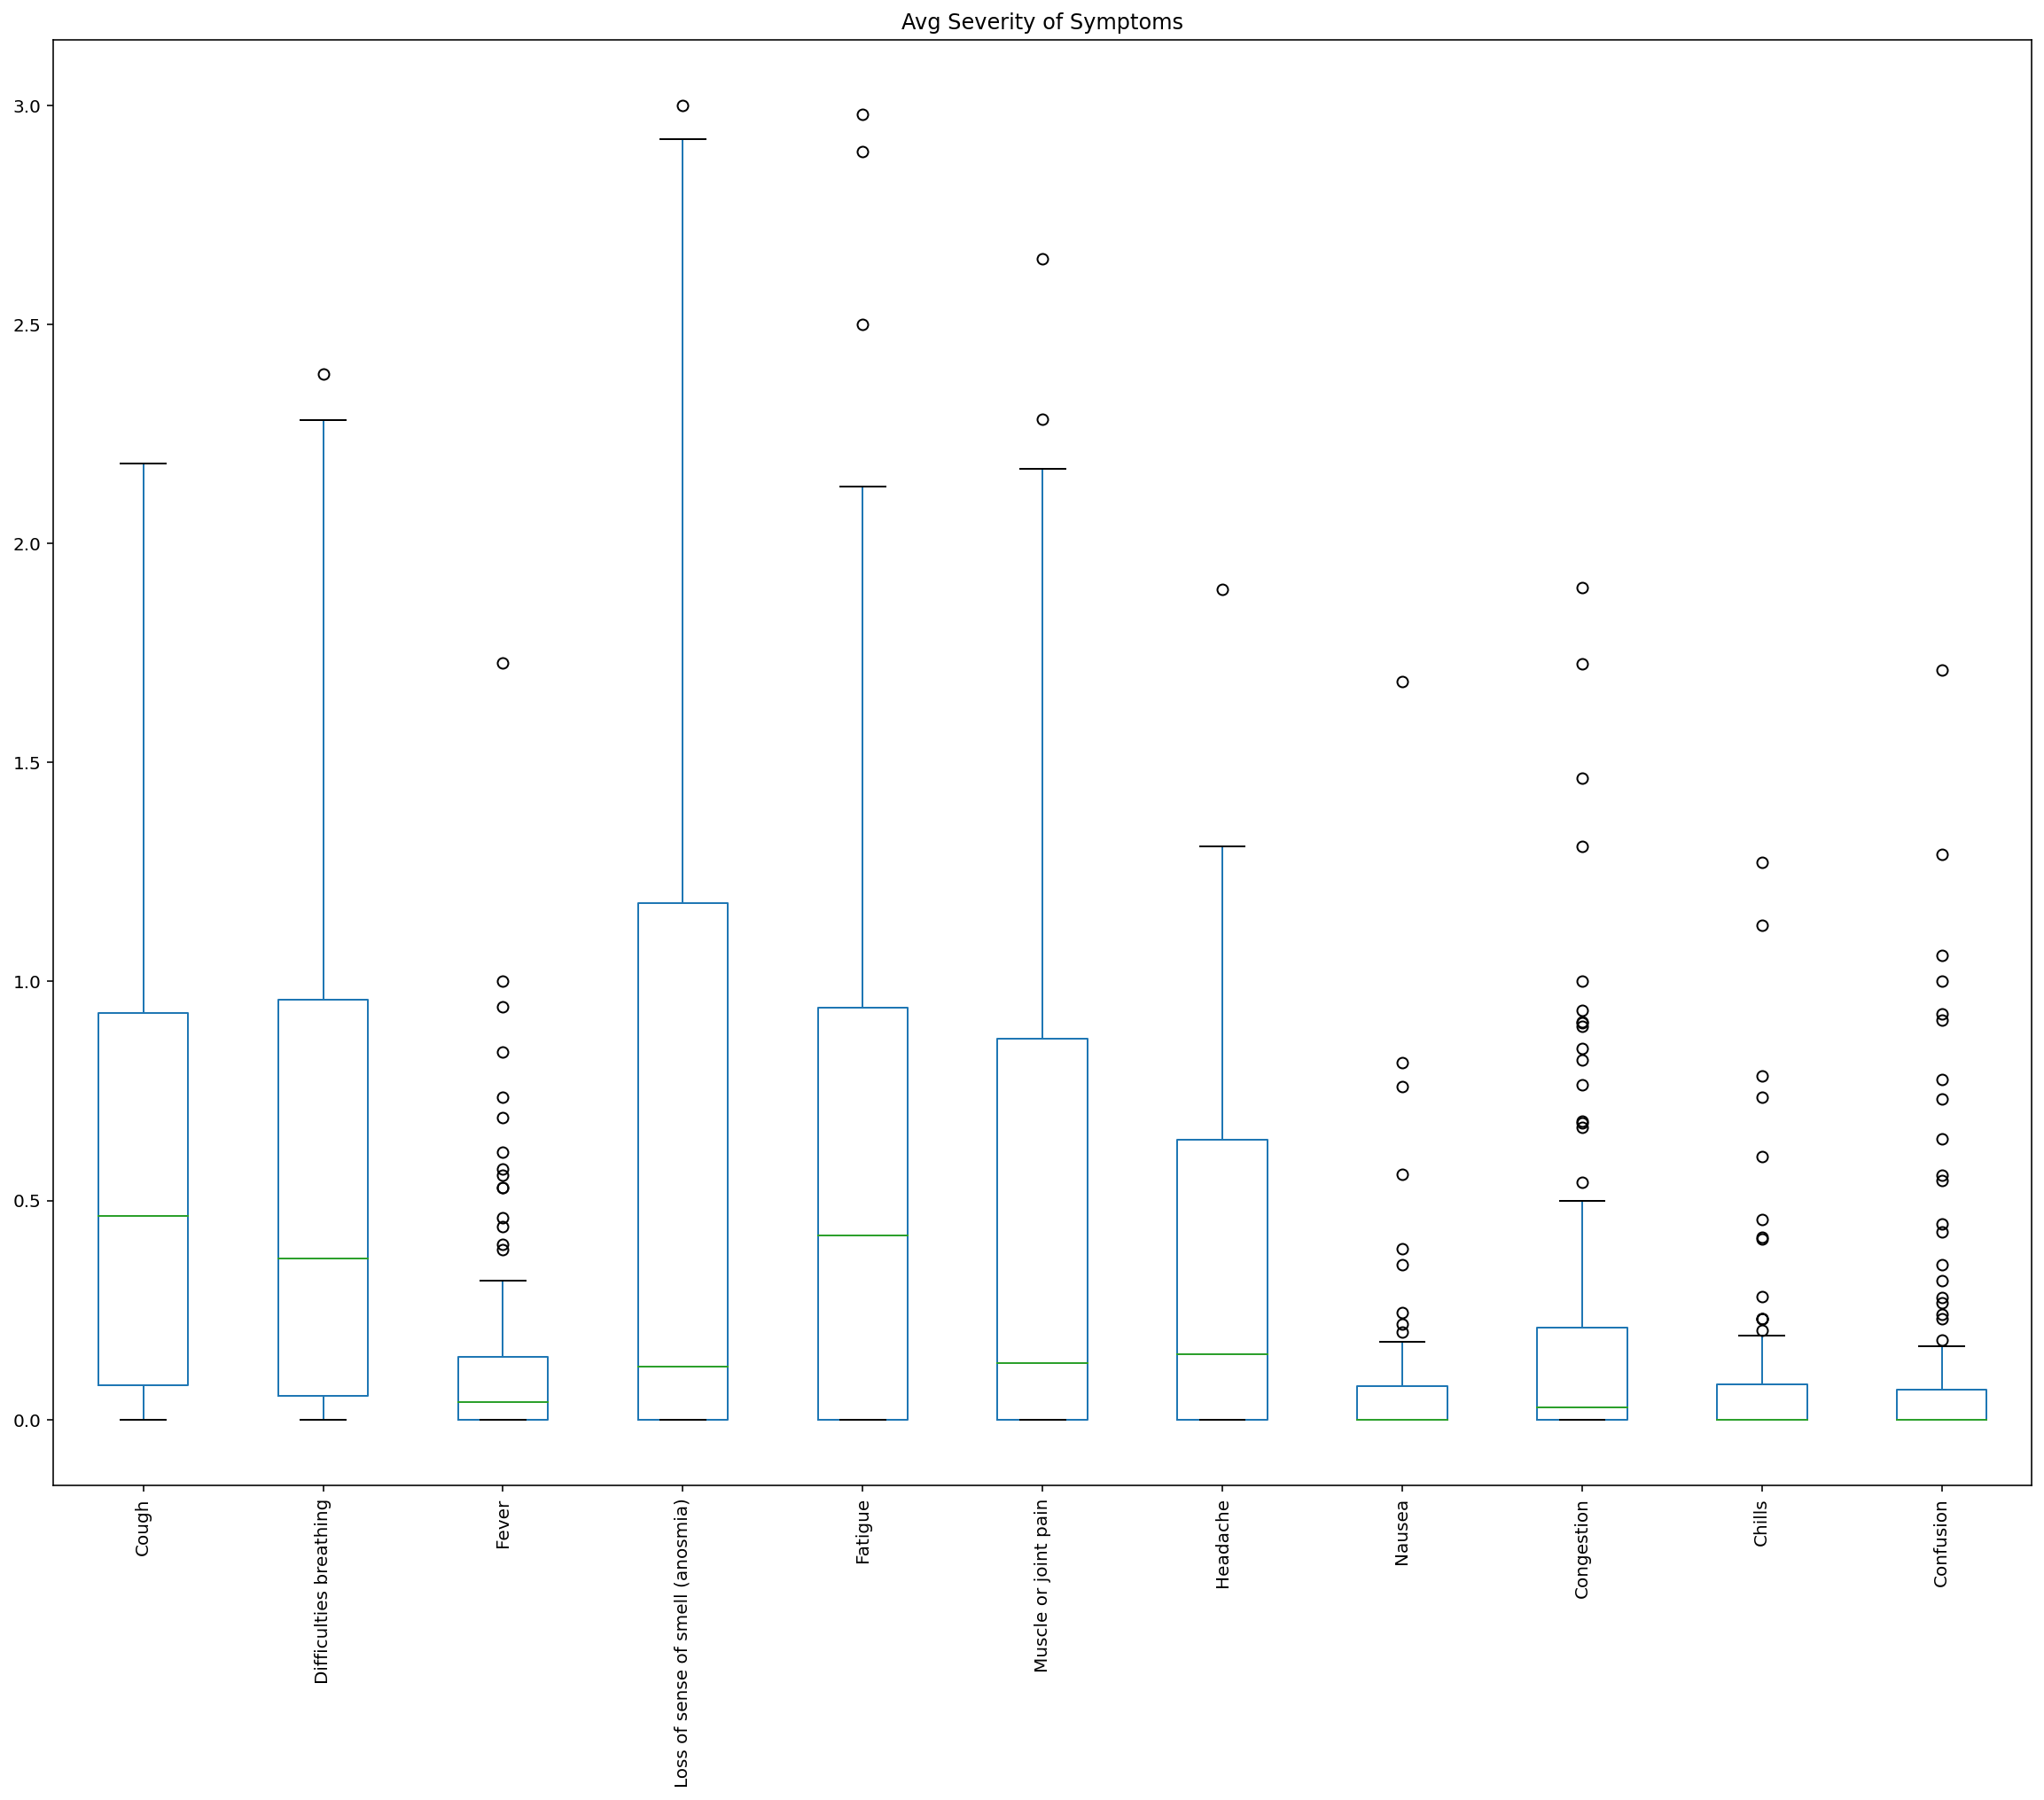

In [100]:
ax = df_temp.plot.box(figsize=(20,15), rot=90)
ax.set_title('Avg Severity of Symptoms')

### Plot Z-score around diagnosis dates for symptoms

In [ ]:
# Z score formula :    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)

# for col in cols:
#     col_zscore = col + '_zscore'
#     df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)

### See if can plot z-scores for the mHealth data too

## Create cohort 3: participant reporting no symptoms, with positive covid diagnosis (PCR)

## Create cohort 4:

# Avg symptoms for all users to see correlation with 3 waves from gov.uk data

In [ ]:
# Plot govt data

In [101]:
govt_data_df = pd.read_csv('data_2021-Aug-05.csv')

In [102]:
govt_data_df.head()

,areaType,areaName,areaCode,date,newCasesByPublishDate,cumCasesByPublishDate
0,overview,United Kingdom,K02000001,2021-08-05,30215,5982581
1,overview,United Kingdom,K02000001,2021-08-04,29312,5952756
2,overview,United Kingdom,K02000001,2021-08-03,21691,5923820
3,overview,United Kingdom,K02000001,2021-08-02,21952,5902354
4,overview,United Kingdom,K02000001,2021-08-01,24470,5880667


In [103]:
govt_data_df = govt_data_df.set_index(pd.to_datetime(govt_data_df['date'], infer_datetime_format=True)).sort_index()

<AxesSubplot:xlabel='date'>

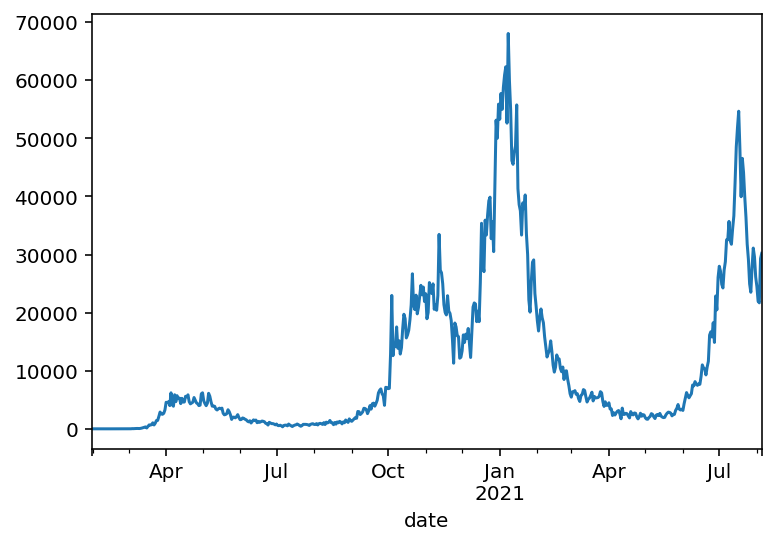

In [104]:
govt_data_df['newCasesByPublishDate'].plot()

In [105]:
govt_data_df['date'] = govt_data_df['date'].sort_values()

In [106]:
govt_data_df['7d_rolling_avg'] = govt_data_df['newCasesByPublishDate'].rolling('7D').mean()

In [107]:
govt_data_df = govt_data_df.loc['2020-04-02':,:]

In [ ]:
### Plot diagnosis on time

In [108]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
import matplotlib.ticker as ticker

In [109]:
diagnosis_monthly = diagnosis.groupby(pd.Grouper(freq="1D")).count()

In [110]:
diagnosis_monthly['time'] = diagnosis_monthly.index.strftime('%d-%m-%Y')

In [111]:
diagnosis_monthly['7d_rolling_avg'] = diagnosis_monthly['name'].rolling('7D').mean()

In [ ]:
# KS test for diagnosis and govt data

In [112]:
from scipy.stats import ks_2samp

In [113]:
ks_res = ks_2samp(govt_data_df.loc['2020-10-01':'2021-04-12','7d_rolling_avg'].resample('M').mean(), diagnosis_monthly.loc['2020-10-01':'2021-04-12','7d_rolling_avg'].resample('M').mean())

In [114]:
ks_res # Not good :( --  Because neither are uniform

KstestResult(statistic=1.0, pvalue=0.0005827505827505828)

In [115]:
diagnosis_monthly_no_tz = diagnosis_monthly.copy()
diagnosis_monthly_no_tz.index = diagnosis_monthly_no_tz.index.tz_convert(None)

In [116]:
govt_data_df['7d_rolling_avg_govt'] = govt_data_df['7d_rolling_avg']

In [146]:
combined_df = pd.concat([diagnosis_monthly_no_tz, govt_data_df[['7d_rolling_avg_govt', 'newCasesByPublishDate']]], axis=1)

array([<AxesSubplot:title={'center':'name'}, xlabel='time'>,
       <AxesSubplot:title={'center':'newCasesByPublishDate'}, xlabel='time'>],
      dtype=object)

Text(0.5, 1.0, 'Confirmed cases reported from Covid Collab data (can be non-UK)')

Text(0.5, 1.0, 'UK confirmed cases reported from Govt. data')

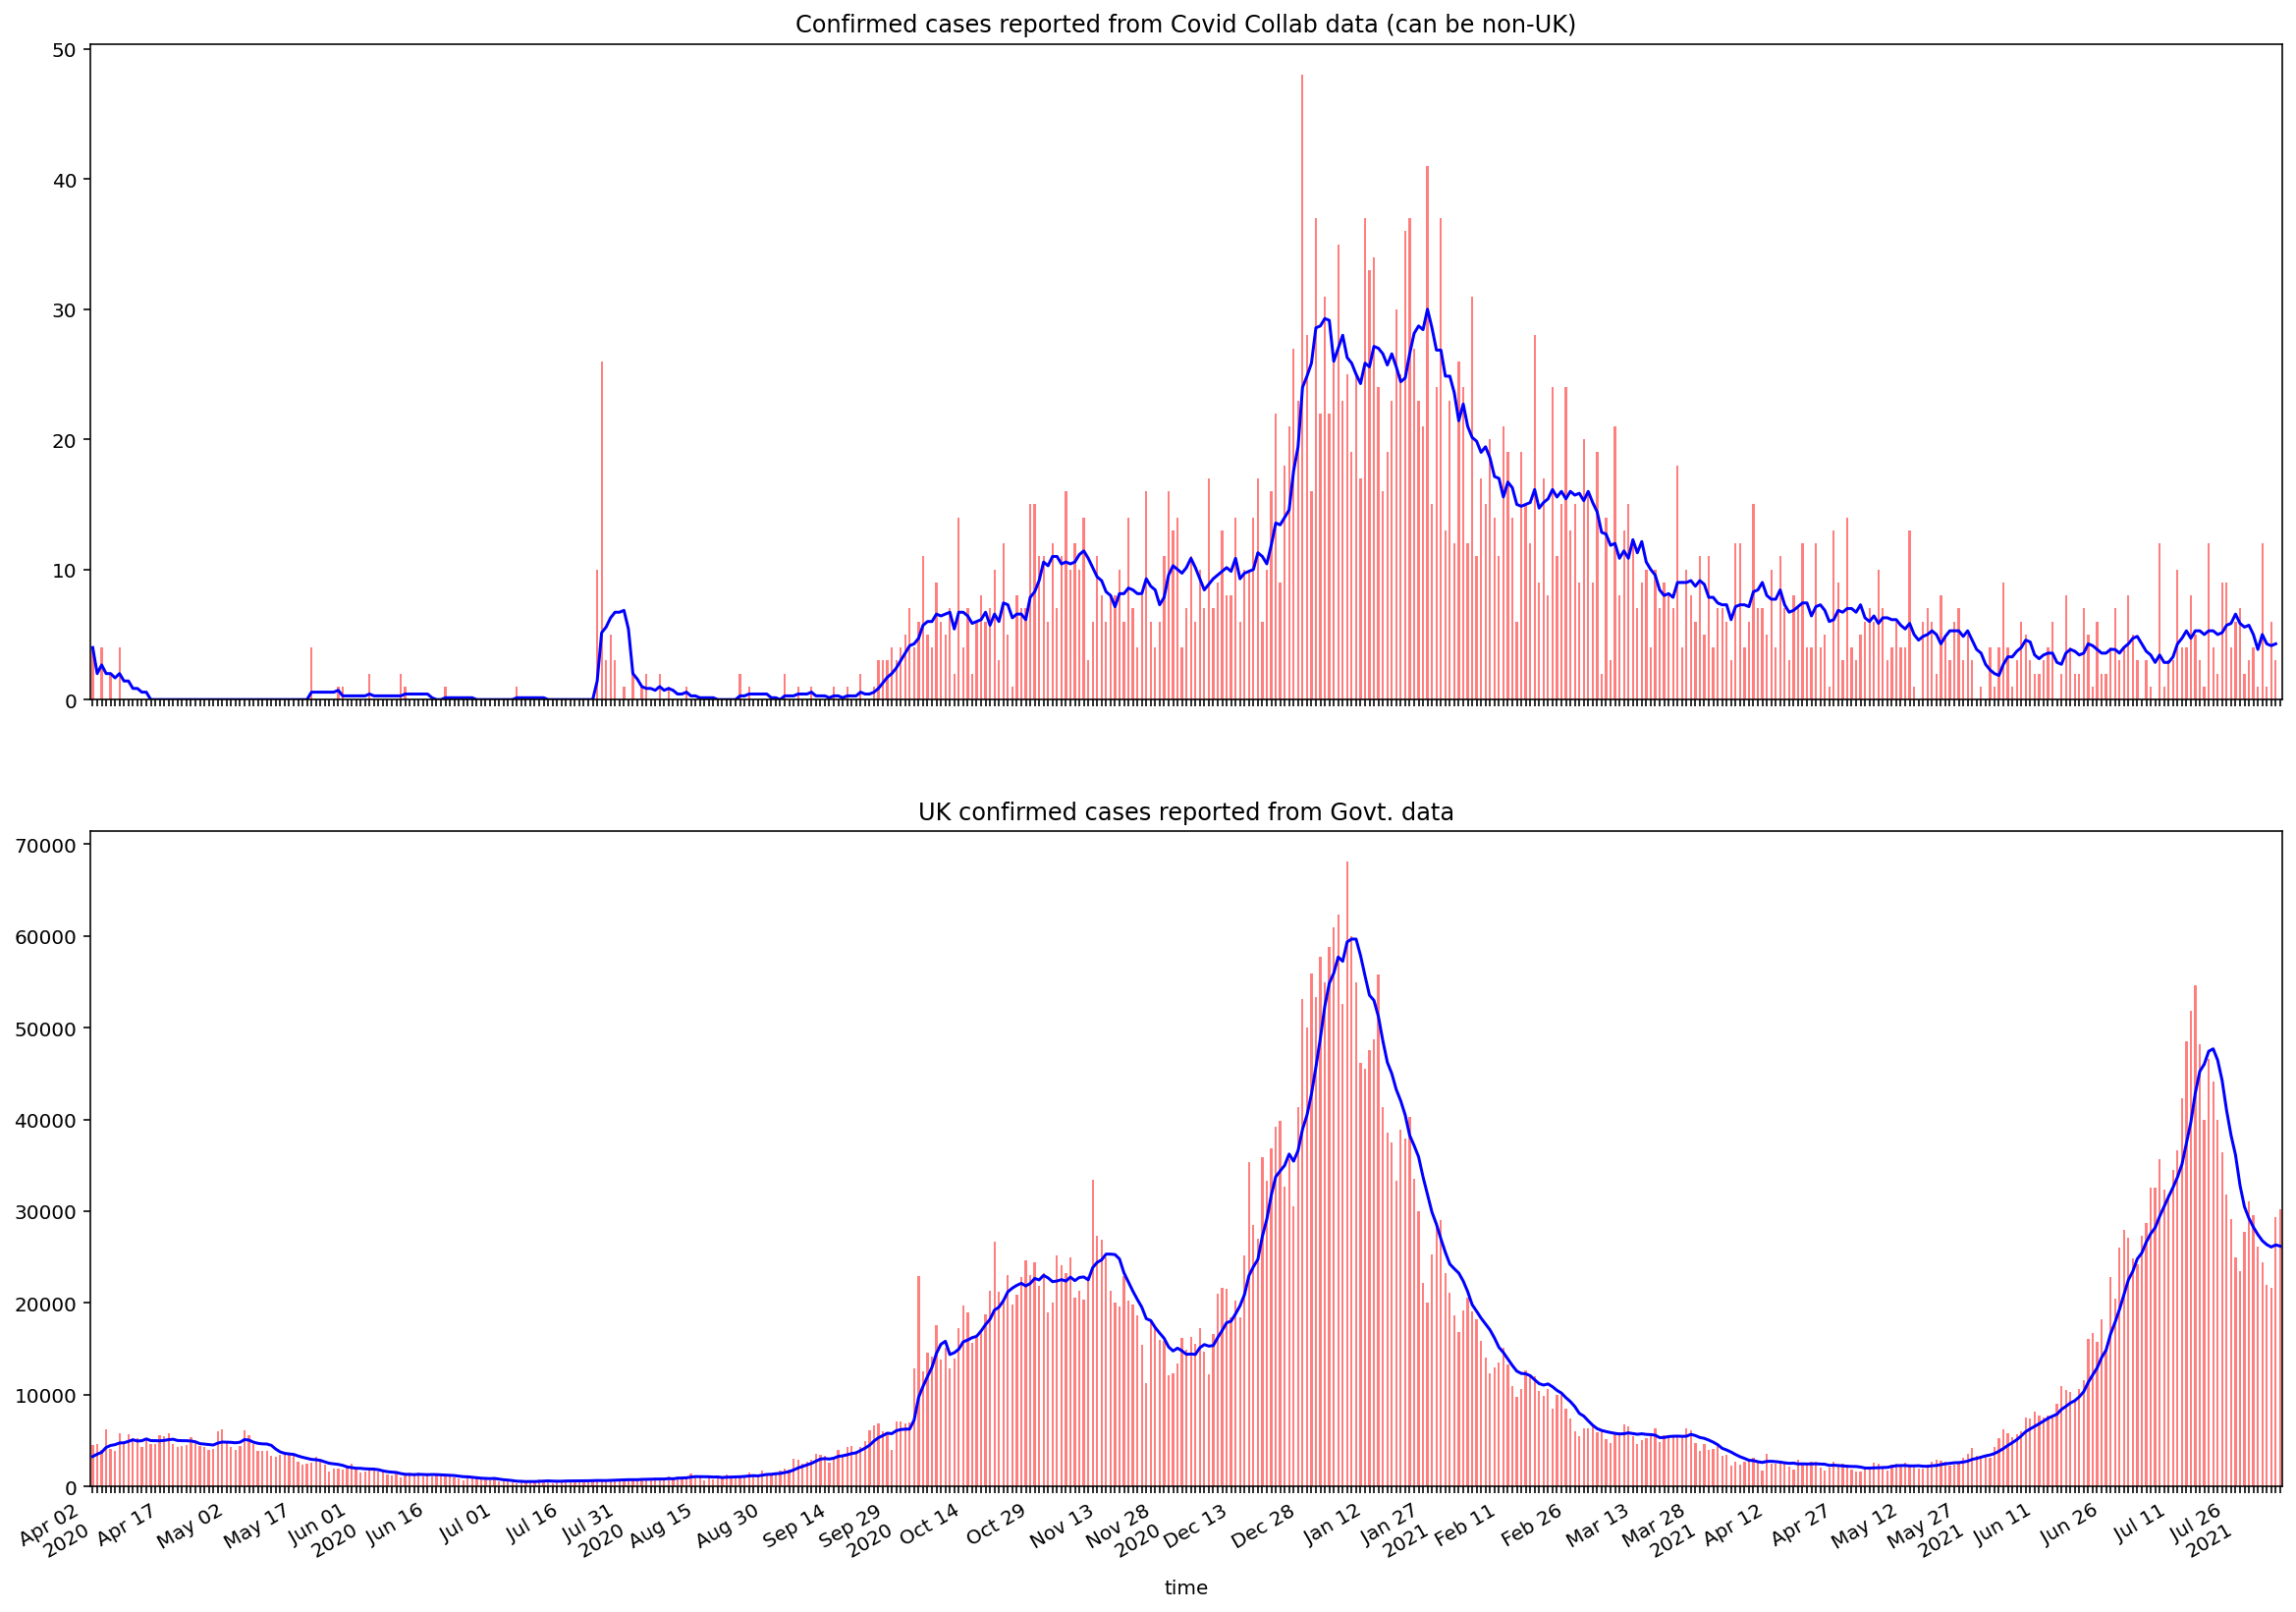

In [147]:
axes = combined_df[['time', '7d_rolling_avg', '7d_rolling_avg_govt']].plot(subplots=True, x='time', kind='line',figsize=(20,15), color='b')
combined_df[['time', 'name', 'newCasesByPublishDate']].plot(subplots=True, x='time', kind='bar', ax=axes, mark_right=False, color="r", alpha=0.5)
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(combined_df.index)
# Every 4th ticklable shows the month and day
ticklabels[::15] = [item.strftime('%b %d') for item in combined_df.index[::15]]
# Every 12th ticklabel includes the year
ticklabels[::60] = [item.strftime('%b %d\n%Y') for item in combined_df.index[::60]]

for ax in axes:
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
    plt.gcf().autofmt_xdate()
    ax.get_legend().remove()
    ax.tick_params(axis="x", labelrotation= 90)

#plt.tight_layout()
plt.gcf().autofmt_xdate()
axes[0].set_title("Confirmed cases reported from Covid Collab data (can be non-UK)")
axes[1].set_title("UK confirmed cases reported from Govt. data")
plt.show()

In [148]:
combined_df[['7d_rolling_avg_govt', '7d_rolling_avg']].corr(method='spearman')

,7d_rolling_avg_govt,7d_rolling_avg
7d_rolling_avg_govt,1.000000,0.670248
7d_rolling_avg,0.670248,1.000000


In [120]:
combined_df[['name', 'newCasesByPublishDate']].corr(method='spearman')

,name,newCasesByPublishDate
name,1.000000,0.648834
newCasesByPublishDate,0.648834,1.000000


In [ ]:
### Plot symptoms score on time

In [121]:
symptoms_fill_monthly = symptoms_fill.groupby(pd.Grouper(freq="1D")).mean()

In [122]:
symptoms_fill.loc['2020-02-11', :]

,Unnamed: 0,pid,version,name,time_scheduled,time_received,time,time_start,id,task_mood_time_start,...,task_lcovid_symptoms_value_balance disorder,task_lcovid_symptoms_value_confusion,task_symptoms_value_Running nose,task_symptoms_value_Runny nose,task_symptoms_value_hayfever,task_symptoms_value_hay fever,secondary_symptom_score,main_symptom_score,lcovid_symptom_score,total_symptom_score
time,,,,,,,,,,,,,,,,,,,,,
2020-02-11 07:53:55.918999+00:00,248012,symptoms,1,CoViD symptoms,0.0,2020-12-11 07:55:25.574000+00:00,2020-02-11 07:53:55.918999+00:00,2020-02-11 07:53:17.910000+00:00,yAHfWqzHSjWOOxC0cEqSyVtMOW72,0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,0.0,16.0


In [123]:
symptoms_fill_monthly.head()

,Unnamed: 0,version,time_scheduled,task_mood_value_arousal,task_mood_value_valence,task_symptoms_value_Difficulties breathing,task_symptoms_value_Fever,task_symptoms_value_Loss of sense of smell (anosmia),task_symptoms_value_Cough,task_lcovid_symptoms_value_Difficulty sleeping (insomnia),...,task_lcovid_symptoms_value_balance disorder,task_lcovid_symptoms_value_confusion,task_symptoms_value_Running nose,task_symptoms_value_Runny nose,task_symptoms_value_hayfever,task_symptoms_value_hay fever,secondary_symptom_score,main_symptom_score,lcovid_symptom_score,total_symptom_score
time,,,,,,,,,,,,,,,,,,,,,
2020-02-11 00:00:00+00:00,248012.0,1.0,0.0,-0.75,0.0,1.0,2.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,0.0,16.0
2020-02-12 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-14 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-15 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
symptoms_fill_monthly['main_sec_score'] = (symptoms_fill_monthly['main_symptom_score'] + symptoms_fill_monthly['secondary_symptom_score']) / 2

<AxesSubplot:xlabel='time'>

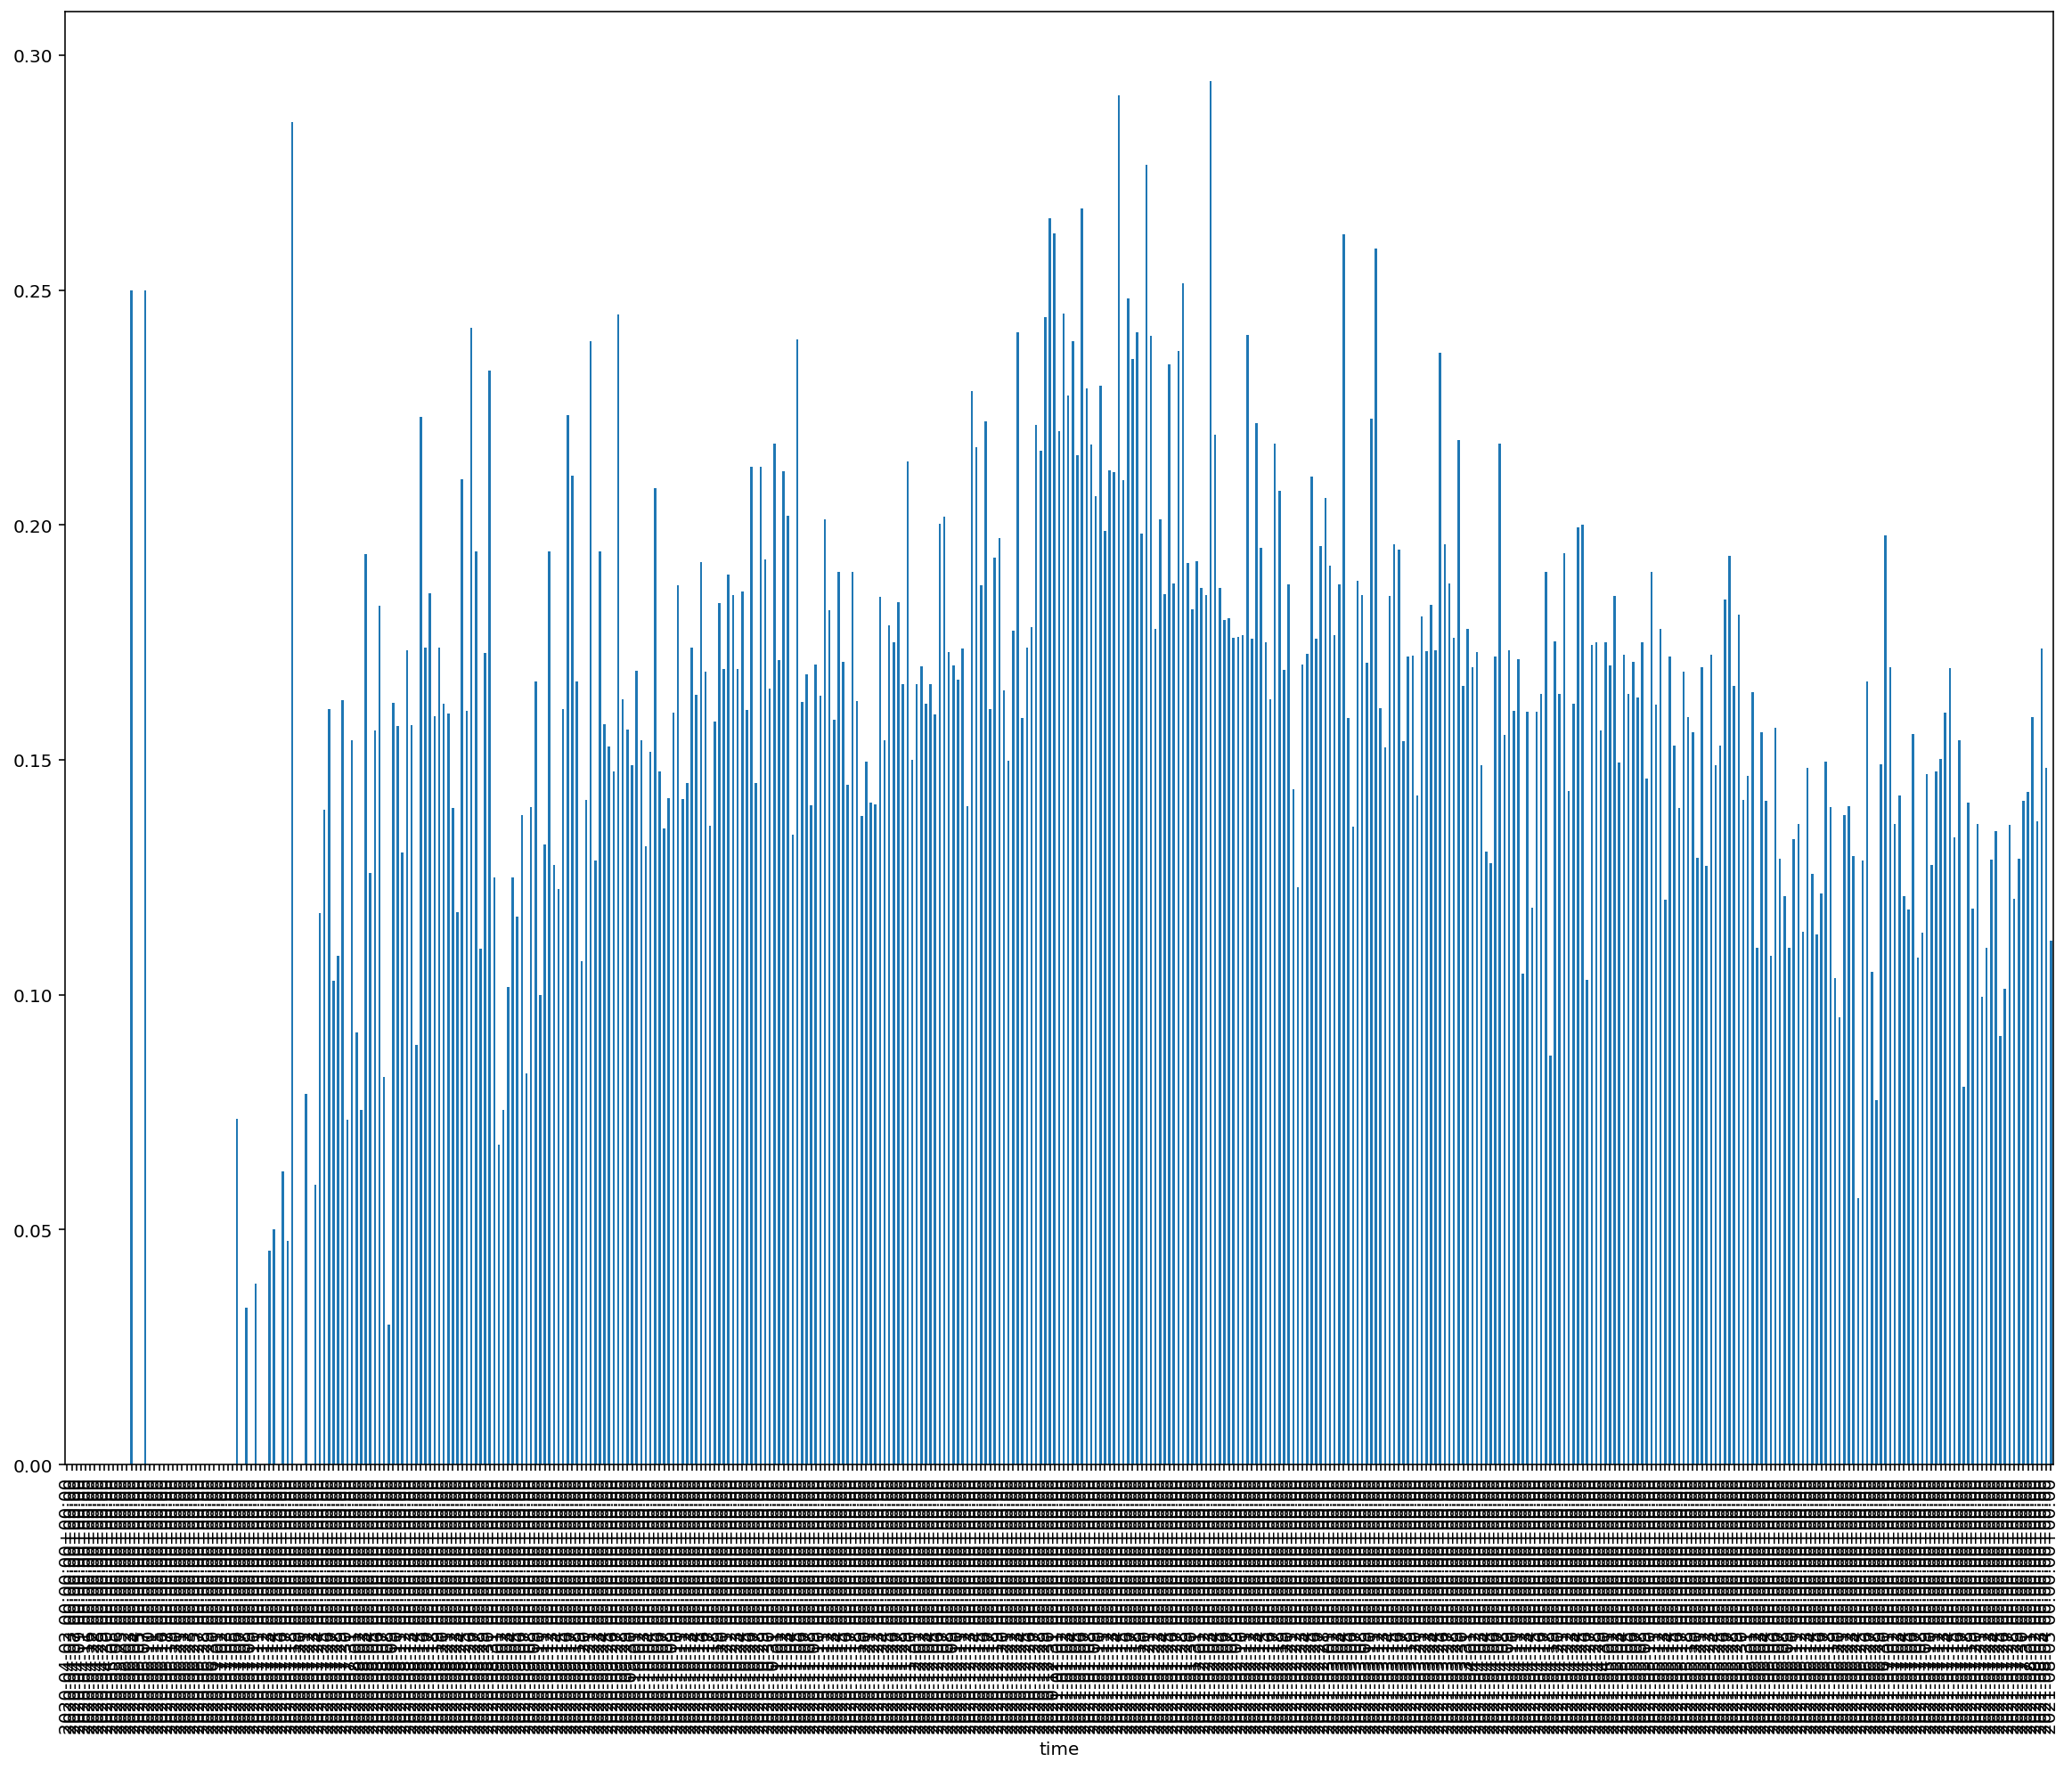

In [134]:
symptoms_fill_monthly[symptoms_fill_monthly['main_sec_score'] < 0.4 ]['main_sec_score'].plot(kind='bar', figsize=(20,15))

In [135]:
symptoms_fill_monthly['7d_rolling_avg'] = symptoms_fill_monthly['main_sec_score'].rolling('7D').mean()

In [136]:
symptoms_fill_monthly = symptoms_fill_monthly.loc['2020-04-02':,:]

In [140]:
symptoms_fill_monthly['time'] = symptoms_fill_monthly.index.strftime('%d-%m-%Y')

In [141]:
symptoms_fill_monthly_no_tz = symptoms_fill_monthly.copy()
symptoms_fill_monthly_no_tz.index = symptoms_fill_monthly_no_tz.index.tz_convert(None)

In [151]:
combined_df_symptoms = pd.concat([symptoms_fill_monthly_no_tz, govt_data_df[['7d_rolling_avg_govt', 'newCasesByPublishDate']]], axis=1)

In [152]:
combined_df_symptoms.head()

,Unnamed: 0,version,time_scheduled,task_mood_value_arousal,task_mood_value_valence,task_symptoms_value_Difficulties breathing,task_symptoms_value_Fever,task_symptoms_value_Loss of sense of smell (anosmia),task_symptoms_value_Cough,task_lcovid_symptoms_value_Difficulty sleeping (insomnia),...,task_symptoms_value_hay fever,secondary_symptom_score,main_symptom_score,lcovid_symptom_score,total_symptom_score,main_sec_score,7d_rolling_avg,time,7d_rolling_avg_govt,newCasesByPublishDate
2020-04-02,115436.078947,1.0,0.0,0.072368,0.157895,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,02-04-2020,3278.857143,4522
2020-04-03,67888.375000,1.0,0.0,0.031250,0.062500,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,03-04-2020,3533.428571,4672
2020-04-04,174686.916667,1.0,0.0,0.041667,0.208333,0.416667,0.5,0.5,0.666667,0.0,...,0.0,0.0,2.083333,0.0,2.083333,1.041667,0.347222,04-04-2020,3739.714286,4000
2020-04-05,142032.400000,1.0,0.0,0.050000,0.250000,0.800000,0.4,1.0,0.600000,0.0,...,0.0,0.0,2.800000,0.0,2.800000,1.400000,0.610417,05-04-2020,4267.857143,6199
2020-04-06,150572.500000,1.0,0.0,0.250000,0.500000,1.000000,0.5,1.0,0.500000,0.0,...,0.0,0.0,3.000000,0.0,3.000000,1.500000,0.788333,06-04-2020,4479.000000,4143


array([<AxesSubplot:title={'center':'main_sec_score'}, xlabel='time'>,
       <AxesSubplot:title={'center':'newCasesByPublishDate'}, xlabel='time'>],
      dtype=object)

Text(0.5, 1.0, 'Symptom Severity reported from Covid Collab data (can be non-UK)')

Text(0.5, 1.0, 'UK confirmed cases reported from Govt. data')

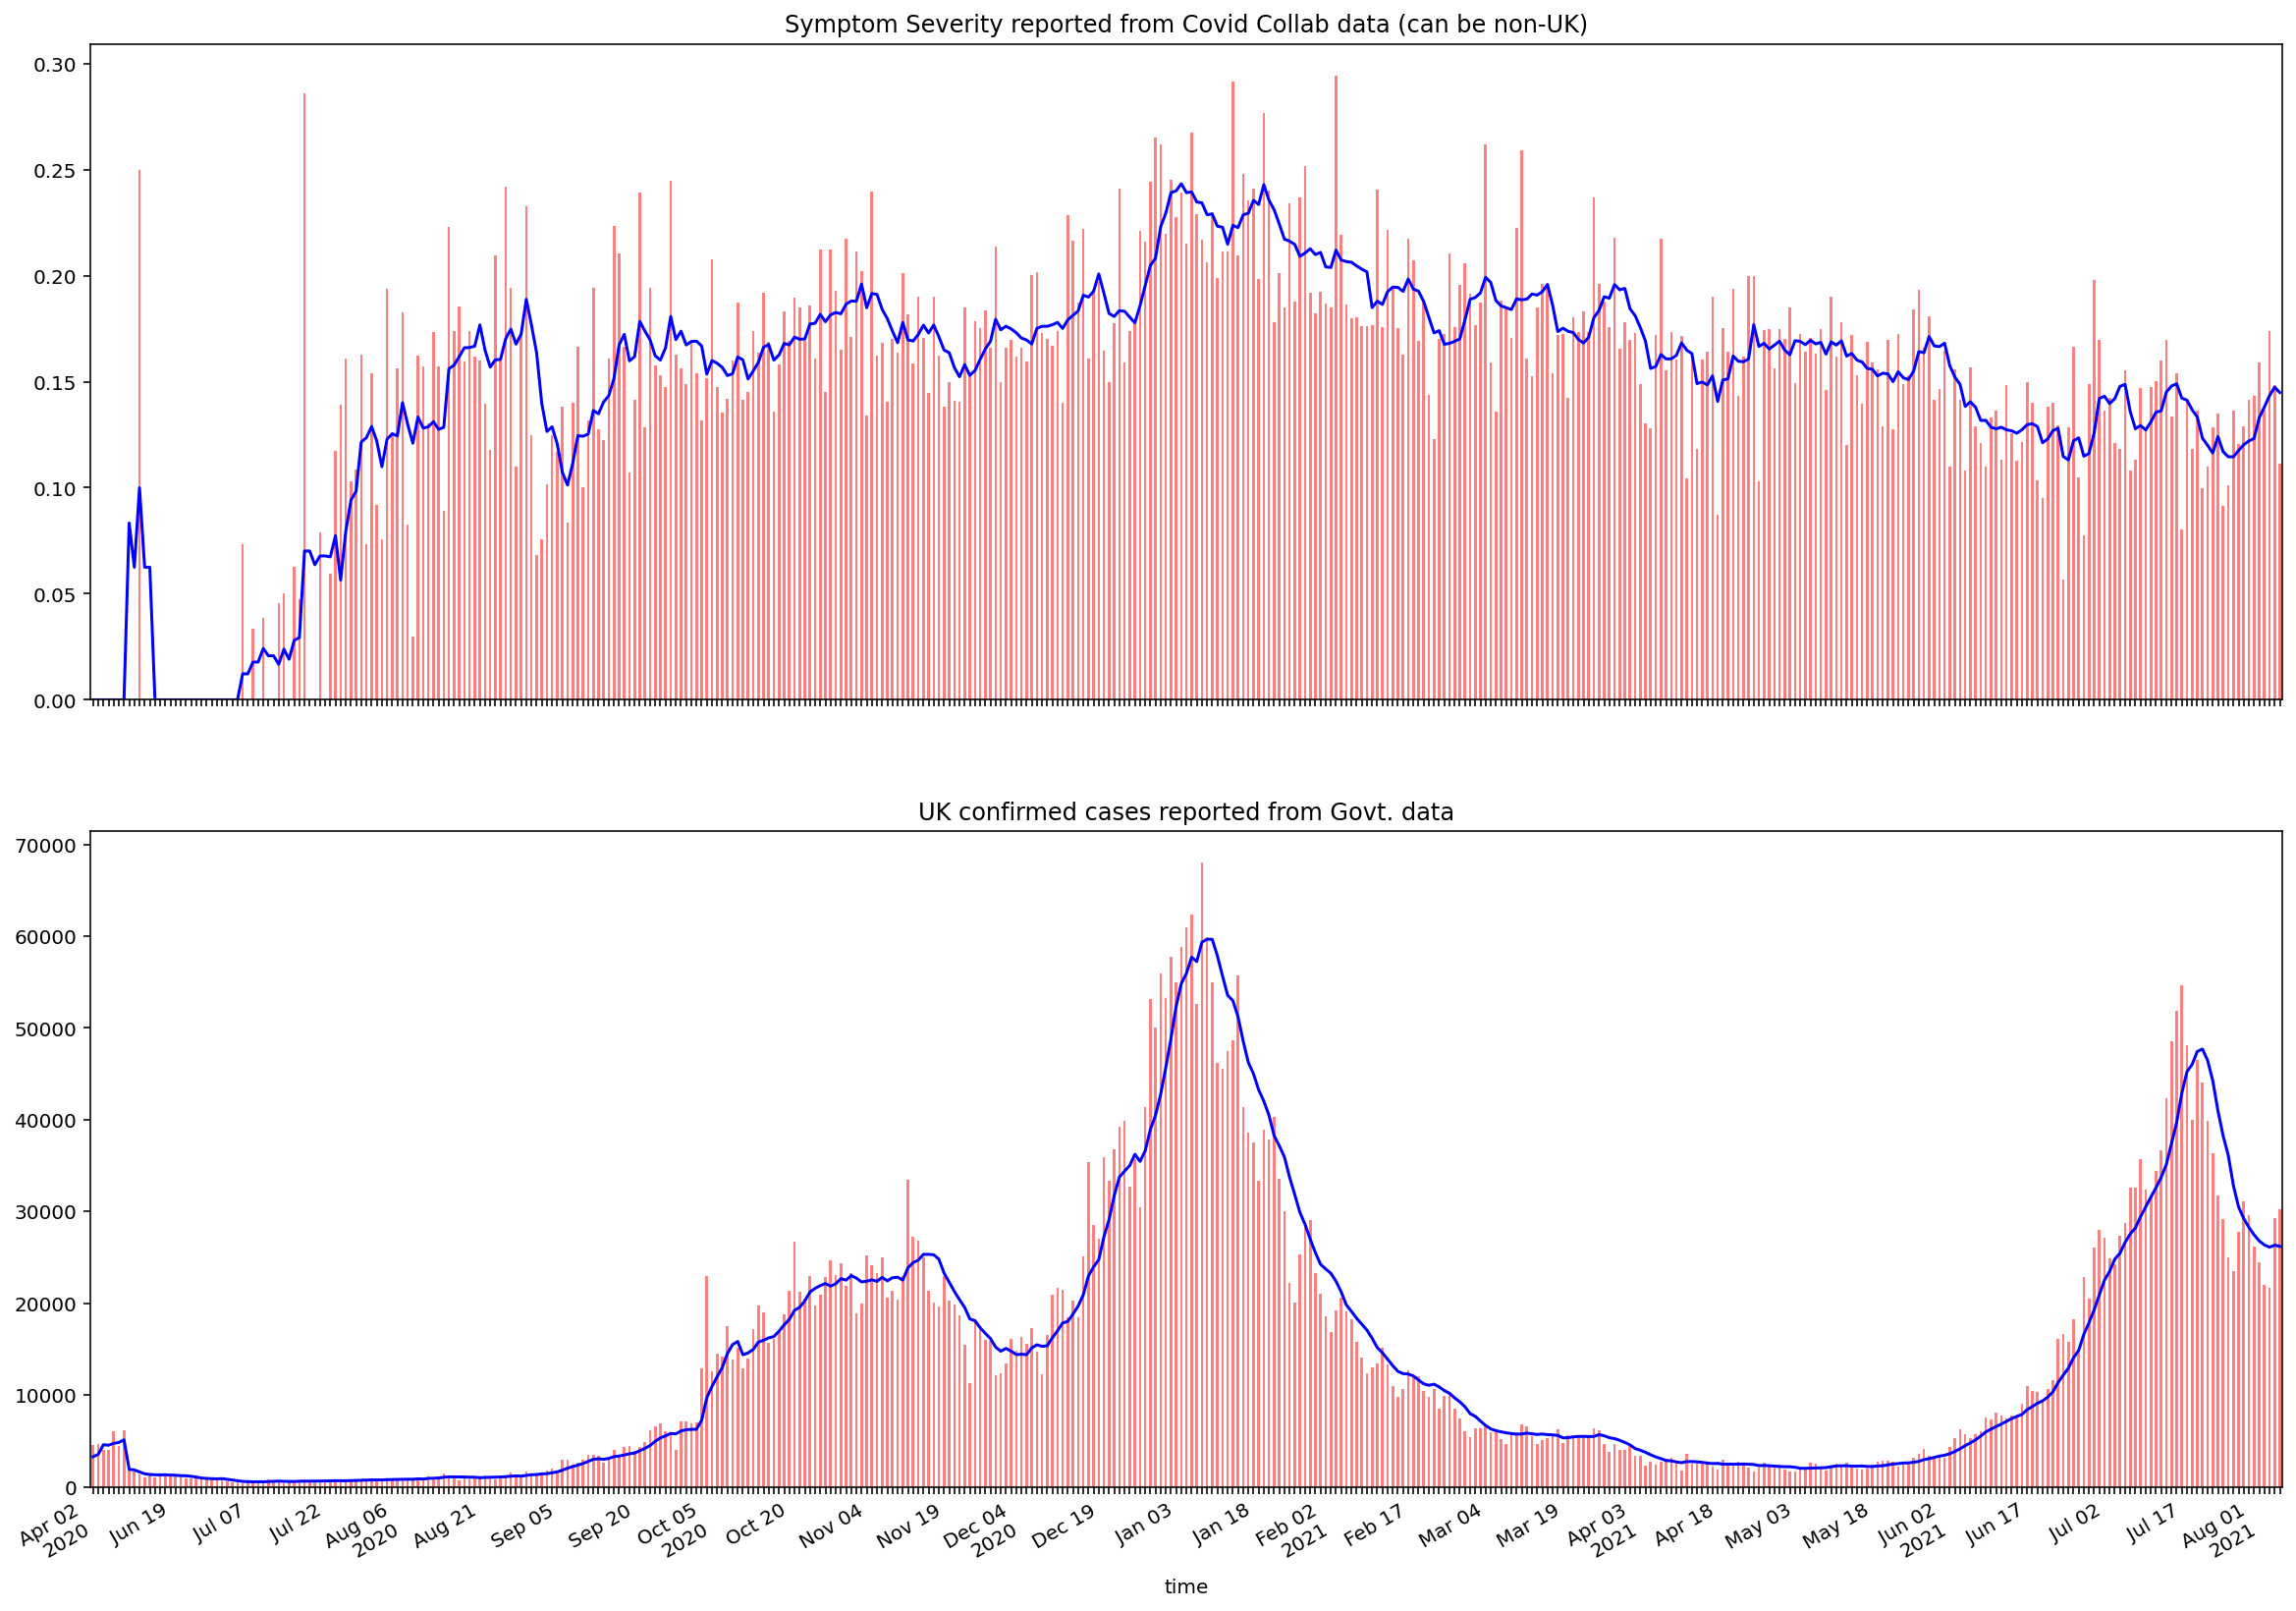

In [160]:
df_filtered = combined_df_symptoms[(combined_df_symptoms['main_sec_score'] < 0.5) & (combined_df_symptoms['7d_rolling_avg'] < 0.5)]

axes = df_filtered[['time', '7d_rolling_avg', '7d_rolling_avg_govt']].plot(subplots=True, x='time', kind='line',figsize=(20,15), color='b')
df_filtered[['time', 'main_sec_score', 'newCasesByPublishDate']].plot(subplots=True, x='time', kind='bar', ax=axes, mark_right=False, color="r", alpha=0.5)
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(df_filtered.index)
# Every 4th ticklable shows the month and day
ticklabels[::15] = [item.strftime('%b %d') for item in df_filtered.index[::15]]
# Every 12th ticklabel includes the year
ticklabels[::60] = [item.strftime('%b %d\n%Y') for item in df_filtered.index[::60]]

for ax in axes:
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
    plt.gcf().autofmt_xdate()
    ax.get_legend().remove()
    ax.tick_params(axis="x", labelrotation= 90)

#plt.tight_layout()
plt.gcf().autofmt_xdate()
axes[0].set_title("Symptom Severity reported from Covid Collab data (can be non-UK)")
axes[1].set_title("UK confirmed cases reported from Govt. data")
plt.show()

In [161]:
df_filtered[['7d_rolling_avg_govt', '7d_rolling_avg']].corr(method='spearman')

,7d_rolling_avg_govt,7d_rolling_avg
7d_rolling_avg_govt,1.00000,0.53385
7d_rolling_avg,0.53385,1.00000


In [167]:
df_filtered.rename({'7d_rolling_avg': '7d_rolling_avg_symptoms'}, axis=1)

,Unnamed: 0,version,time_scheduled,task_mood_value_arousal,task_mood_value_valence,task_symptoms_value_Difficulties breathing,task_symptoms_value_Fever,task_symptoms_value_Loss of sense of smell (anosmia),task_symptoms_value_Cough,task_lcovid_symptoms_value_Difficulty sleeping (insomnia),...,task_symptoms_value_hay fever,secondary_symptom_score,main_symptom_score,lcovid_symptom_score,total_symptom_score,main_sec_score,7d_rolling_avg_symptoms,time,7d_rolling_avg_govt,newCasesByPublishDate
2020-04-02,115436.078947,1.000000,0.0,0.072368,0.157895,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,02-04-2020,3278.857143,4522
2020-04-03,67888.375000,1.000000,0.0,0.031250,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,03-04-2020,3533.428571,4672
2020-04-28,8264.000000,1.000000,0.0,0.500000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28-04-2020,4586.000000,3996
2020-04-29,8261.000000,1.000000,0.0,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29-04-2020,4532.428571,4076
2020-04-30,243472.000000,1.000000,0.0,0.500000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30-04-2020,4739.428571,6032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,124133.013453,2.098655,0.0,0.271300,0.322870,0.071749,0.017937,0.058296,0.071749,0.139013,...,0.0,0.098655,0.219731,0.372197,0.690583,0.159193,0.132918,01-08-2021,26792.571429,24470
2021-08-02,127151.904348,2.026087,0.0,0.347826,0.386957,0.086957,0.004348,0.026087,0.078261,0.156522,...,0.0,0.078261,0.195652,0.352174,0.626087,0.136957,0.138020,02-08-2021,26364.285714,21952
2021-08-03,125141.517084,3.421412,0.0,0.222665,0.271925,0.087699,0.011390,0.064920,0.099089,0.324601,...,0.0,0.084282,0.263098,0.902050,1.249431,0.173690,0.143380,03-08-2021,26104.285714,21691
2021-08-04,129425.576271,2.194915,0.0,0.309322,0.345339,0.072034,0.021186,0.033898,0.067797,0.165254,...,0.0,0.101695,0.194915,0.457627,0.754237,0.148305,0.147365,04-08-2021,26329.714286,29312


In [170]:
pd.concat([df_filtered.rename({'7d_rolling_avg': '7d_rolling_avg_symptoms'}, axis=1)[['7d_rolling_avg_symptoms']], combined_df[['7d_rolling_avg']]], axis=1).corr(method='spearman')

,7d_rolling_avg_symptoms,7d_rolling_avg
7d_rolling_avg_symptoms,1.000000,0.824128
7d_rolling_avg,0.824128,1.000000
